<a id="TOC"></a>
### Table of Contents
- [Imports](#import)
- [Functions](#net_1)
- [Figure 3](#fig3)
- [Figure 4](#fig4)


<a id="import"></a>
# Imports
[Return](#TOC)

In [1]:
# IMPORT STATEMENTS
import cv2
import re
import requests
import io
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable, axes_size
import matplotlib.patches as patches
import matplotlib.colors as colors
import PIL
import math
%matplotlib inline
import pandas as pd
import seaborn as sns
import json
from scipy.stats import fisher_exact, ttest_ind
from collections import Counter
from pprint import pprint
import os
import pickle
import sys
sys.path.append("/booleanfs2/sahoo/Hegemon/")
sys.path = ["/booleanfs2/sahoo/BoNE/"] + sys.path
import StepMiner as smn
import HegemonUtil as hu
acolor = ["#00CC00", "#D8A03D","#EC008C",
          'cyan', "#B741DC", "#808285",
          'blue', 'black', 'green', 'red',
          'orange', 'brown', 'pink', 'purple']

import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

try:
    reload  # Python 2.7
except NameError:
    try:
        from importlib import reload  # Python 3.4+
    except ImportError:
        from imp import reload  # Python 3.0 - 3.3

import bone
reload(bone)

<module 'bone' from '/booleanfs2/sahoo/BoNE/bone.py'>

<a id="net_1"></a>
# Functions
[Return](#TOC)

In [2]:
#import bone
#reload(bone)

confPath='/Users/yovosko/public_html/Hegemon/explore.conf'
confPathGlobal='/booleanfs2/sahoo/Hegemon/explore.conf'

class IMMAnalysis(bone.IBDAnalysis):
    
    

    def __init__(self):
        bone.IBDAnalysis.__init__(self)
    
    def getTimmons2020(self, tn=1,mn=0):
        if mn<3 and mn>-1:
            mn= 'M1-'+str(mn)
        else:
            print('Error: '+str(mn)+' does not exsist')
        self.prepareData(mn,confPath)
        if tn==1:
            atype = self.h.getSurvName("c training status_ch1")
            ahash = {'POST':1, 'PRE':0,'POST_Unloading':1}
            atypes=['Pre','Post']
        if tn==2:
            atype = self.h.getSurvName("c training status_ch1")
            ahash = {'POST':1, 'PRE':0,'POST_Unloading':2}
            atypes=['Pre','Post Resist','Post Unload']
        if tn==3:
            atype = self.h.getSurvName("c training status Age_ch1")
            ahash = {'PRE young':0, 'PRE middle':2,'POST young':1,'POST middle':3}
            atypes=['Pre Young','Post Young','Pre Mid','Post Mid']
        if tn==4:
            atype = self.h.getSurvName("c training status Age_ch1")
            ahash = {'PRE young':0,'POST young':1}
            atypes=['Pre Young','Post Young']
        if tn==5:
            atype = self.h.getSurvName("c training status Age_ch1")
            ahash = {'PRE middle':0,'POST middle':1}
            atypes=['Pre Mid','Post Mid']
            
        atype = [re.sub(".* in ", "", str(k)) for k in atype]
            
        self.initData(atype, atypes, ahash)
        return
    
    def getRundqvist2019(self, tn=1):
        self.prepareData("M2",confPath)
        if tn==1:
            atype = self.h.getSurvName("c time_ch1")
            ahash = {'post-exercise':1, 'pre-exercise':0}
            atypes=['Pre','Post']
        if tn==2:
            atype = self.h.getSurvName("c gender time _ch1")
            ahash = {'male pre-exercise':0,'female pre-exercise':2,'male post-exercise':1,'female post-exercise':3}
            atypes=['Pre Male','Post Male','Pre Female','Post Female']
        if tn==3:
            atype = self.h.getSurvName("c gender time _ch1")
            ahash = {'male pre-exercise':0,'male post-exercise':1}
            atypes=['Pre Male','Post Male']
        if tn==4:
            atype = self.h.getSurvName("c gender time _ch1")
            ahash = {'female pre-exercise':0,'female post-exercise':1}
            atypes=['Pre Female','Post Female']
        atype = [re.sub(".* in ", "", str(k)) for k in atype]
            
        self.initData(atype, atypes, ahash)
        return
    def getKnudsen2020(self, tn=1):
        self.prepareData("M3",confPath)
        if tn==1:
            atype = self.h.getSurvName("c treatment (ch1)")
            ahash = {'Untrained':0, '5 weeks endurance exercise':1}
            atypes=['Pre','Post']
        if tn==2:
            atype = self.h.getSurvName("c genotype treatment (ch1)")
            ahash = {'Wild Pre':0, 'Il13 Pre':2,'Wild Post':1,'Il13 Post':3}
            atypes=['Wild Pre','Wild Post','Il13 Pre','Il13 Post']
        if tn==3:
            atype = self.h.getSurvName("c genotype treatment (ch1)")
            ahash = {'Wild Pre':0,'Wild Post':1}
            atypes=['Wild Pre','Wild Post']
        if tn==4:
            atype = self.h.getSurvName("c genotype treatment (ch1)")
            ahash = {'Il13 Pre':0,'Il13 Post':1}
            atypes=['Il13 Pre','Il13 Post']
        
        atype = [re.sub(".* in ", "", str(k)) for k in atype]
        self.initData(atype, atypes, ahash)
        return
    def getKnuiman2020(self, tn=1):
        self.prepareData("M4",confPath)
        if tn==1:
            atype = self.h.getSurvName("c time point_ch1")
            ahash = {'baseline':0, 'midterm':1}
            atypes=['Pre','Post']
        atype = [re.sub(".* in ", "", str(k)) for k in atype]
        self.initData(atype, atypes, ahash)
        return
    def getPopov2019(self, tn=1):
        self.prepareData("M5",confPath)
        if tn==1:
            atype = self.h.getSurvName("c training status (ch1)")
            ahash = {'untrained':0, 'trained':1}
            atypes=['Pre','Post']
        if tn==2:
            atype = self.h.getSurvName("c training status exercise leg (ch1)")
            ahash = {'untrained NE':0,'trained NE':1}
            atypes=['Untrain NE','Train NE']
        if tn==3:
            atype = self.h.getSurvName("c training status exercise leg (ch1)")
            ahash = {'untrained Ex':0,'trained Ex':1}
            atypes=['Untrain EX','Train Ex']
        if tn==4:
            atype = self.h.getSurvName("c training status time (ch1)")
            ahash = {'untrained baseline':0, 'untrained 1 ':1,'untrained 4 ':2,
                     'trained baseline':3, 'trained 1 ':4,'trained 4 ':5}
            atypes=['Base Untrain','1H Untrain','4H Untrain','Base Train','1H Train','4H Train']
        if tn==5:
            atype = self.h.getSurvName("c training status time (ch1)")
            ahash = {'trained baseline':0, 'trained 1 ':1,'trained 4 ':2}
            atypes=['Base Train','1H Train','4H Train']
        if tn==6:
            atype = self.h.getSurvName("c training status time (ch1)")
            ahash = {'trained baseline':1, 'untrained baseline':0}
            atypes=['Base Untrain','Base Train']
        if tn==7:
            atype = self.h.getSurvName("c training status time (ch1)")
            ahash = {'trained 1 ':1, 'untrained 1 ':0}
            atypes=['1H Untrain','1H Train']
        if tn==8:
            atype = self.h.getSurvName("c training status time (ch1)")
            ahash = {'trained 4 ':1, 'untrained 4 ':0}
            atypes=['4H UnTrain','4H Train']
        if tn==9:
            atype = self.h.getSurvName("c training status time (ch1)")
            ahash = {'untrained baseline':0, 'untrained 1 ':1,'untrained 4 ':2}
            atypes=['Base Untrain','1H Untrain','4H Untrain']
        
        if tn==10:
            atype = self.h.getSurvName("c exercised/non-exercised muscle (ch1)")
            ahash = {'non-exercised (NE)':0, 'exercised (Ex)':1}
            atypes=['NE Leg','Ex Leg']
        if tn==11:
            atype = self.h.getSurvName("c training status exercise leg (ch1)")
            ahash = {'untrained Ex':0,'untrained NE':1}
            atypes=['Untrain EX','Untrain NE']
        if tn==12:
            atype = self.h.getSurvName("c training status exercise leg (ch1)")
            ahash = {'trained Ex':0,'trained NE':1}
            atypes=['Train EX','Train NE']
        if tn==13:
            atype = self.h.getSurvName("c training status exercise leg (ch1)")
            ahash = {'untrained NE':0, 'untrained Ex':2,'trained NE':1,'trained Ex':3}
            atypes=['Untrain NE','Train NE','Untrain EX','Train Ex']
        if tn==14:
            atype = self.h.getSurvName("c training status time (ch1)")
            ahash = {'trained baseline':0, 'trained 1 ':1}
            atypes=['Base Train','1H Train']
        
        atype = [re.sub(".* in ", "", str(k)) for k in atype]
        self.initData(atype, atypes, ahash)
        return
    def getMarosi2018(self, tn=1):
        self.prepareData("M6",confPath)
        if tn==1:
            atype = self.h.getSurvName("c treatment 2 (ch1)")
            ahash = {'Control':0, 'Exercised':1}
            atypes=['Pre','Post']
        if tn==2:
            atype = self.h.getSurvName("c treatment (ch1)")
            ahash = {'Control':0, 'Alternate day fasting':1,'Exercised':2,'Exercised_Alternate day fasting':3}
            atypes=['Pre','Pre & Fast','Post','Post & Fast']
        if tn==3:
            atype = self.h.getSurvName("c treatment (ch1)")
            ahash = {'Control':0,'Exercised':1}
            atypes=['Pre No Fast','Post No Fast']
        if tn==4:
            atype = self.h.getSurvName("c treatment (ch1)")
            ahash = {'Alternate day fasting':0,'Exercised_Alternate day fasting':1}
            atypes=['Pre & Fast','Post & Fast']
        atype = [re.sub(".* in ", "", str(k)) for k in atype]
        self.initData(atype, atypes, ahash)
        return
    def getClarke2018(self, tn=1):
        self.prepareData("M7",confPath)
        if tn==1:
            atype = self.h.getSurvName("c status_ch1")
            ahash = {'pre-training':0, 'post-training':1}
            atypes=['Pre','Post']
        atype = [re.sub(".* in ", "", str(k)) for k in atype]
        self.initData(atype, atypes, ahash)
        return
    def getPopov2018(self, tn=1):
        self.prepareData("M9",confPath)
        if tn==1:
            atype = self.h.getSurvName("c treatment_ch1")
            ahash = {'Pre':0, 'Post':1}
            atypes=['Pre','Post']
        if tn==2:
            atype = self.h.getSurvName("c time point_ch1")
            ahash = {'before':0, '4 hours after exercise':1,'8 hours after exercise':2}
            atypes=['Pre','4H Post','8H Post']
        atype = [re.sub(".* in ", "", str(k)) for k in atype]
        self.initData(atype, atypes, ahash)
        return
    def getPoelkens2013(self, tn=1):
        self.prepareData("M10",confPath)
        if tn==1:
            atype = self.h.getSurvName("c time (ch1)")
            ahash = {'baseline':0, '6 months':1}
            atypes=['Pre','Post']
        if tn==2:
            atype = self.h.getSurvName('c treatment (ch2)')
            ahash = {'Post Healthy':1,'Post Metabolic Syndrome':3,'Pre Healthy':0,'Pre Metabolic Syndrome':2}
            atypes=['Pre Healthy','Post Healthy','Pre Metabolic','Post Metabolic']
        if tn==3:
            atype = self.h.getSurvName('c treatment (ch2)')
            ahash = {'Post Healthy':1,'Pre Healthy':0}
            atypes=['Pre Healthy','Post Healthy']
        if tn==4:
            atype = self.h.getSurvName('c treatment (ch2)')
            ahash = {'Post Metabolic Syndrome':1,'Pre Metabolic Syndrome':0}
            atypes=['Pre Metabolic','Post Metabolic']
        atype = [re.sub(".* in ", "", str(k)) for k in atype]
        self.initData(atype, atypes, ahash)
        return
    def getSchjerling2014(self, tn=1,simpleNames=False):
        self.prepareData("M11",confPath)
        if tn==1:
            atype = self.h.getSurvName("c exercise state_ch2")
            ahash = {'before':0, '2.5 strength':1,'2.5 endurance':1,'5 strength':1,'5 endurance':1,'2.5 hours control':0,
                     '5 hours control':0}
            atypes=['Untrain','Train']
        if tn==2:
            atype = self.h.getSurvName("c training type_ch1")
            ahash = {'Control':0, 'Endurance':1,'Strength':2}
            atypes=['Untrain','Endurance','Strength']
        if tn==3:
            atype = self.h.getSurvName("c training type_ch1")
            ahash = {'Control':0, 'Endurance':1}
            atypes=['Untrain','Endurance']
        if tn==4:
            atype = self.h.getSurvName("c training type_ch1")
            ahash = {'Control':0,'Strength':1}
            atypes=['Untrain','Strength']
        if tn==5:
            atype = self.h.getSurvName("c training type_ch1")
            ahash = {'Endurance':0,'Strength':1}
            atypes=['Endurance','Strength']
        if tn==6:
            atype = self.h.getSurvName("c timepoint_ch1")
            ahash = {'pre':0, '2.5 post':1,'5 post':2}
            atypes=['Pre','2.5H Post','5H Post']
        if tn==7:
            atype = self.h.getSurvName("c exercise state_ch2")
            ahash = {'before':0, '2.5 strength':1,'2.5 endurance':2,'5 strength':3,'5 endurance':4,'2.5 hours control':5,
                     '5 hours control':6}
            atypes=['Pre','2.5H Strength','2.5H endurance','2.5H Control','5H Strength','5H Enduracne','5H Control']
        if simpleNames:
            if len(atypes)==2:
                atypes=['Untrain','Train']
        atype = [re.sub(".* in ", "", str(k)) for k in atype]
        self.initData(atype, atypes, ahash)
        return
    def getKalko2014(self, tn=1):
        self.prepareData("M12",confPath)
        if tn==1:
            atype = self.h.getSurvName("c exercise state_ch1")
            ahash = {'sedentary':0,'trained':1}
            atypes=['Untrain','Train']
        if tn==2:
            atype = self.h.getSurvName("c source_name_ch1")
            ahash = {'Sedentary healthy':0,'Trained healthy':1,'Sedentary COPD with normal BMI':2,
                     'Trained COPD with normal BMI':3}
            atypes=['Untrain Healthy','Train Healthy','Untrain COPD',"Train COPD"]
        if tn==3:
            atype = self.h.getSurvName("c source_name_ch1")
            ahash = {'Sedentary healthy':0,'Trained healthy':1}
            atypes=['Untrain Healthy','Train Healthy']
        if tn==4:
            atype = self.h.getSurvName("c source_name_ch1")
            ahash = {'Sedentary COPD with normal BMI':0,'Trained COPD with normal BMI':1}
            atypes=['Untrain COPD',"Train COPD"]
        atype = [re.sub(".* in ", "", str(k)) for k in atype]
        self.initData(atype, atypes, ahash)
        return
    def getCatoire2014(self, tn=1):
        self.prepareData("M13",confPath)
        if tn==1:
            atype = self.h.getSurvName("c timepoint (ch1)")
            ahash = {'Pre':0,'Post':1}
            atypes=['Untrain','Train']
        atype = [re.sub(".* in ", "", str(k)) for k in atype]
        self.initData(atype, atypes, ahash)
        return
    def getTuran2011(self, tn=1):
        self.prepareData("M14",confPath)
        if tn==1:
            atype = self.h.getSurvName("c exercise state_ch1")
            ahash = {'sedentary':0,'trained':1}
            atypes=['Pre','Post']
        if tn==2:
            atype = self.h.getSurvName("c source_name_ch1")
            ahash = {'Sedentary COPD with low BMI':2,'Sedentary COPD with normal BMI':4,'Sedentary healthy':0,
                     'Trained COPD with low BMI':3,'Trained COPD with normal BMI':5,'Trained healthy':1}
            atypes=['Untrain Healthy','Train Healthy','Untrain COPD Low BMI',"Train COPD Low BMI",'Untrain COPD',"Train COPD"]
        if tn==3:
            atype = self.h.getSurvName("c source_name_ch1")
            ahash = {'Sedentary healthy':0,'Trained healthy':1}
            atypes=['Untrain Healthy','Train Healthy']
        if tn==4:
            atype = self.h.getSurvName("c source_name_ch1")
            ahash = {'Sedentary COPD with low BMI':0,'Trained COPD with low BMI':1}
            atypes=['Untrain COPD Low BMI',"Train COPD Low BMI"]
        if tn==5:
            atype = self.h.getSurvName("c source_name_ch1")
            ahash = {'Sedentary COPD with normal BMI':0,'Trained COPD with normal BMI':1}
            atypes=['Untrain COPD',"Train COPD"]
        atype = [re.sub(".* in ", "", str(k)) for k in atype]
        self.initData(atype, atypes, ahash)
        return
    def getNeubauer2013(self, tn=1):
        self.prepareData("M15",confPath)
        if tn==1:
            atype = self.h.getSurvName("c time point_ch1")
            ahash = {'baseline':0,'3':1,'48':1,'96':1}
            atypes=['Pre','Post']
        if tn==2:
            atype = self.h.getSurvName("c time point_ch1")
            ahash = {'baseline':0,'3':1,'48':2,'96':3}
            atypes=['Pre','3H','48H','96H']
        if tn==3:
            atype = self.h.getSurvName("c tissue time point_ch1")
            ahash = {'blood PMN 3':1,'blood PMN 48':2,'blood PMN 96':3,'blood PMN baseline':0,
                     'skeletal muscle (SMU) 3':5,'skeletal muscle (SMU) 48':6,'skeletal muscle (SMU) 96':7,
                     'skeletal muscle (SMU) baseline':4}
            atypes=['Pre Blood','3H Blood','48H Blood','96H Blood','Pre Muscle','3H Muscle','48H Muscle','96H Muscle']
        if tn==4:
            atype = self.h.getSurvName("c tissue time point_ch1")
            ahash = {'blood PMN 3':1,'blood PMN 48':2,'blood PMN 96':3,'blood PMN baseline':0}
            atypes=['Pre Blood','3H Blood','48H Blood','96H Blood']
        if tn==5:
            atype = self.h.getSurvName("c tissue time point_ch1")
            ahash = {'blood PMN 3':1,'blood PMN baseline':0}
            atypes=['Pre Blood','3H Blood']
        if tn==6:
            atype = self.h.getSurvName("c tissue time point_ch1")
            ahash = {'skeletal muscle (SMU) 3':1,'skeletal muscle (SMU) 48':2,'skeletal muscle (SMU) 96':3,
                     'skeletal muscle (SMU) baseline':0}
            atypes=['Pre Muscle','3H Muscle','48H Muscle','96H Muscle']
        if tn==7:
            atype = self.h.getSurvName("c tissue time point_ch1")
            ahash = {'skeletal muscle (SMU) 3':1,'skeletal muscle (SMU) baseline':0}
            atypes=['Pre Muscle','3H Muscle']
        if tn==8:
            atype = self.h.getSurvName("c time point_ch1")
            ahash = {'baseline':0,'3':1}
            atypes=['Pre','Post']
        
        atype = [re.sub(".* in ", "", str(k)) for k in atype]
        self.initData(atype, atypes, ahash)
        return
    def getEngeli2012(self, tn=1):
        self.prepareData("M16",confPath)
        if tn==1:
            atype = self.h.getSurvName("c treatment_ch1")
            ahash = {'control':0,'8-week training':1}
            atypes=['Untrain','Train']
        atype = [re.sub(".* in ", "", str(k)) for k in atype]
        self.initData(atype, atypes, ahash)
        return
    def getCatoire2012(self,tn=1):
        self.prepareData("M17",confPath)
        if tn==1:
            atype = self.h.getSurvName("c time_ch1")
            ahash = {'baseline (T0)':0, 'post_exercise (T1)':1}
            atypes=['Pre','Post']
        if tn==2: 
            atype = self.h.getSurvName("c exercised leg_ch2")
            ahash = {'Ex':1, 'NE':0}
            atypes=['NE','Ex']
        if tn==3:
            atype = self.h.getSurvName("c exercised leg time_ch1")
            ahash = {'Ex baseline (T0)':2,'Ex post_exercise (T1)':3,'NE baseline (T0)':0,'NE post_exercise (T1)':1}
            atypes=['Pre NE','Post NE','Pre Ex','Post Ex']
        if tn==4:
            atype = self.h.getSurvName("c exercised leg time_ch1")
            ahash = {'Ex baseline (T0)':0,'Ex post_exercise (T1)':1}
            atypes=['Pre Ex','Post Ex']
        if tn==5:
            atype = self.h.getSurvName("c exercised leg time_ch1")
            ahash = {'NE baseline (T0)':0,'NE post_exercise (T1)':1}
            atypes=['Pre NE','Post NE']
        if tn==6:
            atype = self.h.getSurvName("c exercised leg time_ch1")
            ahash = {'Ex baseline (T0)':1,'NE baseline (T0)':0}
            atypes=['Pre NE','Pre Ex']
        if tn==7:
            atype = self.h.getSurvName("c exercised leg time_ch1")
            ahash = {'Ex post_exercise (T1)':1,'NE post_exercise (T1)':0}
            atypes=['Post NE','Post Ex']
        atype = [re.sub(".* in ", "", str(k)) for k in atype]
        self.initData(atype, atypes, ahash)
    def getNarkar2008(self, tn=1):
        self.prepareData("M21-0",confPath)
        if tn==1:
            atype = self.h.getSurvName('c condition_ch1')
            ahash = {'Vehicle':0,'Exercise':1,'GW + Exercise':3,'GW':2}
            atypes=['Untrain','Train','GW','GW & Train']
        if tn==2:
            atype = self.h.getSurvName('c condition_ch1')
            ahash = {'Vehicle':0,'Exercise':1,'GW + Exercise':1,'GW':0}
            atypes=['Untrain & GW','Train & GW']
        if tn==3:
            atype = self.h.getSurvName('c condition_ch1')
            ahash = {'Vehicle':0,'Exercise':1}
            atypes=['Untrain','Train']
        if tn==4:
            atype = self.h.getSurvName('c condition_ch1')
            ahash = {'GW + Exercise':1,'GW':0}
            atypes=['GW','GW & Train']
        atype = [re.sub(".* in ", "", str(k)) for k in atype]
        self.initData(atype, atypes, ahash)
        return
    
    
    def getScheler2013(self, tn=1):
        self.prepareData("M23",confPath)
        if tn==1:
            atype = self.h.getSurvName("c sample group_ch1")
            ahash = {'control':0,'in-vitro electric pulse stimulation (EPS) for 24hr':1}
            atypes=['Ctrl','EPS Stim']
        atype = [re.sub(".* in ", "", str(k)) for k in atype]
        self.initData(atype, atypes, ahash)
        return
    
    def getTimmons2018(self, tn=1):
        self.prepareData("M25",confPath)
        if tn==1:
            atype = self.h.getSurvName("c developmental stage_ch1")
            ahash = {'young adult':0,'middle aged adult':1,'older adult':2}
            atypes=['Young','Mid','Old']
        atype = [re.sub(".* in ", "", str(k)) for k in atype]
        self.initData(atype, atypes, ahash)
        return
        atype = [re.sub(".* in ", "", str(k)) for k in atype]
        self.initData(atype, atypes, ahash)
        return
    def getKhakehi2020(self, tn=1):
        self.prepareData("M27",confPath)
        if tn==1:
            atype = self.h.getSurvName("c group (ch1)")
            ahash = {'control':0,'endurance-trained':1}
            atypes=['Ctrl','Endur Ath']
        atype = [re.sub(".* in ", "", str(k)) for k in atype]
        self.initData(atype, atypes, ahash)
        return
    def getDeSanctis2021(self, tn=1,simpleNames=False):
        self.prepareData("M28",confPath)
        if tn==1:
            atype = self.h.getSurvName("c group (ch1)")
            ahash = {'sedentary':0,'resistance trained':1,'endurance trained':1}
            atypes=['Sedentary','Athlete']
            if simpleNames:
                atypes=['Untrain','Train']
        if tn==2:
            atype = self.h.getSurvName("c group (ch1)")
            ahash = {'sedentary':0,'resistance trained':1,'endurance trained':2}
            atypes=['Sedentary','Resistance','Endurance']
        atype = [re.sub(".* in ", "", str(k)) for k in atype]
        self.initData(atype, atypes, ahash)
        return
    def getKivela2010(self, tn=1):
        self.prepareData("M29",confPath)
        if tn==1:
            atype = self.h.getSurvName("c strain (ch1)")
            ahash = {'low intrinsic aerobic capacity runners':0,'high intrinsic aerobic capacity runners':1}
            atypes=['Non-Ath Rat','Ath Rat']
        atype = [re.sub(".* in ", "", str(k)) for k in atype]
        self.initData(atype, atypes, ahash)
        return
    def getMahoney2005(self, tn=1):
        self.prepareData("M31",confPath)
        if tn==1:
            atype = self.h.getSurvName('c condition time point_ch1')
            ahash = {'Endurance 3H':1, 'Endurance 48H':0, 'Resistance 3H':3, 'Resistance 48H':2}
            atypes=['Endur 48H','Endur 3H','Resist 48H','Resist 3H']
        if tn==2:
            atype = self.h.getSurvName('c condition time point_ch1')
            ahash = {'Endurance 3H':1, 'Endurance 48H':0}
            atypes=['Endur 48H','Endur 3H']
        if tn==3:
            atype = self.h.getSurvName('c condition time point_ch1')
            ahash = {'Resistance 3H':1, 'Resistance 48H':0}
            atypes=['Resist 48H','Resist 3H']
        if tn==4:
            atype = self.h.getSurvName('c condition time point_ch1')
            ahash = {'Endurance 3H':1, 'Endurance 48H':0, 'Resistance 3H':1, 'Resistance 48H':0}
            atypes=['48H','3H']
        atype = [re.sub(".* in ", "", str(k)) for k in atype]
        self.initData(atype, atypes, ahash)
        return
    def getStepto2009(self, tn=1):
        self.prepareData("M32",confPath)
        if tn==1:
            atype = self.h.getSurvName("c group (ch1)")
            ahash = {'Control':0,'Endurance Trained':1,'Strength trained':2,'Endurance trained':1}
            atypes=['Ctrl','Endur Athl','Resist Athl']
        if tn==2:
            atype = self.h.getSurvName("c group (ch1)")
            ahash = {'Control':0,'Endurance Trained':1,'Endurance trained':1}
            atypes=['Ctrl','Endur Athl']
        if tn==3:
            atype = self.h.getSurvName("c group (ch1)")
            ahash = {'Control':0,'Strength trained':1}
            atypes=['Ctrl','Resist Athl']
        atype = [re.sub(".* in ", "", str(k)) for k in atype]
        self.initData(atype, atypes, ahash)
        return
    def getVega2020(self, tn=1):
        self.prepareData("M33",confPath)
        if tn==1:
            atype = self.h.getSurvName("c group time_ch1")
            ahash = {'PRE ATHLETE':2, 'PRE LEAN':1, 'PRE obese':0}
            atypes=['Obese','Lean','Athlete']
        if tn==2:
            atype = self.h.getSurvName("c group time_ch1")
            ahash = {'PRE ATHLETE':1, 'PRE LEAN':0}
            atypes=['Lean','Athlete']
        if tn==3:
            atype = self.h.getSurvName("c group time_ch1")
            ahash = {'PRE ATHLETE':1, 'PRE obese':0}
            atypes=['Obese','Athlete']
        if tn==4:
            atype = self.h.getSurvName("c group time_ch1")
            ahash = {'POST LEAN':1,'PRE LEAN':0}
            atypes=['Pre','Post']
        if tn==5:
            atype = self.h.getSurvName("c group time_ch1")
            ahash = {'POST LEAN':2, 'PRE ATHLETE':3, 'PRE LEAN':1, 'PRE obese':0}
            atypes=['Pre Obese','Pre Lean','Post Lean','Pre Athlete']
        atype = [re.sub(".* in ", "", str(k)) for k in atype]
        self.initData(atype, atypes, ahash)
        return
    def getYang2022(self, tn=1):
        self.prepareData("M34-0",confPath)
        if tn==1:
            atype = self.h.getSurvName("c treatment_ch1")
            ahash = {'6-week chow-diet and 3-week sedentary interventions':0,
                     '6-week chow-diet and 3-week training interventions':1,
                     '6-week high-fat-diet and 3-week sedentary interventions':2,
                     '6-week high-fat-diet and 3-week training interventions':3}
            atypes=['Chow Sed','Chow Train','Fat Sed','Fat Train']
        if tn==2:
            atype = self.h.getSurvName("c treatment_ch1")
            ahash = {'6-week chow-diet and 3-week sedentary interventions':0,
                     '6-week chow-diet and 3-week training interventions':1,
                     '6-week high-fat-diet and 3-week sedentary interventions':0,
                     '6-week high-fat-diet and 3-week training interventions':1}
            atypes=['Sedentary','Train']
        if tn==3:
            atype = self.h.getSurvName("c treatment_ch1")
            ahash = {'6-week chow-diet and 3-week sedentary interventions':0,
                     '6-week chow-diet and 3-week training interventions':1}
            atypes=['Chow Sed','Chow Train']
        if tn==4:
            atype = self.h.getSurvName("c treatment_ch1")
            ahash = {'6-week high-fat-diet and 3-week sedentary interventions':0,
                     '6-week high-fat-diet and 3-week training interventions':1}
            atypes=['Fat Sed','Fat Train']
        if tn==5:
            atype = self.h.getSurvName("c treatment_ch1")
            ahash = {'6-week high-fat-diet and 3-week sedentary interventions':0,
                     '6-week chow-diet and 3-week training interventions':1}
            atypes=['Fat Sed','Chow Train']
        if tn==6:
            atype = self.h.getSurvName("c treatment_ch1")
            ahash = {'6-week chow-diet and 3-week sedentary interventions':0,
                     '6-week high-fat-diet and 3-week training interventions':1}
            atypes=['Chow Sed','Fat Train']
        atype = [re.sub(".* in ", "", str(k)) for k in atype]
        self.initData(atype, atypes, ahash)
        return
    def getYang2022Sc(self, tn=1):
        self.prepareData("M34-1",confPath)
        if tn==1:
            atype = self.h.getSurvName("c treatment_ch1")
            ahash = {'6-week chow-diet and 3-week sedentary interventions':0,
                     '6-week chow-diet and 3-week training interventions':1,
                     '6-week high-fat-diet and 3-week sedentary interventions':2,
                     '6-week high-fat-diet and 3-week training interventions':3}
            atypes=['Chow Sed','Chow Train','Fat Sed','Fat Train']
        if tn==2:
            atype = self.h.getSurvName("c treatment_ch1")
            ahash = {'6-week chow-diet and 3-week sedentary interventions':0,
                     '6-week chow-diet and 3-week training interventions':1,
                     '6-week high-fat-diet and 3-week sedentary interventions':0,
                     '6-week high-fat-diet and 3-week training interventions':1}
            atypes=['Sedentary','Train']
        if tn==3:
            atype = self.h.getSurvName("c treatment_ch1")
            ahash = {'6-week chow-diet and 3-week sedentary interventions':0,
                     '6-week chow-diet and 3-week training interventions':1}
            atypes=['Chow Sed','Chow Train']
        if tn==4:
            atype = self.h.getSurvName("c treatment_ch1")
            ahash = {'6-week high-fat-diet and 3-week sedentary interventions':0,
                     '6-week high-fat-diet and 3-week training interventions':1}
            atypes=['Fat Sed','Fat Train']
        if tn==5:
            atype = self.h.getSurvName("c treatment_ch1")
            ahash = {'6-week high-fat-diet and 3-week sedentary interventions':0,
                     '6-week chow-diet and 3-week training interventions':1}
            atypes=['Fat Sed','Chow Train']
        if tn==6:
            atype = self.h.getSurvName("c treatment_ch1")
            ahash = {'6-week chow-diet and 3-week sedentary interventions':0,
                     '6-week high-fat-diet and 3-week training interventions':1}
            atypes=['Chow Sed','Fat Train']
        atype = [re.sub(".* in ", "", str(k)) for k in atype]
        self.initData(atype, atypes, ahash)
        return
    def getYang2022macSc(self, tn=1):
        self.prepareData("M34-2",confPath)
        if tn==1:
            atype = self.h.getSurvName("c treatment_ch1")
            ahash = {'6-week chow-diet and 3-week sedentary interventions':0,
                     '6-week chow-diet and 3-week training interventions':1,
                     '6-week high-fat-diet and 3-week sedentary interventions':2,
                     '6-week high-fat-diet and 3-week training interventions':3}
            atypes=['Chow Sed','Chow Train','Fat Sed','Fat Train']
        if tn==2:
            atype = self.h.getSurvName("c treatment_ch1")
            ahash = {'6-week chow-diet and 3-week sedentary interventions':0,
                     '6-week chow-diet and 3-week training interventions':1,
                     '6-week high-fat-diet and 3-week sedentary interventions':0,
                     '6-week high-fat-diet and 3-week training interventions':1}
            atypes=['Sedentary','Trained']
        if tn==3:
            atype = self.h.getSurvName("c treatment_ch1")
            ahash = {'6-week chow-diet and 3-week sedentary interventions':0,
                     '6-week chow-diet and 3-week training interventions':1}
            atypes=['Chow Sed','Chow Train']
        if tn==4:
            atype = self.h.getSurvName("c treatment_ch1")
            ahash = {'6-week high-fat-diet and 3-week sedentary interventions':0,
                     '6-week high-fat-diet and 3-week training interventions':1}
            atypes=['Fat Sed','Fat Train']
        if tn==5:
            atype = self.h.getSurvName("c treatment_ch1")
            ahash = {'6-week high-fat-diet and 3-week sedentary interventions':0,
                     '6-week chow-diet and 3-week training interventions':1}
            atypes=['Fat Sed','Chow Train']
        if tn==6:
            atype = self.h.getSurvName("c treatment_ch1")
            ahash = {'6-week chow-diet and 3-week sedentary interventions':0,
                     '6-week high-fat-diet and 3-week training interventions':1}
            atypes=['Chow Sed','Fat Train']
        atype = [re.sub(".* in ", "", str(k)) for k in atype]
        self.initData(atype, atypes, ahash)
        return
    def getMcLlvenna2022(self, tn=1):
        self.prepareData("M35",confPath)
        if tn==1:
            atype = self.h.getSurvName("c diease treatment_ch1")
            ahash = {'CTRL EPS':0, 'CTRL noEPS':0, 'PCOS EPS':1, 'PCOS noEPS':1}
            atypes=['Control','EPS Stimul']
        if tn==2:
            atype = self.h.getSurvName("c diease treatment_ch1")
            ahash = {'CTRL EPS':1, 'CTRL noEPS':0, 'PCOS EPS':3, 'PCOS noEPS':2}
            atypes=['Ctrl no EPS','Ctrl EPS','PCOS no EPS','PCOS EPS']
        if tn==3:
            atype = self.h.getSurvName("c diease treatment_ch1")
            ahash = {'CTRL EPS':1, 'CTRL noEPS':0}
            atypes=['Ctrl no EPS','Ctrl EPS']
        if tn==4:
            atype = self.h.getSurvName("c diease treatment_ch1")
            ahash = {'PCOS EPS':1, 'PCOS noEPS':0}
            atypes=['PCOS no EPS','PCOS EPS']
        atype = [re.sub(".* in ", "", str(k)) for k in atype]
        self.initData(atype, atypes, ahash)
        return
    def getVanDenHoek2021(self, tn=1):
        self.prepareData("M36",confPath)
        if tn==1:
            atype = self.h.getSurvName("c condition (ch1)")
            ahash = {'Liver Chow Chow N':0,'Liver HFD Chow N':0,'Liver HFD Chow Y':1,'Liver HFD HFD N':0,
                     'Liver HFD HFD Y':1,'eWAT Chow Chow N':0,'eWAT HFD Chow N':0,'eWAT HFD Chow Y':1,
                     'eWAT HFD HFD N':0,'eWAT HFD HFD Y':1,'muscle Chow Chow N':0,'muscle HFD Chow N':0,
                     'muscle HFD Chow Y':1,'muscle HFD HFD N':0,'muscle HFD HFD Y':1}
            atypes=['Ctrl','Train']
        if tn==2:
            atype = self.h.getSurvName("c condition (ch1)")
            ahash = {'Liver Chow Chow N':0,'Liver HFD Chow N':0,'Liver HFD Chow Y':1,'Liver HFD HFD N':0,
                     'Liver HFD HFD Y':1}
            atypes=['Ctrl Liver','Train Liver']
        if tn==3:
            atype = self.h.getSurvName("c condition (ch1)")
            ahash = {'eWAT Chow Chow N':0,'eWAT HFD Chow N':0,'eWAT HFD Chow Y':1,
                     'eWAT HFD HFD N':0,'eWAT HFD HFD Y':1,}
            atypes=['Ctrl eWAT','Train eWAT']
        if tn==4:
            atype = self.h.getSurvName("c condition (ch1)")
            ahash = {'muscle Chow Chow N':0,'muscle HFD Chow N':0,
                     'muscle HFD Chow Y':1,'muscle HFD HFD N':0,'muscle HFD HFD Y':1}
            atypes=['Ctrl Muscle','Train Muscle']
        atype = [re.sub(".* in ", "", str(k)) for k in atype]
        self.initData(atype, atypes, ahash)
        return
    def getRampersaud2013(self, tn=1):
        self.prepareData("MB11",confPath)
        if tn==1:
            atype = self.h.getSurvName('c condition_ch1')
            ahash = {'After 12 weeks of exercise High responders':1,'After 12 weeks of exercise Low responders':1,
                     'Before 12 weeks of exercise High responders':0,'Before 12 weeks of exercise Low responders':0}
            atypes=['Untrain','Train']
        if tn==2:
            atype = self.h.getSurvName('c condition_ch1')
            ahash = {'After 12 weeks of exercise High responders':1,
                     'Before 12 weeks of exercise High responders':0}
            atypes=['High Untrain','High Train']
        if tn==3:
            atype = self.h.getSurvName('c condition_ch1')
            ahash = {'After 12 weeks of exercise Low responders':1,
                     'Before 12 weeks of exercise Low responders':0}
            atypes=['Low Untrain','Low Train']
        if tn==4:
            atype = self.h.getSurvName('c condition_ch1')
            ahash = {'After 12 weeks of exercise High responders':1,'After 12 weeks of exercise Low responders':0}
            atypes=['Low Train','High Train']
        if tn==5:
            atype = self.h.getSurvName('c condition_ch1')
            ahash = {'Before 12 weeks of exercise High responders':1,'Before 12 weeks of exercise Low responders':0}
            atypes=['Low Untrain','High Untrain']
        if tn==6:
            atype = self.h.getSurvName('c condition_ch1')
            ahash = {'After 12 weeks of exercise High responders':1,'Before 12 weeks of exercise Low responders':0}
            atypes=['Low Untrain','High Train']
        if tn==7:
            atype = self.h.getSurvName('c condition_ch1')
            ahash = {'After 12 weeks of exercise Low responders':1,'Before 12 weeks of exercise High responders':0}
            atypes=['High Untrain','Low Train']
        atype = [re.sub(".* in ", "", str(k)) for k in atype]
        self.initData(atype, atypes, ahash)
        return
    def getVanBooven2021(self, tn=1):
        self.prepareData("MB9",confPath)
        if tn==1:
            atype = self.h.getSurvName("c condition time point (ch1)")
            ahash = {'GWI T0':0,'GWI T1':1,'GWI T2':2,'Healthy Control T0':0,'Healthy Control T1':1,'Healthy Control T2':2}
            atypes=['Pre','Peak','4H']
        if tn==2:
            atype = self.h.getSurvName("c condition time point (ch1)")
            ahash = {'GWI T0':0,'GWI T1':1,'GWI T2':2}
            atypes=['GWI Pre','GWI Peak','GWI 4H']
        if tn==3:
            atype = self.h.getSurvName("c condition time point (ch1)")
            ahash = {'Healthy Control T0':0,'Healthy Control T1':1,'Healthy Control T2':2}
            atypes=['Ctrl Pre','Ctrl Peak','Ctrl 4H']
        if tn==4:
            atype = self.h.getSurvName("c condition time point (ch1)")
            ahash = {'Healthy Control T0':0,'Healthy Control T1':1,'Healthy Control T2':1}
            atypes=['Ctrl Pre','Ctrl Post']
        if tn==5:
            atype = self.h.getSurvName("c condition time point (ch1)")
            ahash = {'GWI T0':0,'GWI T1':1,'GWI T2':1}
            atypes=['GWI Pre','GWI Post']
        if tn==6:
            atype = self.h.getSurvName("c condition time point (ch1)")
            ahash = {'Healthy Control T0':0,'Healthy Control T1':1}
            atypes=['Ctrl Pre','Ctrl Peak']
        if tn==7:
            atype = self.h.getSurvName("c condition time point (ch1)")
            ahash = {'Healthy Control T0':0,'Healthy Control T2':1}
            atypes=['Ctrl Pre','Ctrl 4H']
        if tn==8:
            atype = self.h.getSurvName("c condition time point (ch1)")
            ahash = {'GWI T0':0,'GWI T1':1}
            atypes=['GWI Pre','GWI Peak']
        if tn==9:
            atype = self.h.getSurvName("c condition time point (ch1)")
            ahash = {'GWI T0':0,'GWI T2':1}
            atypes=['GWI Pre','GWI 4H']
        atype = [re.sub(".* in ", "", str(k)) for k in atype]
        self.initData(atype, atypes, ahash)
        return
    
    
    def getRowlands2011(self, tn=1):
        self.prepareData("M40",confPath)
        if tn==1:
            atype = self.h.getSurvName('c diet time (ch1)')
            ahash={'Diet A - Control 3 hours after exercise':1,'Diet A - Control 48 hours after exercise':2,
                   'Diet B - Protein enriched 3 hours after exercise':1,
                   'Diet B - Protein enriched 48 hours after exercise':2,'baseline':0}
            atypes=['Pre','3H','48H']
        if tn==2:
            atype = self.h.getSurvName('c diet time (ch1)')
            ahash={'Diet A - Control 3 hours after exercise':1,'Diet A - Control 48 hours after exercise':2,
                   'baseline':0}
            atypes=['Pre','Ctrl Diet 3H','Ctrl Diet 48H']
        if tn==3:
            atype = self.h.getSurvName('c diet time (ch1)')
            ahash={'Diet B - Protein enriched 3 hours after exercise':1,
                   'Diet B - Protein enriched 48 hours after exercise':2,'baseline':0}
            atypes=['Pre','Protien Diet 3H','Protien Diet 48H']
        if tn==4:
            atype = self.h.getSurvName('c diet time (ch1)')
            ahash={'Diet A - Control 3 hours after exercise':1,'Diet A - Control 48 hours after exercise':1,
                   'baseline':0}
            atypes=['Pre','Post Ctrl Diet']
        if tn==5:
            atype = self.h.getSurvName('c diet time (ch1)')
            ahash={'Diet B - Protein enriched 3 hours after exercise':1,
                   'Diet B - Protein enriched 48 hours after exercise':1,'baseline':0}
            atypes=['Pre','Post Protien Diet']
        atype = [re.sub(".* in ", "", str(k)) for k in atype]
        self.initData(atype, atypes, ahash)
        return
    def getCrane2012(self, tn=1):
        self.prepareData("M41",confPath)
        if tn==1:
            atype = self.h.getSurvName('c time (ch1)')
            ahash={'Pre':0,'30min':1,'3hrs':1}
            atypes=['Pre','Post']
        if tn==2:
            atype = self.h.getSurvName('c time (ch1)')
            ahash={'Pre':0,'30min':1,'3hrs':2}
            atypes=['Pre','30M','3H']
        if tn==3:
            atype = self.h.getSurvName('c time (ch1)')
            ahash={'Pre':0,'3hrs':1}
            atypes=['Pre','3H']
        if tn==4:
            atype = self.h.getSurvName('c time (ch1)')
            ahash={'Pre':0,'30min':1,'3hrs':2}
            atypes=['Pre','30M']
        atype = [re.sub(".* in ", "", str(k)) for k in atype]
        self.initData(atype, atypes, ahash)
        return
    def getMcLean2015(self, tn=1):
        self.prepareData("M42",confPath)
        if tn==1:
            atype = self.h.getSurvName('c gender exercise status (ch1)')
            ahash={'female before exercise':0,'female after exercise':1,'male before exercise':2,'male after exercise':3}
            atypes=['F Pre','F Post','M Pre','M Post']
        if tn==2:
            atype = self.h.getSurvName('c gender exercise status (ch1)')
            ahash={'female before exercise':0,'female after exercise':1,'male before exercise':0,'male after exercise':1}
            atypes=['Pre','Post']
        if tn==3:
            atype = self.h.getSurvName('c gender exercise status (ch1)')
            ahash={'female before exercise':0,'female after exercise':1}
            atypes=['F Pre','F Post']
        if tn==4:
            atype = self.h.getSurvName('c gender exercise status (ch1)')
            ahash={'male before exercise':0,'male after exercise':1}
            atypes=['M Pre','M Post']
        atype = [re.sub(".* in ", "", str(k)) for k in atype]
        self.initData(atype, atypes, ahash)
        return
    def getRowlands2016(self, tn=1):
        self.prepareData("M43",confPath)
        if tn==1:
            atype = self.h.getSurvName('c diet time point (ch1)')
            ahash={'240min 15%LEU':0,'240min 5%LEU':0,'240min Control':0,'40min 15%LEU':1,'40min 5%LEU':1,'40min Control':1}
            atypes=['4H','40M']
        if tn==2:
            atype = self.h.getSurvName('c diet time point (ch1)')
            ahash={'240min Control':0,'40min Control':1}
            atypes=['4H Ctrl','40M Ctrl']
        if tn==3:
            atype = self.h.getSurvName('c diet time point (ch1)')
            ahash={'240min 15%LEU':0,'40min 15%LEU':1}
            atypes=['4H 15% LEU','40M 15% LEU']
        if tn==4:
            atype = self.h.getSurvName('c diet time point (ch1)')
            ahash={'240min 5%LEU':0,'40min 5%LEU':1}
            atypes=['4H 5% LEU','40M 5% LEU']
        atype = [re.sub(".* in ", "", str(k)) for k in atype]
        self.initData(atype, atypes, ahash)
        return
    def getHansen2015(self, tn=1):
        self.prepareData("M44",confPath)
        if tn==1:
            atype = self.h.getSurvName('c source_name (ch1)')
            ahash={'Skeletal muscle biopsy, subject with normal glucose tolerance, 3h after excercise':1,
                   'Skeletal muscle biopsy, subject with normal glucose tolerance, after 60min excercise':1,
                   'Skeletal muscle biopsy, subject with normal glucose tolerance, before excercise':0,
                   'Skeletal muscle biopsy, subject with type 2 diabetes, 3h after excercise':1,
                   'Skeletal muscle biopsy, subject with type 2 diabetes, after 60min excercise':1,
                   'Skeletal muscle biopsy, subject with type 2 diabetes, before excercise':0}
            atypes=['Pre','Post']
        if tn==2:
            atype = self.h.getSurvName('c source_name (ch1)')
            ahash={'Skeletal muscle biopsy, subject with normal glucose tolerance, 3h after excercise':2,
                   'Skeletal muscle biopsy, subject with normal glucose tolerance, after 60min excercise':1,
                   'Skeletal muscle biopsy, subject with normal glucose tolerance, before excercise':0,
                   'Skeletal muscle biopsy, subject with type 2 diabetes, 3h after excercise':2,
                   'Skeletal muscle biopsy, subject with type 2 diabetes, after 60min excercise':1,
                   'Skeletal muscle biopsy, subject with type 2 diabetes, before excercise':0}
            atypes=['Pre','1H','3H']
        if tn==3:
            atype = self.h.getSurvName('c source_name (ch1)')
            ahash={'Skeletal muscle biopsy, subject with normal glucose tolerance, 3h after excercise':2,
                   'Skeletal muscle biopsy, subject with normal glucose tolerance, after 60min excercise':1,
                   'Skeletal muscle biopsy, subject with normal glucose tolerance, before excercise':0}
            atypes=['Ctrl Pre','Ctrl 1H','Ctrl 3H']
        if tn==4:
            atype = self.h.getSurvName('c source_name (ch1)')
            ahash={'Skeletal muscle biopsy, subject with type 2 diabetes, 3h after excercise':2,
                   'Skeletal muscle biopsy, subject with type 2 diabetes, after 60min excercise':1,
                   'Skeletal muscle biopsy, subject with type 2 diabetes, before excercise':0}
            atypes=['Diabetes Pre','Diabetes 1H','Diabetes 3H']
        if tn==5:
            atype = self.h.getSurvName('c source_name (ch1)')
            ahash={'Skeletal muscle biopsy, subject with normal glucose tolerance, 3h after excercise':1,
                   'Skeletal muscle biopsy, subject with normal glucose tolerance, before excercise':0,
                   'Skeletal muscle biopsy, subject with type 2 diabetes, 3h after excercise':1,
                   'Skeletal muscle biopsy, subject with type 2 diabetes, before excercise':0}
            atypes=['Pre','3H']
        atype = [re.sub(".* in ", "", str(k)) for k in atype]
        self.initData(atype, atypes, ahash)
        return
    def getColetta2016(self, tn=1):
        self.prepareData("M45",confPath)
        if tn==1:
            atype = self.h.getSurvName('c source_name (ch1)')
            ahash={'Vastus lateralis muscle, 30 minutes post-exercise, post-transplant':1,
                   'Vastus lateralis muscle, 30 minutes post-exercise, pre-transplant':1,
                   'Vastus lateralis muscle, basal pre-exercise, post-transplant':0,
                   'Vastus lateralis muscle, basal pre-exercise, pre-transplant':0}
            atypes=['Pre','Post']
        if tn==2:
            atype = self.h.getSurvName('c source_name (ch1)')
            ahash={'Vastus lateralis muscle, 30 minutes post-exercise, pre-transplant':1,
                   'Vastus lateralis muscle, basal pre-exercise, pre-transplant':0}
            atypes=['Ctrl Pre','Ctrl Post']
        if tn==3:
            atype = self.h.getSurvName('c source_name (ch1)')
            ahash={'Vastus lateralis muscle, 30 minutes post-exercise, post-transplant':1,
                   'Vastus lateralis muscle, basal pre-exercise, post-transplant':0}
            atypes=['Transplant Pre','Transplant Post']
        atype = [re.sub(".* in ", "", str(k)) for k in atype]
        self.initData(atype, atypes, ahash)
        return
    def getHittel2005(self, tn=1):
        self.prepareData("M46",confPath)
        if tn==1:
            atype = self.h.getSurvName('c gender time (ch1)')
            ahash={'F 0h':0, 'F 24h':1, 'F 96h':2, 'M 0h':0, 'M 24h':1, 'M 96h':2}
            atypes=['Pre','24H','96H']
        if tn==2:
            atype = self.h.getSurvName('c gender time (ch1)')
            ahash={'F 0h':0, 'F 24h':1,'F 96h':2}
            atypes=['F Pre','F 24H','F 96H']
        if tn==3:
            atype = self.h.getSurvName('c gender time (ch1)')
            ahash={'M 0h':0, 'M 24h':1,'M 96h':2}
            atypes=['M Pre','M 24H','M 96H']
        if tn==4:
            atype = self.h.getSurvName('c gender time (ch1)')
            ahash={'F 0h':0,'F 336h':1,'M 0h':0,'M 336h':1}
            atypes=['Untrain','Train']
        if tn==5:
            atype = self.h.getSurvName('c gender time (ch1)')
            ahash={'F 0h':0,'F 336h':1}
            atypes=['F Untrain','F Train']
        if tn==6:
            atype = self.h.getSurvName('c gender time (ch1)')
            ahash={'M 0h':0,'M 336h':1}
            atypes=['M Untrain','M Train']
        atype = [re.sub(".* in ", "", str(k)) for k in atype]
        self.initData(atype, atypes, ahash)
        return
    def getRadomAizik2005(self, tn=1):
        self.prepareData("M47",confPath)
        if tn==1:
            atype = self.h.getSurvName('c Training Condition (ch1)')
            ahash={'Healthy Trained':1,'Healthy Sedentary':0,'COPD Trained':1,'COPD Sedentary':0}
            atypes=['Untrain','Train']
        if tn==2:
            atype = self.h.getSurvName('c Training Condition (ch1)')
            ahash={'Healthy Trained':1,'Healthy Sedentary':0}
            atypes=['Ctrl Untrain','Ctrl Train']
        if tn==3:
            atype = self.h.getSurvName('c Training Condition (ch1)')
            ahash={'COPD Trained':1,'COPD Sedentary':0}
            atypes=['COPD Untrain','COPD Train']
        atype = [re.sub(".* in ", "", str(k)) for k in atype]
        self.initData(atype, atypes, ahash)
        return
    def getLeskinen2010(self, tn=1):
        self.prepareData("M48",confPath)
        if tn==1:
            atype = self.h.getSurvName('c discordance for physical activity (ch1)')
            ahash={'non-active':0,'active':1}
            atypes=['Untrained','Athlete']
        atype = [re.sub(".* in ", "", str(k)) for k in atype]
        self.initData(atype, atypes, ahash)
        return
    def getAlibegovic2010(self, tn=1):
        self.prepareData("M49",confPath)
        if tn==1:
            atype = self.h.getSurvName('c Condition (ch1)')
            ahash={'Pre Inactivity':0,'Post Inactivity':1,'Post Re-Training':2}
            atypes=['Untrain','Bed Rest','Train']
        if tn==2:
            atype = self.h.getSurvName('c Condition (ch1)')
            ahash={'Pre Inactivity':0,'Post Inactivity':1}
            atypes=['Untrain','Bed Rest']
        if tn==3:
            atype = self.h.getSurvName('c Condition (ch1)')
            ahash={'Pre Inactivity':0,'Post Re-Training':2}
            atypes=['Untrain','Train']
        if tn==4:
            atype = self.h.getSurvName('c Condition (ch1)')
            ahash={'Post Inactivity':0,'Post Re-Training':1}
            atypes=['Bed Rest','Train']
        atype = [re.sub(".* in ", "", str(k)) for k in atype]
        self.initData(atype, atypes, ahash)
        return
    def getHuffman2014(self, tn=1):
        self.prepareData("M50",confPath)
        if tn==1:
            atype = self.h.getSurvName('c time_ch1')
            ahash={'Post':1, 'Pre':0}
            atypes=['Untrain','Train']
        if tn==2:
            atype = self.h.getSurvName('c condition_ch1')
            ahash={'F A (Mild aerobic exercise) Post':1,'F A (Mild aerobic exercise) Pre':0,
                   'F C (High aerobic exercise) Post':1,'F C (High aerobic exercise) Pre':0,
                   'F D (Moderate aerobic exercise) Post':1,'F D (Moderate aerobic exercise) Pre':0,
                   'F E (Aerobic + Resistance exercise) Post':1,'F E (Aerobic + Resistance exercise) Pre':0,
                   'M A (Mild aerobic exercise) Post':1,
                   'M A (Mild aerobic exercise) Pre':0,
                   'M C (High aerobic exercise) Post':1,'M C (High aerobic exercise) Pre':0,
                   'M D (Moderate aerobic exercise) Post':1,'M D (Moderate aerobic exercise) Pre':0,
                   'M E (Aerobic + Resistance exercise) Post':1,'M E (Aerobic + Resistance exercise) Pre':0}
            atypes=['Pre Aero','Post Aero']
        if tn==3:
            atype = self.h.getSurvName('c condition_ch1')
            ahash={'F A (Mild aerobic exercise) Post':1,'F A (Mild aerobic exercise) Pre':0,
                   'F C (High aerobic exercise) Post':1,'F C (High aerobic exercise) Pre':0,
                   'F D (Moderate aerobic exercise) Post':1,'F D (Moderate aerobic exercise) Pre':0,
                   'F E (Aerobic + Resistance exercise) Post':1,'F E (Aerobic + Resistance exercise) Pre':0}
            atypes=['F Pre Aero','F Post Aero']
        if tn==4:
            atype = self.h.getSurvName('c condition_ch1')
            ahash={'M A (Mild aerobic exercise) Post':1,
                   'M A (Mild aerobic exercise) Pre':0,
                   'M C (High aerobic exercise) Post':1,'M C (High aerobic exercise) Pre':0,
                   'M D (Moderate aerobic exercise) Post':1,'M D (Moderate aerobic exercise) Pre':0,
                   'M E (Aerobic + Resistance exercise) Post':1,'M E (Aerobic + Resistance exercise) Pre':0}
            atypes=['M Pre Aero','M Post Aero']
        if tn==5:
            atype = self.h.getSurvName('c condition_ch1')
            ahash={'F E (Aerobic + Resistance exercise) Post':1,'F E (Aerobic + Resistance exercise) Pre':0,
                   'F F (Resistance exercise) Post':1,'F F (Resistance exercise) Pre':0,
                   'M E (Aerobic + Resistance exercise) Post':1,'M E (Aerobic + Resistance exercise) Pre':0,
                   'M F (Resistance exercise) Post':1,'M F (Resistance exercise) Pre':0}
            atypes=['Pre Resist','Post Resist']
        if tn==6:
            atype = self.h.getSurvName('c condition_ch1')
            ahash={'F E (Aerobic + Resistance exercise) Post':1,'F E (Aerobic + Resistance exercise) Pre':0,
                   'F F (Resistance exercise) Post':1,'F F (Resistance exercise) Pre':0}
            atypes=['F Pre Resist','F Post Resist']
        if tn==7:
            atype = self.h.getSurvName('c condition_ch1')
            ahash={'M E (Aerobic + Resistance exercise) Post':1,'M E (Aerobic + Resistance exercise) Pre':0,
                   'M F (Resistance exercise) Post':1,'M F (Resistance exercise) Pre':0}
            atypes=['M Pre Resist','M Post Resist']
        
        if tn==8:
            atype = self.h.getSurvName('c condition_ch1')
            ahash={'F A (Mild aerobic exercise) Post':1,'F A (Mild aerobic exercise) Pre':0,
                   'M A (Mild aerobic exercise) Post':1,
                   'M A (Mild aerobic exercise) Pre':0}
            atypes=['Pre Aero 1','Post Aero 1']
        if tn==9:
            atype = self.h.getSurvName('c condition_ch1')
            ahash={'M A (Mild aerobic exercise) Post':1,
                   'M A (Mild aerobic exercise) Pre':0}
            atypes=['M Pre Aero 1','M Post Aero 1']
        if tn==10:
            atype = self.h.getSurvName('c condition_ch1')
            ahash={'F A (Mild aerobic exercise) Post':1,'F A (Mild aerobic exercise) Pre':0}
            atypes=['F Pre Aero 1','M Post Aero 1']
        if tn==11:
            atype = self.h.getSurvName('c condition_ch1')
            ahash={'F B (Inactive control) Post':1,'F B (Inactive control) Pre':0,
                   'M B (Inactive control) Post':1,'M B (Inactive control) Pre':0}
            atypes=['Pre Ctrl','Post Ctrl']
        if tn==12:
            atype = self.h.getSurvName('c condition_ch1')
            ahash={'F B (Inactive control) Post':1,'F B (Inactive control) Pre':0}
            atypes=['F Pre Ctrl','F Post Ctrl']
        if tn==13:
            atype = self.h.getSurvName('c condition_ch1')
            ahash={'M B (Inactive control) Post':1,'M B (Inactive control) Pre':0}
            atypes=['M Pre Ctrl','M Post Ctrl']
        if tn==14:
            atype = self.h.getSurvName('c condition_ch1')
            ahash={'F C (High aerobic exercise) Post':1,'F C (High aerobic exercise) Pre':0,
                   'M C (High aerobic exercise) Post':1,'M C (High aerobic exercise) Pre':0}
            atypes=['Pre Aero 3','Post Aero 3']
        if tn==15:
            atype = self.h.getSurvName('c condition_ch1')
            ahash={'F C (High aerobic exercise) Post':1,'F C (High aerobic exercise) Pre':0}
            atypes=['F Pre Aero 3','F Post Aero 3']
        if tn==16:
            atype = self.h.getSurvName('c condition_ch1')
            ahash={'M C (High aerobic exercise) Post':1,'M C (High aerobic exercise) Pre':0}
            atypes=['M Pre Aero 3','M Post Aero 3']
        if tn==17:
            atype = self.h.getSurvName('c condition_ch1')
            ahash={'F D (Moderate aerobic exercise) Post':1,'F D (Moderate aerobic exercise) Pre':0,
                   'M D (Moderate aerobic exercise) Post':1,'M D (Moderate aerobic exercise) Pre':0}
            atypes=['Pre Aero 2','Post Aero 2']
        if tn==18:
            atype = self.h.getSurvName('c condition_ch1')
            ahash={'F D (Moderate aerobic exercise) Post':1,'F D (Moderate aerobic exercise) Pre':0}
            atypes=['F Pre Aero 2','F Post Aero 2']
        if tn==19:
            atype = self.h.getSurvName('c condition_ch1')
            ahash={'M D (Moderate aerobic exercise) Post':1,'M D (Moderate aerobic exercise) Pre':0}
            atypes=['M Pre Aero 2','M Post Aero 2']
        if tn==20:
            atype = self.h.getSurvName('c condition_ch1')
            ahash={'F E (Aerobic + Resistance exercise) Post':1,'F E (Aerobic + Resistance exercise) Pre':0,
                   'M E (Aerobic + Resistance exercise) Post':1,'M E (Aerobic + Resistance exercise) Pre':0}
            atypes=['Pre Comb','Post Comb']
        if tn==21:
            atype = self.h.getSurvName('c condition_ch1')
            ahash={'F E (Aerobic + Resistance exercise) Post':1,'F E (Aerobic + Resistance exercise) Pre':0}
            atypes=['F Pre Comb','F Post Comb']
        if tn==22:
            atype = self.h.getSurvName('c condition_ch1')
            ahash={'M E (Aerobic + Resistance exercise) Post':1,'M E (Aerobic + Resistance exercise) Pre':0}
            atypes=['M Pre Comb','M Post Comb']
        if tn==23:
            atype = self.h.getSurvName('c condition_ch1')
            ahash={'F F (Resistance exercise) Post':1,'F F (Resistance exercise) Pre':0,
                   'M F (Resistance exercise) Post':1,'M F (Resistance exercise) Pre':0}
            atypes=['Pre Resist','Post Resist']
        if tn==24:
            atype = self.h.getSurvName('c condition_ch1')
            ahash={'F F (Resistance exercise) Post':1,'F F (Resistance exercise) Pre':0}
            atypes=['F Pre Resist','F Post Resist']
        if tn==25:
            atype = self.h.getSurvName('c condition_ch1')
            ahash={'M F (Resistance exercise) Post':1,'M F (Resistance exercise) Pre':0}
            atypes=['M Pre Resist','M Post Resist']
            
        atype = [re.sub(".* in ", "", str(k)) for k in atype]
        self.initData(atype, atypes, ahash)
        return
    def getRowlands2014(self, tn=1):
        self.prepareData("M51",confPath)
        if tn==1:
            atype = self.h.getSurvName('c condition (ch1)')
            ahash={'Post AER F':1,'Post AER M':1,'Post PRT F':1,'Post PRT M':1,
                   'Pre AER F':0,'Pre AER M':0,'Pre PRT F':0,'Pre PRT M':0}
            atypes=['Pre','Post']
        if tn==2:
            atype = self.h.getSurvName('c condition (ch1)')
            ahash={'Post AER F':1,'Post PRT F':1,
                   'Pre AER F':0,'Pre PRT F':0}
            atypes=['F Pre','F Post']
        if tn==3:
            atype = self.h.getSurvName('c condition (ch1)')
            ahash={'Post AER M':1,'Post PRT M':1,'Pre AER M':0,'Pre PRT M':0}
            atypes=['M Pre','M Post']
        if tn==4:
            atype = self.h.getSurvName('c condition (ch1)')
            ahash={'Post AER F':1,'Post AER M':1,
                   'Pre AER F':0,'Pre AER M':0}
            atypes=['Pre Endur','Post Endur']
        if tn==5:
            atype = self.h.getSurvName('c condition (ch1)')
            ahash={'Post PRT F':1,'Post PRT M':1,'Pre PRT F':0,'Pre PRT M':0}
            atypes=['Pre Resist','Post Resist']
        atype = [re.sub(".* in ", "", str(k)) for k in atype]
        self.initData(atype, atypes, ahash)
        return
    def getBohm2016(self, tn=1):
        self.prepareData("M52",confPath)
        if tn==1:
            atype = self.h.getSurvName('c Time Point (ch1)')
            ahash={'Before Training':0,'After Eight Weeks Endurance Training':1}
            atypes=['Untrain','Train']
        atype = [re.sub(".* in ", "", str(k)) for k in atype]
        self.initData(atype, atypes, ahash)
        return
    def getLanza2008(self, tn=1):
        self.prepareData("M53",confPath)
        if tn==1:
            atype = self.h.getSurvName('c source_name_ch1')
            ahash={'Vastus Lateralis muscle,old sedentary subject':0,'Vastus Lateralis muscle,young sedentary subject':0,
                   'Vastus Lateralis muscle,old trained subject':1,'Vastus Lateralis muscle,young trained subject':1}
            atypes=['Pre','Post']
        if tn==2:
            atype = self.h.getSurvName('c source_name_ch1')
            ahash={'Vastus Lateralis muscle,old sedentary subject':0,
                   'Vastus Lateralis muscle,old trained subject':1}
            atypes=['Old Pre','Old Post']
        if tn==3:
            atype = self.h.getSurvName('c source_name_ch1')
            ahash={'Vastus Lateralis muscle,young sedentary subject':0,
                   'Vastus Lateralis muscle,young trained subject':1}
            atypes=['Young Pre','Young Post']
        if tn==4:
            atype = self.h.getSurvName('c source_name_ch1')
            ahash={'Vastus Lateralis muscle,old sedentary subject':0,'Vastus Lateralis muscle,young sedentary subject':2,
                   'Vastus Lateralis muscle,old trained subject':1,'Vastus Lateralis muscle,young trained subject':3}
            atypes=['Old Sed','Old Ath','Young Sed','Young Ath']
        atype = [re.sub(".* in ", "", str(k)) for k in atype]
        self.initData(atype, atypes, ahash)
        return
    def getZambon2003(self, tn=1):
        self.prepareData("M54",confPath)
        if tn==1:
            atype = self.h.getSurvName('c condition_time_ch1')
            ahash={'Ex 18H':0, 'Ex 6H':1, 'NE 18H':0, 'NE 6H':1}
            atypes=['18H','6H']
        if tn==2:
            atype = self.h.getSurvName('c condition_time_ch1')
            ahash={'Ex 18H':0, 'Ex 6H':1}
            atypes=['Ex 18H','Ex 6H']
        if tn==3:
            atype = self.h.getSurvName('c condition_time_ch1')
            ahash={'NE 18H':0, 'NE 6H':1}
            atypes=['NE 18H','NE 6H']
        if tn==4:
            atype = self.h.getSurvName('c condition_time_ch1')
            ahash={'Ex 18H':1, 'Ex 6H':1, 'NE 18H':0, 'NE 6H':0}
            atypes=['NE','Ex']
        if tn==6:
            atype = self.h.getSurvName('c condition_time_ch1')
            ahash={'Ex 18H':1,'NE 18H':0}
            atypes=['NE 18H','Ex 18H']
        if tn==5:
            atype = self.h.getSurvName('c condition_time_ch1')
            ahash={'Ex 6H':1,'NE 6H':0}
            atypes=['NE 6H','Ex 6H']
        if tn==7:
            atype = self.h.getSurvName('c condition_time_ch1')
            ahash={'Ex 6H':1, 'NE 18H':0}
            atypes=['NE 18H','Ex 6H']
        if tn==8:
            atype = self.h.getSurvName('c condition_time_ch1')
            ahash={'Ex 18H':1, 'NE 6H':0}
            atypes=['NE 6H','Ex 18H']
        atype = [re.sub(".* in ", "", str(k)) for k in atype]
        self.initData(atype, atypes, ahash)
        return
    def getMacNeil2010(self, tn=1):
        self.prepareData("M55",confPath)
        if tn==1:
            atype = self.h.getSurvName('c time_point_ch1')
            ahash={'3H Post':2,'48H Post':3,'baseline':0,'post supplement':1}
            atypes=['Pre','Pre & Drug','3H','48H']
        if tn==2:
            atype = self.h.getSurvName('c time_point_ch1')
            ahash={'3H Post':1,'48H Post':2,'baseline':0,'post supplement':0}
            atypes=['Pre','3H','48H']
        if tn==3:
            atype = self.h.getSurvName('c time_point_ch1')
            ahash={'3H Post':1,'48H Post':1,'baseline':0,'post supplement':0}
            atypes=['Pre','Post']
        if tn==4:
            atype = self.h.getSurvName('c time_point_ch1')
            ahash={'3H Post':1,'48H Post':2,'baseline':0}
            atypes=['Pre','3H','48H']
        if tn==5:
            atype = self.h.getSurvName('c time_point_ch1')
            ahash={'3H Post':1,'48H Post':1,'baseline':0}
            atypes=['Pre','Post']
        if tn==6:
            atype = self.h.getSurvName('c time_point_ch1')
            ahash={'3H Post':1,'baseline':0,'post supplement':0}
            atypes=['Pre','3H']
        if tn==7:
            atype = self.h.getSurvName('c time_point_ch1')
            ahash={'3H Post':1,'baseline':0}
            atypes=['Pre','3H']
        atype = [re.sub(".* in ", "", str(k)) for k in atype]
        self.initData(atype, atypes, ahash)
        return
    def getHyldahl2010(self, tn=1):
        self.prepareData("M56",confPath)
        if tn==1:
            atype = self.h.getSurvName('c treatment_ch1')
            ahash={'not exercised':0,'eccentrically exercised':1}
            atypes=['Ctrl','Post']
        atype = [re.sub(".* in ", "", str(k)) for k in atype]
        self.initData(atype, atypes, ahash)
        return
    def getLiu2010(self, tn=1):
        self.prepareData("M57",confPath)
        if tn==1:
            atype = self.h.getSurvName('c gender_condition_ch1')
            ahash={'female 24h':2,'female 4h':1,'female resting':0,'male 24h':2,'male 4h':1,'male resting':0}
            atypes=['Pre','4H','24H']
        if tn==2:
            atype = self.h.getSurvName('c gender_condition_ch1')
            ahash={'female 24h':2,'female 4h':1,'female resting':0}
            atypes=['F Pre','F 4H','F 24H']
        if tn==3:
            atype = self.h.getSurvName('c gender_condition_ch1')
            ahash={'male 24h':2,'male 4h':1,'male resting':0}
            atypes=['M Pre','M 4H','M 24H']
        if tn==4:
            atype = self.h.getSurvName('c gender_condition_ch1')
            ahash={'female 24h':1,'female 4h':1,'female resting':0,'male 24h':1,'male 4h':1,'male resting':0}
            atypes=['Pre','Post']
        if tn==5:
            atype = self.h.getSurvName('c gender_condition_ch1')
            ahash={'female 24h':1,'female 4h':1,'female resting':0}
            atypes=['F Pre','F Post']
        if tn==6:
            atype = self.h.getSurvName('c gender_condition_ch1')
            ahash={'male 24h':1,'male 4h':1,'male resting':0}
            atypes=['M Pre','M Post']
        if tn==7:
            atype = self.h.getSurvName('c gender_condition_ch1')
            ahash={'female 4h':1,'female resting':0,'male 4h':1,'male resting':0}
            atypes=['Pre','4H']
        atype = [re.sub(".* in ", "", str(k)) for k in atype]
        self.initData(atype, atypes, ahash)
        return
    def getRaue2012(self, tn=1):
        self.prepareData("M58",confPath)        
        if tn==1:
            atype = self.h.getSurvName('c condition_ch1')
            ahash={'Old Female Trained 4hrs post exercise':1,'Old Female Trained Basal':0,
             'Old Female Untrained 4hrs post exercise':1,'Old Female Untrained Basal':0,
             'Old Male Trained 4hrs post exercise':1,'Old Male Trained Basal':0,
             'Old Male Untrained 4hrs post exercise':1,'Old Male Untrained Basal':0,
             'Young Female Trained 4hrs post exercise':1,'Young Female Trained Basal':0,
             'Young Female Untrained 4hrs post exercise':1,'Young Female Untrained Basal':0,
             'Young Male Trained 4hrs post exercise':1,'Young Male Trained Basal':0,
             'Young Male Untrained 4hrs post exercise':1,'Young Male Untrained Basal':0}
            atypes=['Pre','Post']
        if tn==2:
            atype = self.h.getSurvName('c condition_ch1')
            ahash={'Old Female Trained 4hrs post exercise':1,'Old Female Trained Basal':0,
             'Old Female Untrained 4hrs post exercise':1,'Old Female Untrained Basal':0,
             'Young Female Trained 4hrs post exercise':1,'Young Female Trained Basal':0,
             'Young Female Untrained 4hrs post exercise':1,'Young Female Untrained Basal':0}
            atypes=['Pre F','Post F']
        if tn==3:
            atype = self.h.getSurvName('c condition_ch1')
            ahash={'Old Male Trained 4hrs post exercise':1,'Old Male Trained Basal':0,
             'Old Male Untrained 4hrs post exercise':1,'Old Male Untrained Basal':0,
             'Young Male Trained 4hrs post exercise':1,'Young Male Trained Basal':0,
             'Young Male Untrained 4hrs post exercise':1,'Young Male Untrained Basal':0}
            atypes=['Pre M','Post M']
        if tn==4:
            atype = self.h.getSurvName('c condition_ch1')
            ahash={'Old Female Trained 4hrs post exercise':1,'Old Female Trained Basal':0,
             'Old Female Untrained 4hrs post exercise':1,'Old Female Untrained Basal':0,
             'Old Male Trained 4hrs post exercise':1,'Old Male Trained Basal':0,
             'Old Male Untrained 4hrs post exercise':1,'Old Male Untrained Basal':0}
            atypes=['Pre Old','Post Old']
        if tn==5:
            atype = self.h.getSurvName('c condition_ch1')
            ahash={'Old Female Trained 4hrs post exercise':1,'Old Female Trained Basal':0,
             'Old Female Untrained 4hrs post exercise':1,'Old Female Untrained Basal':0}
            atypes=['Pre Old F','Post Old F']
        if tn==6:
            atype = self.h.getSurvName('c condition_ch1')
            ahash={'Old Male Trained 4hrs post exercise':1,'Old Male Trained Basal':0,
             'Old Male Untrained 4hrs post exercise':1,'Old Male Untrained Basal':0}
            atypes=['Pre Old M','Post Old M']
        if tn==7:
            atype = self.h.getSurvName('c condition_ch1')
            ahash={'Young Female Trained 4hrs post exercise':1,'Young Female Trained Basal':0,
             'Young Female Untrained 4hrs post exercise':1,'Young Female Untrained Basal':0,
             'Young Male Trained 4hrs post exercise':1,'Young Male Trained Basal':0,
             'Young Male Untrained 4hrs post exercise':1,'Young Male Untrained Basal':0}
            atypes=['Pre Young','Post Young']
        if tn==8:
            atype = self.h.getSurvName('c condition_ch1')
            ahash={'Young Female Trained 4hrs post exercise':1,'Young Female Trained Basal':0,
             'Young Female Untrained 4hrs post exercise':1,'Young Female Untrained Basal':0}
            atypes=['Pre Young F','Post Young F']
        if tn==9:
            atype = self.h.getSurvName('c condition_ch1')
            ahash={'Young Male Trained 4hrs post exercise':1,'Young Male Trained Basal':0,
             'Young Male Untrained 4hrs post exercise':1,'Young Male Untrained Basal':0}
            atypes=['Pre Young M','Post Young M']
        if tn==10:
            atype = self.h.getSurvName('c condition_ch1')
            ahash={'Old Female Trained 4hrs post exercise':1,'Old Female Trained Basal':0,
             'Old Male Trained 4hrs post exercise':1,'Old Male Trained Basal':0,
             'Young Female Trained 4hrs post exercise':1,'Young Female Trained Basal':0,
             'Young Male Trained 4hrs post exercise':1,'Young Male Trained Basal':0}
            atypes=['Pre','Post']
        if tn==11:
            atype = self.h.getSurvName('c condition_ch1')
            ahash={'Old Female Trained 4hrs post exercise':1,'Old Female Trained Basal':0,
             'Young Female Trained 4hrs post exercise':1,'Young Female Trained Basal':0}
            atypes=['Pre F','Post F']
        if tn==12:
            atype = self.h.getSurvName('c condition_ch1')
            ahash={'Old Male Trained 4hrs post exercise':1,'Old Male Trained Basal':0,
             'Young Male Trained 4hrs post exercise':1,'Young Male Trained Basal':0}
            atypes=['Pre M','Post M']
        if tn==13:
            atype = self.h.getSurvName('c condition_ch1')
            ahash={'Old Female Trained 4hrs post exercise':1,'Old Female Trained Basal':0,
             'Old Male Trained 4hrs post exercise':1,'Old Male Trained Basal':0}
            atypes=['Pre Old','Post Old']
        if tn==14:
            atype = self.h.getSurvName('c condition_ch1')
            ahash={'Old Female Trained 4hrs post exercise':1,'Old Female Trained Basal':0}
            atypes=['Pre Old F','Post Old F']
        if tn==15:
            atype = self.h.getSurvName('c condition_ch1')
            ahash={'Old Male Trained 4hrs post exercise':1,'Old Male Trained Basal':0}
            atypes=['Pre Old M','Post Old M']
        if tn==16:
            atype = self.h.getSurvName('c condition_ch1')
            ahash={'Young Female Trained 4hrs post exercise':1,'Young Female Trained Basal':0,
             'Young Male Trained 4hrs post exercise':1,'Young Male Trained Basal':0}
            atypes=['Pre Young','Post Young']
        if tn==17:
            atype = self.h.getSurvName('c condition_ch1')
            ahash={'Young Female Trained 4hrs post exercise':1,'Young Female Trained Basal':0}
            atypes=['Pre Young F','Post Young F']
        if tn==18:
            atype = self.h.getSurvName('c condition_ch1')
            ahash={'Young Male Trained 4hrs post exercise':1,'Young Male Trained Basal':0}
            atypes=['Pre Young M','Post Young M']
        if tn==19:
            atype = self.h.getSurvName('c condition_ch1')
            ahash={'Old Female Trained 4hrs post exercise':1,'Old Female Trained Basal':1,
             'Old Female Untrained 4hrs post exercise':0,'Old Female Untrained Basal':0,
             'Old Male Trained 4hrs post exercise':1,'Old Male Trained Basal':1,
             'Old Male Untrained 4hrs post exercise':0,'Old Male Untrained Basal':0,
             'Young Female Trained 4hrs post exercise':1,'Young Female Trained Basal':1,
             'Young Female Untrained 4hrs post exercise':0,'Young Female Untrained Basal':0,
             'Young Male Trained 4hrs post exercise':1,'Young Male Trained Basal':1,
             'Young Male Untrained 4hrs post exercise':0,'Young Male Untrained Basal':0}
            atypes=['Untrain','Train']
        if tn==20:
            atype = self.h.getSurvName('c condition_ch1')
            ahash={'Old Female Trained 4hrs post exercise':1,'Old Female Trained Basal':1,
             'Old Female Untrained 4hrs post exercise':0,'Old Female Untrained Basal':0,
             'Young Female Trained 4hrs post exercise':1,'Young Female Trained Basal':1,
             'Young Female Untrained 4hrs post exercise':0,'Young Female Untrained Basal':0}
            atypes=['Untrain F','Train F']
        if tn==21:
            atype = self.h.getSurvName('c condition_ch1')
            ahash={'Old Female Trained 4hrs post exercise':1,
             'Old Female Untrained 4hrs post exercise':0,
             'Young Female Trained 4hrs post exercise':1,
             'Young Female Untrained 4hrs post exercise':0}
            atypes=['Untrain F 4H','Train F 4H']
        if tn==22:
            atype = self.h.getSurvName('c condition_ch1')
            ahash={'Old Female Trained 4hrs post exercise':1,
             'Old Female Untrained 4hrs post exercise':0}
            atypes=['Untrain Old F 4H','Train Old F 4H']
        if tn==23:
            atype = self.h.getSurvName('c condition_ch1')
            ahash={'Young Female Trained 4hrs post exercise':1,
             'Young Female Untrained 4hrs post exercise':0}
            atypes=['Untrain Young F 4H','Train Young F 4H']
        if tn==24:
            atype = self.h.getSurvName('c condition_ch1')
            ahash={'Old Female Trained Basal':1,'Old Female Untrained Basal':0,
             'Young Female Trained Basal':1,'Young Female Untrained Basal':0}
            atypes=['Untrain F Base','Train F Base']
        if tn==25:
            atype = self.h.getSurvName('c condition_ch1')
            ahash={'Old Female Trained Basal':1,'Old Female Untrained Basal':0}
            atypes=['Untrain Old F Base','Train Old F Base']
        if tn==26:
            atype = self.h.getSurvName('c condition_ch1')
            ahash={'Young Female Trained Basal':1,'Young Female Untrained Basal':0}
            atypes=['Untrain Young F Base','Train Young F Base']
        if tn==27:
            atype = self.h.getSurvName('c condition_ch1')
            ahash={'Old Male Trained 4hrs post exercise':1,'Old Male Trained Basal':1,
             'Old Male Untrained 4hrs post exercise':0,'Old Male Untrained Basal':0,
             'Young Male Trained 4hrs post exercise':1,'Young Male Trained Basal':1,
             'Young Male Untrained 4hrs post exercise':0,'Young Male Untrained Basal':0}
            atypes=['Untrain M','Train M']
        if tn==28:
            atype = self.h.getSurvName('c condition_ch1')
            ahash={'Old Male Trained 4hrs post exercise':1,
             'Old Male Untrained 4hrs post exercise':0,
             'Young Male Trained 4hrs post exercise':1,
             'Young Male Untrained 4hrs post exercise':0}
            atypes=['Untrain M 4H','Train M 4H']
        if tn==29:
            atype = self.h.getSurvName('c condition_ch1')
            ahash={'Old Male Trained 4hrs post exercise':1,
             'Old Male Untrained 4hrs post exercise':0}
            atypes=['Untrain Old M 4H','Train Old M 4H']
        if tn==30:
            atype = self.h.getSurvName('c condition_ch1')
            ahash={'Young Male Trained 4hrs post exercise':1,
             'Young Male Untrained 4hrs post exercise':0}
            atypes=['Untrain Young M 4H','Train Young M 4H']
        if tn==31:
            atype = self.h.getSurvName('c condition_ch1')
            ahash={'Old Male Trained Basal':1,'Old Male Untrained Basal':0,
             'Young Male Trained Basal':1,'Young Male Untrained Basal':0}
            atypes=['Untrain M Base','Train M Base']
        if tn==32:
            atype = self.h.getSurvName('c condition_ch1')
            ahash={'Old Male Trained Basal':1,'Old Male Untrained Basal':0}
            atypes=['Untrain Old M Base','Train Old M Base']
        if tn==33:
            atype = self.h.getSurvName('c condition_ch1')
            ahash={'Young Male Trained Basal':1,'Young Male Untrained Basal':0}
            atypes=['Untrain Young M Base','Train Young M Base']
        if tn==34:
            atype = self.h.getSurvName('c condition_ch1')
            ahash={'Young Female Trained 4hrs post exercise':1,'Young Female Trained Basal':1,
             'Young Female Untrained 4hrs post exercise':0,'Young Female Untrained Basal':0,
             'Young Male Trained 4hrs post exercise':1,'Young Male Trained Basal':1,
             'Young Male Untrained 4hrs post exercise':0,'Young Male Untrained Basal':0}
            atypes=['Untrain Young','Train Young']
        if tn==35:
            atype = self.h.getSurvName('c condition_ch1')
            ahash={'Old Female Trained 4hrs post exercise':1,'Old Female Trained Basal':1,
             'Old Female Untrained 4hrs post exercise':0,'Old Female Untrained Basal':0,
             'Old Male Trained 4hrs post exercise':1,'Old Male Trained Basal':1,
             'Old Male Untrained 4hrs post exercise':0,'Old Male Untrained Basal':0}
            atypes=['Untrain Old','Train Old']
        if tn==36:
            atype = self.h.getSurvName('c condition_ch1')
            ahash={'Young Female Trained 4hrs post exercise':1,'Young Female Untrained 4hrs post exercise':0,
             'Young Male Trained 4hrs post exercise':1,'Young Male Untrained 4hrs post exercise':0}
            atypes=['Untrain Young 4H','Train Young 4H']
        if tn==37:
            atype = self.h.getSurvName('c condition_ch1')
            ahash={'Old Female Trained 4hrs post exercise':1,'Old Female Untrained 4hrs post exercise':0,
             'Old Male Trained 4hrs post exercise':1,'Old Male Untrained 4hrs post exercise':0}
            atypes=['Untrain Old 4H','Train Old 4H']
        if tn==38:
            atype = self.h.getSurvName('c condition_ch1')
            ahash={'Young Female Trained Basal':1,'Young Female Untrained Basal':0,
             'Young Male Trained Basal':1,'Young Male Untrained Basal':0}
            atypes=['Untrain Young Base','Train Young Base']
        if tn==39:
            atype = self.h.getSurvName('c condition_ch1')
            ahash={'Old Female Trained Basal':1,'Old Female Untrained Basal':0,
             'Old Male Trained Basal':1,'Old Male Untrained Basal':0}
            atypes=['Untrain Old Base','Train Old Base']
        if tn==40:
            atype = self.h.getSurvName('c condition_ch1')
            ahash={'Young Male Trained 4hrs post exercise':1,'Young Male Untrained 4hrs post exercise':0}
            atypes=['Untrain Young M 4H','Train Young M 4H']
        atype = [re.sub(".* in ", "", str(k)) for k in atype]
        self.initData(atype, atypes, ahash)
        return
    def getKostek2007(self, tn=1):
        self.prepareData("M59",confPath)
        if tn==1:
            atype = self.h.getSurvName('c condition_time_point_ch1')
            ahash={'24H Contraction':3,'24H ECC':3,'3H Contraction':1,'3H ECC':1,
                   '6H Contraction':2,'6H ECC':2,'Baseline Contraction':0,'Baseline ECC':0}
            atypes=['Pre','3H','6H','24H']
        if tn==2:
            atype = self.h.getSurvName('c condition_time_point_ch1')
            ahash={'24H Contraction':3,'3H Contraction':1,
                   '6H Contraction':2,'Baseline Contraction':0}
            atypes=['Pre','3H','6H','24H']
        if tn==3:
            atype = self.h.getSurvName('c condition_time_point_ch1')
            ahash={'24H ECC':3,'3H ECC':1,'6H ECC':2,'Baseline ECC':0}
            atypes=['Pre','3H','6H','24H']
        if tn==4:
            atype = self.h.getSurvName('c condition_time_point_ch1')
            ahash={'3H Contraction':1,'3H ECC':1,
                   '6H Contraction':1,'6H ECC':1,'Baseline Contraction':0,'Baseline ECC':0}
            atypes=['Pre','Post']
        atype = [re.sub(".* in ", "", str(k)) for k in atype]
        self.initData(atype, atypes, ahash)
        return
    def getMahmassani2019(self, tn=1):
        self.prepareData("M60",confPath)
        if tn==1:
            atype = self.h.getSurvName('c condition_ch1')
            ahash={'post bed rest old Female':1,'post bed rest old Male':1,'post bed rest young Female':1,
                   'post bed rest young Male':0,'pre bed rest old Female':0,'pre bed rest old Male':0,
                   'pre bed rest young Female':0,'pre bed rest young Male':0}
            atypes=['Pre BR','Post BR']
        if tn==2:
            atype = self.h.getSurvName('c condition_ch1')
            ahash={'post bed rest old Female':1,'post bed rest young Female':1,'pre bed rest old Female':0,
                   'pre bed rest young Female':0}
            atypes=['Pre BR F','Post BR F']
        if tn==3:
            atype = self.h.getSurvName('c condition_ch1')
            ahash={'post bed rest old Male':1,'post bed rest young Male':1,'pre bed rest old Male':0,
                   'pre bed rest young Male':0}
            atypes=['Pre BR M','Post BR M']
        if tn==4:
            atype = self.h.getSurvName('c condition_ch1')
            ahash={'post bed rest old Female':1,'post bed rest old Male':1,
                   'pre bed rest old Female':0,'pre bed rest old Male':0}
            atypes=['Pre BR Old','Post BR Old']
        if tn==5:
            atype = self.h.getSurvName('c condition_ch1')
            ahash={'post bed rest old Female':1,
                   'pre bed rest old Female':0}
            atypes=['Pre BR Old F','Post BR Old F']
        if tn==6:
            atype = self.h.getSurvName('c condition_ch1')
            ahash={'post bed rest old Male':1,'pre bed rest old Male':0}
            atypes=['Pre BR Old M','Post BR Old M']
        if tn==7:
            atype = self.h.getSurvName('c condition_ch1')
            ahash={'post bed rest young Female':1,'post bed rest young Male':1,
                   'pre bed rest young Female':0,'pre bed rest young Male':0}
            atypes=['Pre BR Young','Post BR Young']
        if tn==8:
            atype = self.h.getSurvName('c condition_ch1')
            ahash={'post bed rest young Female':1,
                   'pre bed rest young Female':0}
            atypes=['Pre BR Young F','Post BR Young F']
        if tn==9:
            atype = self.h.getSurvName('c condition_ch1')
            ahash={'post bed rest young Male':1,'pre bed rest young Male':0}
            atypes=['Pre BR Young M','Post BR Young M']
        atype = [re.sub(".* in ", "", str(k)) for k in atype]
        self.initData(atype, atypes, ahash)
        return
    def getChopard2009(self, tn=1,simpleNames=False):
        self.prepareData("M61",confPath)
        if tn==1:
            atype = self.h.getSurvName('c condition_ch1')
            ahash={'soleus Post':1, 'soleus Pre':0, 'vastus lateralis Post':1, 'vastus lateralis Pre':0}
            atypes=['Pre BR','Post BR']
        if tn==2:
            atype = self.h.getSurvName('c condition_ch1')
            ahash={'soleus Post':1, 'soleus Pre':0}
            atypes=['Pre BR S','Post BR S']
        if tn==3:
            atype = self.h.getSurvName('c condition_ch1')
            ahash={'vastus lateralis Post':1, 'vastus lateralis Pre':0}
            atypes=['Pre BR Vt','Post BR Vt']
        if simpleNames:
            atypes=['Pre','Post']
        atype = [re.sub(".* in ", "", str(k)) for k in atype]
        self.initData(atype, atypes, ahash)
        return
    def getAbadi2009(self, tn=1,simpleNames=False):
        self.prepareData("M62",confPath)
        if tn==1:
            atype = self.h.getSurvName('c condition_ch2')
            ahash={'female cast 14 days':2,'female cast 2 days':1,'female precast 0':0,
                   'male cast 14 days':2,'male cast 2 days':1,'male precast 0':0}
            atypes=['Pre Cast','2D Cast','14D Cast']
        if tn==2:
            atype = self.h.getSurvName('c condition_ch2')
            ahash={'female cast 14 days':2,'female cast 2 days':1,'female precast 0':0}
            atypes=['Pre Cast F','2D Cast F','14D Cast F']
        if tn==3:
            atype = self.h.getSurvName('c condition_ch2')
            ahash={'male cast 14 days':2,'male cast 2 days':1,'male precast 0':0}
            atypes=['Pre Cast M','2D Cast M','14D Cast M']
        if tn==4:
            atype = self.h.getSurvName('c condition_ch2')
            ahash={'female cast 14 days':1,'female cast 2 days':1,'female precast 0':0,
                   'male cast 14 days':1,'male cast 2 days':1,'male precast 0':0}
            atypes=['Pre Cast','Post Cast']
        if tn==5:
            atype = self.h.getSurvName('c condition_ch2')
            ahash={'female cast 14 days':1,'female cast 2 days':1,'female precast 0':0}
            atypes=['Pre Cast F','Post Cast F']
        if tn==6:
            atype = self.h.getSurvName('c condition_ch2')
            ahash={'male cast 14 days':1,'male cast 2 days':1,'male precast 0':0}
            atypes=['Pre Cast M','Post Cast M']
        if simpleNames:
            if len(atypes)==3:
                atypes=['Pre','Post 2D','Post 14D']
            if len(atypes)==2:
                atypes=['Pre','Post']
        atype = [re.sub(".* in ", "", str(k)) for k in atype]
        self.initData(atype, atypes, ahash)
        return
    def getReich2010(self, tn=1):
        self.prepareData("M63",confPath)
        if tn==1:
            atype = self.h.getSurvName('c condition_ch1')
            ahash={'control 0 hour':0, 'reloading 24 hour':1, 'unloading 48 hour':2}
            atypes=['Pre','24H Relaod','48H Unload']
        if tn==2:
            atype = self.h.getSurvName('c condition_ch1')
            ahash={'control 0 hour':0, 'reloading 24 hour':1, 'unloading 48 hour':1}
            atypes=['Pre','Post']
        if tn==3:
            atype = self.h.getSurvName('c condition_ch1')
            ahash={'control 0 hour':0, 'reloading 24 hour':1}
            atypes=['Pre','24H Relaod']
        if tn==4:
            atype = self.h.getSurvName('c condition_ch1')
            ahash={'control 0 hour':0,'unloading 48 hour':1}
            atypes=['Pre','48H Unload']
        atype = [re.sub(".* in ", "", str(k)) for k in atype]
        self.initData(atype, atypes, ahash)
        return
    def getLammers2012(self, tn=1):
        self.prepareData("M64",confPath)
        if tn==1:
            atype = self.h.getSurvName('c condition_ch1')
            ahash={'Healthy ULLS after':1,'Healthy ULLS before':0,'SCI FES after':3,'SCI FES before':2}
            atypes=['Pre ULLS','Post ULLS','Pre FES','Post FES']
        if tn==2:
            atype = self.h.getSurvName('c condition_ch1')
            ahash={'Healthy ULLS after':1,'Healthy ULLS before':0}
            atypes=['Pre ULLS','Post ULLS']
        if tn==3:
            atype = self.h.getSurvName('c condition_ch1')
            ahash={'SCI FES after':0,'SCI FES before':1}
            atypes=['Pre FES','Post FES']
        atype = [re.sub(".* in ", "", str(k)) for k in atype]
        self.initData(atype, atypes, ahash)
        return
    def getMiyamotoMikami2018(self, tn=1):
        self.prepareData("M65",confPath)
        if tn==1:
            atype = self.h.getSurvName('c time point_ch1')
            ahash={'pre':0,'post':1}
            atypes=['Untrain','Train']
        atype = [re.sub(".* in ", "", str(k)) for k in atype]
        self.initData(atype, atypes, ahash)
        return
    def getHangelbroek2016(self, tn=1):
        self.prepareData("M66",confPath)
        if tn==1:
            atype = self.h.getSurvName('c condition_ch2')
            ahash={'F Frail (after training)':1,'F Frail (baseline)':0,'F Healthy older (after training)':1,
                   'F Healthy older (baseline)':0,'M Frail (after training)':1,'M Frail (baseline)':0,
                   'M Healthy older (after training)':1,'M Healthy older (baseline)':0,'M Young (baseline)':0}
            atypes=['Untrain','Train']
        if tn==2:
            atype = self.h.getSurvName('c condition_ch2')
            ahash={'F Frail (after training)':1,'F Frail (baseline)':0,'F Healthy older (after training)':1,
                   'F Healthy older (baseline)':0}
            atypes=['Untrain F','Train F']
        if tn==3:
            atype = self.h.getSurvName('c condition_ch2')
            ahash={'M Frail (after training)':1,'M Frail (baseline)':0,
                   'M Healthy older (after training)':1,'M Healthy older (baseline)':0,'M Young (baseline)':0}
            atypes=['Untrain M','Train M']
        if tn==4:
            atype = self.h.getSurvName('c condition_ch2')
            ahash={'F Frail (after training)':1,'F Frail (baseline)':0,'F Healthy older (after training)':1,
                   'F Healthy older (baseline)':0,'M Frail (after training)':1,'M Frail (baseline)':0,
                   'M Healthy older (after training)':1,'M Healthy older (baseline)':0}
            atypes=['Untrain','Train']
        if tn==5:
            atype = self.h.getSurvName('c condition_ch2')
            ahash={'F Frail (after training)':1,'F Frail (baseline)':0,'F Healthy older (after training)':1,
                   'F Healthy older (baseline)':0}
            atypes=['Untrain F','Train F']
        if tn==6:
            atype = self.h.getSurvName('c condition_ch2')
            ahash={'M Frail (after training)':1,'M Frail (baseline)':0,
                   'M Healthy older (after training)':1,'M Healthy older (baseline)':0}
            atypes=['Untrain M','Train M']
        if tn==7:
            atype = self.h.getSurvName('c condition_ch2')
            ahash={'F Frail (after training)':1,'F Frail (baseline)':0,'M Frail (after training)':1,
                   'M Frail (baseline)':0}
            atypes=['Untrain Frail','Train Frail']
        if tn==8:
            atype = self.h.getSurvName('c condition_ch2')
            ahash={'F Frail (after training)':1,'F Frail (baseline)':0}
            atypes=['Untrain Frail F','Train Frail F']
        if tn==9:
            atype = self.h.getSurvName('c condition_ch2')
            ahash={'M Frail (after training)':1,'M Frail (baseline)':0}
            atypes=['Untrain Frail M','Train Frail M']
        if tn==10:
            atype = self.h.getSurvName('c condition_ch2')
            ahash={'F Healthy older (after training)':1,
                   'F Healthy older (baseline)':0,
                   'M Healthy older (after training)':1,'M Healthy older (baseline)':0}
            atypes=['Untrain Old','Train Old']
        if tn==11:
            atype = self.h.getSurvName('c condition_ch2')
            ahash={'F Healthy older (after training)':1,
                   'F Healthy older (baseline)':0}
            atypes=['Untrain Ctrl F','Train Ctrl F']
        if tn==12:
            atype = self.h.getSurvName('c condition_ch2')
            ahash={'M Healthy older (after training)':1,'M Healthy older (baseline)':0}
            atypes=['Untrain Ctrl M','Train Ctrl M']
        atype = [re.sub(".* in ", "", str(k)) for k in atype]
        self.initData(atype, atypes, ahash)
        return
    def getPollanen2010(self, tn=1):
        self.prepareData("M67",confPath)
        if tn==1:
            atype = self.h.getSurvName('c condition_time_ch1')
            ahash={'PT 0month':0,'PT 12month':1,'HRT 0month':0,'HRT 12month':1,'Control 0month':0,'Control 12month':1}
            atypes=['Untrain','Train']
        if tn==2:
            atype = self.h.getSurvName('c condition_time_ch1')
            ahash={'PT 0month':0,'PT 12month':1}
            atypes=['Untrain PT','Train PT']
        if tn==3:
            atype = self.h.getSurvName('c condition_time_ch1')
            ahash={'HRT 0month':0,'HRT 12month':1}
            atypes=['Untrain HRT','Train HRT']
        if tn==4:
            atype = self.h.getSurvName('c condition_time_ch1')
            ahash={'Control 0month':0,'Control 12month':1}
            atypes=['Untrain Ctrl','Train Ctrl']
        atype = [re.sub(".* in ", "", str(k)) for k in atype]
        self.initData(atype, atypes, ahash)
        return
    def getGordon2012(self, tn=1):
        self.prepareData("M68",confPath)
        if tn==1:
            atype = self.h.getSurvName('c condition_ch1')
            ahash={'female trained':1, 'female untrained':0, 'male trained':1, 'male untrained':0}
            atypes=['Untrain','Train']
        if tn==2:
            atype = self.h.getSurvName('c condition_ch1')
            ahash={'female trained':1, 'female untrained':0}
            atypes=['Untrain F','Train F']
        if tn==3:
            atype = self.h.getSurvName('c condition_ch1')
            ahash={'male trained':1, 'male untrained':0}
            atypes=['Untrain M','Train M']
        atype = [re.sub(".* in ", "", str(k)) for k in atype]
        self.initData(atype, atypes, ahash)
        return
    def getMurton2014(self, tn=1):
        self.prepareData("M69",confPath)
        if tn==1:
            atype = self.h.getSurvName('c source_name_ch1')
            ahash={'Vastus lateralis muscle at baseline in subjects assigned to execise group  (day1)':1,
                   'Vastus lateralis muscle at day 4 in subjects assigned to control group':0,
                   'Vastus lateralis muscle at day 2 in subjects assigned to control group':0, 
                   'Vastus lateralis muscle 24 hrs following a repeat bout of resistance exercise (day4)':1, 
                   'Vastus lateralis muscle 24 hrs following a bout of unaccustomed resistance exercise (day2)':1,
                   'Vastus lateralis muscle at baseline in subjects assigned to control group  (day1)':0}
            atypes=['UnEx','Ex']
        if tn==2:
            atype = self.h.getSurvName('c source_name_ch1')
            ahash={'Vastus lateralis muscle at day 4 in subjects assigned to control group':0,
                   'Vastus lateralis muscle at day 2 in subjects assigned to control group':0, 
                   'Vastus lateralis muscle 24 hrs following a repeat bout of resistance exercise (day4)':1, 
                   'Vastus lateralis muscle 24 hrs following a bout of unaccustomed resistance exercise (day2)':1}
            atypes=['UnEx','Ex']
        if tn==3:
            atype = self.h.getSurvName('c source_name_ch1')
            ahash={'Vastus lateralis muscle at baseline in subjects assigned to execise group  (day1)':1,
                   'Vastus lateralis muscle at baseline in subjects assigned to control group  (day1)':0}
            atypes=['UnEx Day 1','Ex Day 1']
        if tn==4:
            atype = self.h.getSurvName('c source_name_ch1')
            ahash={'Vastus lateralis muscle at day 2 in subjects assigned to control group':0, 
                   'Vastus lateralis muscle 24 hrs following a bout of unaccustomed resistance exercise (day2)':1}
            atypes=['UnEx Day 2','Ex day 2']
        if tn==5:
            atype = self.h.getSurvName('c source_name_ch1')
            ahash={'Vastus lateralis muscle at day 4 in subjects assigned to control group':0,
                   'Vastus lateralis muscle 24 hrs following a repeat bout of resistance exercise (day4)':1}
            atypes=['UnEx Day 4','Ex Day 4']
        atype = [re.sub(".* in ", "", str(k)) for k in atype]
        self.initData(atype, atypes, ahash)
        return
    def getPhillips2013(self, tn=1):
        self.prepareData("M70",confPath)
        if tn==1:
            atype = self.h.getSurvName('c time_ch1')
            ahash={'post-training':1, 'pre-training':0}
            atypes=['Untrain','Train']
        atype = [re.sub(".* in ", "", str(k)) for k in atype]
        self.initData(atype, atypes, ahash)
        return
    def getMelov2007(self, tn=1):
        self.prepareData("M71",confPath)
        if tn==1:
            atype = self.h.getSurvName('c Sample Group_ch1')
            ahash={'Y':0, 'O':0,'OE':1}
            atypes=['Untrain','Train']
        if tn==2:
            atype = self.h.getSurvName('c Sample Group_ch1')
            ahash={'O':0,'OE':1}
            atypes=['Untrain','Train']
        atype = [re.sub(".* in ", "", str(k)) for k in atype]
        self.initData(atype, atypes, ahash)
        return
    def getvanTienen2012(self, tn=1):
        self.prepareData("M72",confPath)
        if tn==1:
            atype = self.h.getSurvName('c group_ch1')
            ahash={'IGT':2, 'NGT':3,'T2DM T0':0,'T2DM T52':1}
            atypes=['T2D Untrain','T2D Train','IGT','NGT']
        if tn==2:
            atype = self.h.getSurvName('c group_ch1')
            ahash={'T2DM T0':0,'T2DM T52':1}
            atypes=['Untrain','Train']
        atype = [re.sub(".* in ", "", str(k)) for k in atype]
        self.initData(atype, atypes, ahash)
        return
    def getBarberio2016(self, tn=1):
        self.prepareData("M73",confPath)
        if tn==1:
            atype = self.h.getSurvName('c condition_ch1')
            ahash={'Female Black 1':0,'Female Black 2':1,'Female White 1':0,
                   'Female White 2':1,'Male Black 1':0,'Male Black 2':1,
                   'Male White 1':0,'Male White 2':1}
            atypes=['Untrain','Train']
        if tn==2:
            atype = self.h.getSurvName('c condition_ch1')
            ahash={'Female Black 1':0,'Female Black 2':1,'Female White 1':0,
                   'Female White 2':1}
            atypes=['Untrain F','Train F']
        if tn==3:
            atype = self.h.getSurvName('c condition_ch1')
            ahash={'Female Black 1':0,'Female Black 2':1}
            atypes=['Untrain F Black','Train F Black']
        if tn==4:
            atype = self.h.getSurvName('c condition_ch1')
            ahash={'Female White 1':0,'Female White 2':1}
            atypes=['Untrain F White','Train F White']
        if tn==5:
            atype = self.h.getSurvName('c condition_ch1')
            ahash={'Male Black 1':0,'Male Black 2':1,
                   'Male White 1':0,'Male White 2':1}
            atypes=['Untrain M','Train M']
        if tn==6:
            atype = self.h.getSurvName('c condition_ch1')
            ahash={'Male Black 1':0,'Male Black 2':1}
            atypes=['Untrain M Black','Train M Black']
        if tn==7:
            atype = self.h.getSurvName('c condition_ch1')
            ahash={'Male White 1':0,'Male White 2':1}
            atypes=['Untrain M White','Train M White']
        if tn==8:
            atype = self.h.getSurvName('c condition_ch1')
            ahash={'Female Black 1':0,'Female Black 2':1,'Male Black 1':0,'Male Black 2':1}
            atypes=['Untrain Black','Train Black']
        if tn==9:
            atype = self.h.getSurvName('c condition_ch1')
            ahash={'Female White 1':0,'Female White 2':1,'Male White 1':0,'Male White 2':1}
            atypes=['Untrain White','Train White']
        atype = [re.sub(".* in ", "", str(k)) for k in atype]
        self.initData(atype, atypes, ahash)
        return
    def getLaker2017(self, tn=1):
        self.prepareData("M74",confPath)
        if tn==1:
            atype = self.h.getSurvName('c source_name_ch1')
            ahash={'Exercise_Post_muscle':1,'Exercise_Pre_muscle':0,'Sedentary_Post_muscle':1,'Sedentary_Pre_muscle':0}
            atypes=['Untrain','Train']
        if tn==2:
            atype = self.h.getSurvName('c source_name_ch1')
            ahash={'Exercise_Post_muscle':1,'Exercise_Pre_muscle':0}
            atypes=['Untrain Ex','Train Ex']
        if tn==3:
            atype = self.h.getSurvName('c source_name_ch1')
            ahash={'Sedentary_Post_muscle':1,'Sedentary_Pre_muscle':0}
            atypes=['Untrain Sed','Train Sed']
        if tn==4:
            atype = self.h.getSurvName('c source_name_ch1')
            ahash={'Exercise_Pre_muscle':1,'Sedentary_Pre_muscle':0}
            atypes=['Untrain Sed','Untrain Ex']
        if tn==5:
            atype = self.h.getSurvName('c source_name_ch1')
            ahash={'Exercise_Post_muscle':1,'Sedentary_Post_muscle':0}
            atypes=['Train Sed','Train Ex']
        atype = [re.sub(".* in ", "", str(k)) for k in atype]
        self.initData(atype, atypes, ahash)
        return
    def getRobinson2017(self, tn=1):
        self.prepareData("M75",confPath)
        if tn==1:
            atype = self.h.getSurvName('c condition_ch1')
            ahash={'Old Combined PostTraining':1,'Old Combined PreTraining':0,
                   'Old HIIT PostTraining':1,'Old HIIT PreTraining':0,
                   'Old Resistance PostTraining':1,'Old Resistance PreTraining':0,
                   'Young Combined PostTraining':1,'Young Combined PreTraining':0,
                   'Young HIIT PostTraining':1,'Young HIIT PreTraining':0,
                   'Young Resistance PostTraining':1,'Young Resistance PreTraining':0}
            atypes=['Untrain','Train']
        if tn==2:
            atype = self.h.getSurvName('c condition_ch1')
            ahash={'Old Combined PostTraining':1,'Old Combined PreTraining':0,
                   'Old HIIT PostTraining':1,'Old HIIT PreTraining':0,
                   'Old Resistance PostTraining':1,'Old Resistance PreTraining':0}
            atypes=['Pre Old','Post Old']
        if tn==3:
            atype = self.h.getSurvName('c condition_ch1')
            ahash={'Young Combined PostTraining':1,'Young Combined PreTraining':0,
                   'Young HIIT PostTraining':1,'Young HIIT PreTraining':0,
                   'Young Resistance PostTraining':1,'Young Resistance PreTraining':0}
            atypes=['Pre Young','Post Young']
        if tn==4:
            atype = self.h.getSurvName('c condition_ch1')
            ahash={'Old Combined PostTraining':1,'Old Combined PreTraining':0,
                   'Young Combined PostTraining':1,'Young Combined PreTraining':0}
            atypes=['Untrain Comb','Train Comb']
        if tn==5:
            atype = self.h.getSurvName('c condition_ch1')
            ahash={'Old Combined PostTraining':1,'Old Combined PreTraining':0}
            atypes=['Untrain Comb Old','Train Comb Old']
        if tn==6:
            atype = self.h.getSurvName('c condition_ch1')
            ahash={'Young Combined PostTraining':1,'Young Combined PreTraining':0}
            atypes=['Untrain Comb Young','Train Comb Young']
        if tn==7:
            atype = self.h.getSurvName('c condition_ch1')
            ahash={'Old HIIT PostTraining':1,'Old HIIT PreTraining':0,
                   'Young HIIT PostTraining':1,'Young HIIT PreTraining':0}
            atypes=['Untrain HITT','Train HITT']
        if tn==8:
            atype = self.h.getSurvName('c condition_ch1')
            ahash={'Old HIIT PostTraining':1,'Old HIIT PreTraining':0}
            atypes=['Untrain HITT Old','Train HITT Old']
        if tn==9:
            atype = self.h.getSurvName('c condition_ch1')
            ahash={'Young HIIT PostTraining':1,'Young HIIT PreTraining':0}
            atypes=['Untrain HITT Young','Train HITT Young']
        if tn==10:
            atype = self.h.getSurvName('c condition_ch1')
            ahash={'Old Resistance PostTraining':1,'Old Resistance PreTraining':0,
                   'Young Resistance PostTraining':1,'Young Resistance PreTraining':0}
            atypes=['Untrain Resist','Train Resist']
        if tn==11:
            atype = self.h.getSurvName('c condition_ch1')
            ahash={'Old Resistance PostTraining':1,'Old Resistance PreTraining':0}
            atypes=['Untrain Resist Old','Train Resist Old']
        if tn==12:
            atype = self.h.getSurvName('c condition_ch1')
            ahash={'Young Resistance PostTraining':1,'Young Resistance PreTraining':0}
            atypes=['Untrain Resist Young','Train Resist Young']
        atype = [re.sub(".* in ", "", str(k)) for k in atype]
        self.initData(atype, atypes, ahash)
        return
    def getPattamaprapanont2017(self, tn=1):
        self.prepareData("M76",confPath)
        if tn==1:
            atype = self.h.getSurvName('c condition_ch1')
            ahash={'control Basal':0, 'exercise 240 min':1}
            atypes=['Pre','Post']
        atype = [re.sub(".* in ", "", str(k)) for k in atype]
        self.initData(atype, atypes, ahash)
        return
    def getTeranGarcia2005(self, tn=1):
        self.prepareData("M77",confPath)
        if tn==1:
            atype = self.h.getSurvName('c condition_ch1')
            ahash={'Sedentary':0, 'Exercise':1}
            atypes=['Untrain','Train']
        atype = [re.sub(".* in ", "", str(k)) for k in atype]
        self.initData(atype, atypes, ahash)
        return
    def getRomero2016(self, tn=1):
        self.prepareData("M78",confPath)
        if tn==1:
            atype = self.h.getSurvName('c condition_ch1')
            ahash={'control 3 hours after exercise':1,'control immediately after exercise':1,'control pre exercise':0,
                   'received combined H1/H2-histamine receptor blockade prior to exercise 3 hours after exercise':1,
                   'received combined H1/H2-histamine receptor blockade prior to exercise immediately after exercise':1,
                   'received combined H1/H2-histamine receptor blockade prior to exercise pre exercise':0}
            atypes=['Pre','Post']
        if tn==2:
            atype = self.h.getSurvName('c condition_ch1')
            ahash={'control 3 hours after exercise':1,'control immediately after exercise':1,'control pre exercise':0}
            atypes=['Pre','Post']
        if tn==3:
            atype = self.h.getSurvName('c condition_ch1')
            ahash={'received combined H1/H2-histamine receptor blockade prior to exercise 3 hours after exercise':1,
                   'received combined H1/H2-histamine receptor blockade prior to exercise immediately after exercise':1,
                   'received combined H1/H2-histamine receptor blockade prior to exercise pre exercise':0}
            atypes=['Pre','Post']
        if tn==4:
            atype = self.h.getSurvName('c condition_ch1')
            ahash={'control 3 hours after exercise':2,'control immediately after exercise':1,'control pre exercise':0,
                   'received combined H1/H2-histamine receptor blockade prior to exercise 3 hours after exercise':2,
                   'received combined H1/H2-histamine receptor blockade prior to exercise immediately after exercise':1,
                   'received combined H1/H2-histamine receptor blockade prior to exercise pre exercise':0}
            atypes=['Pre','Post','3H']
        if tn==5:
            atype = self.h.getSurvName('c condition_ch1')
            ahash={'control 3 hours after exercise':2,'control immediately after exercise':1,'control pre exercise':0}
            atypes=['Pre','Post','3H']
        if tn==6:
            atype = self.h.getSurvName('c condition_ch1')
            ahash={'control 3 hours after exercise':2,'control immediately after exercise':1,'control pre exercise':0}
            atypes=['Pre','Post','3H']
        if tn==7:
            atype = self.h.getSurvName('c condition_ch1')
            ahash={'control 3 hours after exercise':1,'control pre exercise':0}
            atypes=['Pre','3H']
        atype = [re.sub(".* in ", "", str(k)) for k in atype]
        self.initData(atype, atypes, ahash)
        return
    def getRullman2018(self, tn=1):
        self.prepareData("M79",confPath)
        if tn==1:
            atype = self.h.getSurvName('c time_ch1')
            ahash={'Pre':0, 'Post':1}
            atypes=['Untrain','Train']
        atype = [re.sub(".* in ", "", str(k)) for k in atype]
        self.initData(atype, atypes, ahash)
        return
    def getTarnopolsky2007(self, tn=1):
        self.prepareData("M80",confPath)
        if tn==1:
            atype = self.h.getSurvName('c physical activity (ch1)')
            ahash={'acute exercise':1, 'pre-exercise':0,'resistance exercise':2}
            atypes=['Untrain','Acute Ex','Resist Ex']
        if tn==2:
            atype = self.h.getSurvName('c physical activity (ch1)')
            ahash={'acute exercise':1, 'pre-exercise':0,'resistance exercise':1}
            atypes=['Untrain','Train']
        atype = [re.sub(".* in ", "", str(k)) for k in atype]
        self.initData(atype, atypes, ahash)
        return
    def getSawada2019(self, tn=1):
        self.prepareData("MB1",confPath)
        if tn==1:
            atype = self.h.getSurvName("c treament time (ch1)")
            ahash={'placebo_pre':0,'CP2305_pre':0,'placebo_post':1,'CP2305_post':1}
            atypes=['Pre','Post']
        if tn==2:
            atype = self.h.getSurvName("c treament time (ch1)")
            ahash={'placebo_pre':0,'CP2305_pre':2,'placebo_post':1,'CP2305_post':3}
            atypes=['Ctrl Pre','Ctrl Post','CP Pre','CP Post']
        if tn==3:
            atype = self.h.getSurvName("c treament time (ch1)")
            ahash={'placebo_pre':0,'placebo_post':1}
            atypes=['Ctrl Pre','Ctrl Post']
        if tn==4:
            atype = self.h.getSurvName("c treament time (ch1)")
            ahash={'CP2305_pre':0,'CP2305_post':1}
            atypes=['CP Pre','CP Post']
            
        atype = [re.sub(".* in ", "", str(k)) for k in atype]
        self.initData(atype, atypes, ahash)
        return
    def getSilva2018(self, tn=1,simpleNames=False):
        self.prepareData("MB2",confPath)
        if tn==1:
            atype = self.h.getSurvName("c source_name_ch1")
            ahash = {'muscle, pretraining, resting state':0,'muscle, posttraining, resting state':1}
            atypes=['Muscle Untrain','Muscle Train']
        if tn==2:
            atype = self.h.getSurvName("c source_name_ch1")
            ahash = {'PBMCs, pretraining, resting state':0,'PBMCs, posttraining, resting state':1}
            atypes=['PBMC Untrain','PBMC Train']
        if tn==3:
            atype = self.h.getSurvName("c source_name_ch1")
            ahash = {'PAX gene blood, pretraining, resting state':0,'PAX gene blood, posttraining, resting state':1}
            atypes=['PAX Untrain','PAX Train']
        if simpleNames:
            atypes=['Untrain','Train']
        atype = [re.sub(".* in ", "", str(k)) for k in atype]
        self.initData(atype, atypes, ahash)
        return
    def getSakharov2012(self, tn=1):
        self.prepareData("MB3",confPath)
        if tn==1:
            atype = self.h.getSurvName("c source_name (ch1)")
            ahash = {'White blood cells, baseline for RTE':0,'White blood cells, RTE':1,'White blood cells, baseline for MT':0,
                     'White blood cells, MT':1}
            atypes=['Pre','Post']
        if tn==2:
            atype = self.h.getSurvName("c source_name (ch1)")
            ahash = {'White blood cells, baseline for RTE':0,'White blood cells, RTE':1,'White blood cells, baseline for MT':2,
                     'White blood cells, MT':3}
            atypes=['Pre RTE','Post RTE','Pre MT','Post MT']
        if tn==3:
            atype = self.h.getSurvName("c source_name (ch1)")
            ahash = {'White blood cells, baseline for RTE':0,'White blood cells, RTE':1}
            atypes=['Pre RTE','Post RTE']
        if tn==4:
            atype = self.h.getSurvName("c source_name (ch1)")
            ahash = {'White blood cells, baseline for MT':0,'White blood cells, MT':1}
            atypes=['Pre MT','Post MT']
            
        atype = [re.sub(".* in ", "", str(k)) for k in atype]
        self.initData(atype, atypes, ahash)
        return
    def getTonevitsky2013(self, tn=1):
        self.prepareData("MB4",confPath)
        if tn==1:
            atype = self.h.getSurvName("c source_name (ch1)")
            ahash = {'White blood cells, baseline for RTE':0,'White blood cells, RTE':1,
                     'White blood cells, 30 min recovery after RTE':2,'White blood cells, baseline for MT':0,
                     'White blood cells, MT':1,'White blood cells, 30 min recovery after MT':2,
                     'White blood cells, 60 min recovery after MT':3}
            atypes=['Pre','Post','30M','60M']
        if tn==2:
            atype = self.h.getSurvName("c source_name (ch1)")
            ahash = {'White blood cells, baseline for RTE':0,'White blood cells, RTE':1,
                     'White blood cells, 30 min recovery after RTE':2}
            atypes=['Pre','Post RTE','30M RTE']
        if tn==3:
            atype = self.h.getSurvName("c source_name (ch1)")
            ahash = {'White blood cells, baseline for MT':0,
                     'White blood cells, MT':1,'White blood cells, 30 min recovery after MT':2,
                     'White blood cells, 60 min recovery after MT':3}
            atypes=['Pre','Post MT','30M MT','60M MT']
        if tn==4:
            atype = self.h.getSurvName("c source_name (ch1)")
            ahash = {'White blood cells, baseline for RTE':0,'White blood cells, RTE':1,
                     'White blood cells, 30 min recovery after RTE':1,'White blood cells, baseline for MT':0,
                     'White blood cells, MT':2,'White blood cells, 30 min recovery after MT':2,
                     'White blood cells, 60 min recovery after MT':2}
            atypes=['Pre','RTE','MT']
        if tn==5:
            atype = self.h.getSurvName("c source_name (ch1)")
            ahash = {'White blood cells, baseline for RTE':0,'White blood cells, RTE':1}
            atypes=['Pre','RTE']
        atype = [re.sub(".* in ", "", str(k)) for k in atype]
        self.initData(atype, atypes, ahash)
        return
    def getButtner2007(self, tn=1,simpleNames=False):
        self.prepareData("MB5",confPath)
        if tn==1:
            atype = self.h.getSurvName("c Time Point (ch1)")
            ahash = {'Baseline before Race':0,'Race Start':1,'Race End':2}
            atypes=['Baseline','Race start','Race End']
        if tn==2:
            atype = self.h.getSurvName("c Blood Type (ch1)")
            ahash = {'human peripheral T-lymphocytes':0,'monocytes':1}
            atypes=['t-lympocytes','monocytes']
        if tn==3:
            atype = self.h.getSurvName('c Blood Type Time (ch1)')
            ahash={'human peripheral T-lymphocytes Race Start':0,'human peripheral T-lymphocytes Race End':1,
                   'human peripheral T-lymphocytes proband':2}
            atypes=['T-lymph Start','T-lymph End','T-lymph Baseline']
        if tn==4:
            atype = self.h.getSurvName('c Blood Type Time (ch1)')
            ahash={'monocytes Race End':2,'monocytes Race Start':1,'monocytes Baseline before Race':0}
            atypes=['Mono Baseline','Mono Start','Mono End']
        if tn==5:
            atype = self.h.getSurvName("c Time Point (ch1)")
            ahash = {'Baseline before Race':0,'Race Start':1,'Race End':1}
            atypes=['Pre','Post']
        if simpleNames:
            if len(atypes)==3:
                atypes=['Pre','Post 1','Post 2']
        atype = [re.sub(".* in ", "", str(k)) for k in atype]
        self.initData(atype, atypes, ahash)
        return
    def getMukherjee2013(self, tn=1,simpleNames=False):
        self.prepareData("MB6",confPath)
        if tn==1:
            atype = self.h.getSurvName("c subject (ch1)")
            ahash = {'control':0,'athlete':1}
            atypes=['Control','Athlete']
        if tn==2:
            atype = self.h.getSurvName("c time point (ch1)")
            ahash = {'before exercise':0,'immediately after exercise':1,'24 hrs after exercise':2}
            atypes=['Pre','Post','24H']
        if tn==3:
            atype = self.h.getSurvName("c subject time point (ch1)")
            ahash = {'athlete before exercise':0,'athlete immediately after exercise':1,'athlete 24 hrs after exercise':2}
            atypes=['Ath Pre','Ath Post','Ath 24H']
        if tn==4:
            atype = self.h.getSurvName("c subject time point (ch1)")
            ahash = {'control before exercise':0,'control immediately after exercise':1,'control 24 hrs after exercise':2}
            atypes=['Ctrl Pre','Ctrl Post','Ctrl 24H']
        if tn==5:
            atype = self.h.getSurvName("c subject time point (ch1)")
            ahash = {'athlete before exercise':1,
                     'control before exercise':0}
            atypes=['Ctrl Pre','Ath Pre']
        if tn==6:
            atype = self.h.getSurvName("c subject time point (ch1)")
            ahash = {'athlete immediately after exercise':1,'control immediately after exercise':0}
            atypes=['Ctrl Post','Ath Post']
        if tn==7:
            atype = self.h.getSurvName("c subject time point (ch1)")
            ahash = {'athlete 24 hrs after exercise':1,'control 24 hrs after exercise':0}
            atypes=['Ctrl 24H','Ath 24H']
        if tn==8:
            atype = self.h.getSurvName("c subject time point (ch1)")
            ahash = {'athlete before exercise':0,'athlete immediately after exercise':1,'athlete 24 hrs after exercise':1}
            atypes=['Ath Pre','Ath Post']
        if tn==9:
            atype = self.h.getSurvName("c subject time point (ch1)")
            ahash = {'control before exercise':0,'control immediately after exercise':1,'control 24 hrs after exercise':1}
            atypes=['Ctrl Pre','Ctrl Post']
        if tn==10:
            atype = self.h.getSurvName("c subject time point (ch1)")
            ahash = {'athlete immediately after exercise':1,'athlete 24 hrs after exercise':1,
                     'control immediately after exercise':0,'control 24 hrs after exercise':0}
            atypes=['Control Post','Ath Post']
        if simpleNames:
            if len(atypes)==3:
                atypes=['Pre','Post','Post 24H']
                
        atype = [re.sub(".* in ", "", str(k)) for k in atype]
        self.initData(atype, atypes, ahash)
        return
    def getLiu2017(self,tn=1,simpleNames=False):
        self.prepareData('MB7',confPath)
        if tn==1:
            atype = self.h.getSurvName("c source_name_ch1")
            ahash = {'athlete':1,'non-athlete':0}
            atypes=['Control','Athlete']
        if simpleNames:
            atypes=['Untrain','Train']
        atype = [re.sub(".* in ", "", str(k)) for k in atype]
        self.initData(atype, atypes, ahash)
        return
    def getAbbasi2016(self,tn=1):
        self.prepareData('MB8',confPath)
        if tn==1:
            atype = self.h.getSurvName("c treatment (ch1)")
            ahash = {'control':0,'LPS':1}
            atypes=['Control','LPS']
        if tn==2:
            atype = self.h.getSurvName("c gender (ch1)")
            ahash = {'m':1,'f':0}
            atypes=['Male','Female']
        if tn==3:
            atype = self.h.getSurvName("c time (pre-exercise and post-exercise 30 min, 3h, 24h) (ch1)")
            ahash={'0':0, '1':1, '2':2, '3':3}
            atypes=['Pre','Post 30M','Post 3H','Post 24H']
        if tn==4:
            atype = self.h.getSurvName("c gender time (ch1)")
            ahash={'m 0':0, 'f 0':4, 'm 1':1, 'f 1':5, 'm 2':2, 'f 2':6, 'm 3':3, 'f 3':7}
            atypes=['M Pre','M 30M','M 3H','M 24H','F Pre','F 30M','F 3H','F 24H']
        if tn==5:
            atype = self.h.getSurvName("c treatment time (ch1)")
            ahash={'control 0':0, 'LPS 0':1, 'control 1':2, 'LPS 1':3, 'control 2':4, 'LPS 2':5,'control 3':6, 'LPS 3':7}
            atypes=['Ctrl Pre','LPS Pre','Ctrl 30M','LPS 30M','Ctrl 3H','LPS 3H',
                    'Ctrl 24H','LPS 24H']
        if tn==6:
            atype = self.h.getSurvName("c treatment time (ch1)")
            ahash={'control 0':0,'control 1':1,'control 2':2,'control 3':3,}
            atypes=['Ctrl Pre','Ctrl 30M','Ctrl 3H','Ctrl 24H']
        if tn==7:
            atype = self.h.getSurvName("c treatment time (ch1)")
            ahash={'LPS 0':0,'LPS 1':1,'LPS 2':2,'LPS 3':3}
            atypes=['LPS Pre','LPS 30M','LPS 3H',
                    'LPS 24H']
        if tn==8:
            atype = self.h.getSurvName("c treatment time (ch1)")
            ahash={'control 0':0, 'LPS 0':1}
            atypes=['Ctrl Pre','LPS Pre']
        if tn==9:
            atype = self.h.getSurvName("c treatment time (ch1)")
            ahash={'control 1':0, 'LPS 1':1}
            atypes=['Ctrl Post 30M','LPS 30M']
        if tn==10:
            atype = self.h.getSurvName("c treatment time (ch1)")
            ahash={'control 2':0, 'LPS 2':1}
            atypes=['Ctrl 3H','LPS 3H']
        if tn==11:
            atype = self.h.getSurvName("c treatment time (ch1)")
            ahash={'control 3':0, 'LPS 3':1}
            atypes=['Ctrl 24H','LPS 24H']
        if tn==12:
            atype = self.h.getSurvName("c gender time (ch1)")
            ahash={'m 0':0,'m 1':1,'m 2':2,'m 3':3}
            atypes=['M Pre','M 30M','M 3H','M 24H']
        if tn==13:
            atype = self.h.getSurvName("c gender time (ch1)")
            ahash={'f 0':0,'f 1':1,'f 2':2,'f 3':3}
            atypes=['F Pre','F 30M','F 3H','F 24H']
        if tn==14:
            atype = self.h.getSurvName("c time (pre-exercise and post-exercise 30 min, 3h, 24h) (ch1)")
            ahash={'0':0, '1':1, '2':1, '3':0}
            atypes=['Pre','Post']
        atype = [re.sub(".* in ", "", str(k)) for k in atype]
        self.initData(atype, atypes, ahash)
        return
    def getBotPacemaker(self, tn=1):
        self.prepareData("Bot1",confPath)
        if tn==1:
            atype = self.h.getSurvName('c Treatment (ch1)')
            ahash={'Control':0, 'Treatment':1}
            atypes=['Control','Pacemaker']
        atype = [re.sub(".* in ", "", str(k)) for k in atype]
        self.initData(atype, atypes, ahash)
        return
def getSViP():
    l1 = [bone.readList("covid/iav-list-1.txt")[0:20]] # 20 gene signature
    wt1 = [1]
    return wt1, l1

def getViP():
    l1 = [bone.readList("covid/list-2.txt")] # 166 gene signature
    wt1 = [1]
    return wt1, l1

def getMacGeneGroups(order = None, weight = None, debug = 1):
    reload(hu)
    db = hu.Database("/booleanfs2/sahoo/Hegemon/explore.conf")
    h = hu.Hegemon(db.getDataset("GL4"))
    h.init()
    h.initPlatform()
    h.initSurv()
    data_item = []
    dir1 = "/booleanfs2/sahoo/Data/Macrophage/BN/"
    with open(dir1 + 'figures/path-1.json') as data_file:
        data_item += json.load(data_file)
    with open(dir1 + 'figures/path-0.json') as data_file:
        l1 = json.load(data_file)
        data_item[5] = l1[5]
        data_item[6] = l1[6]
    with open(dir1 + 'figures/path-2.json') as data_file:
        data_item += json.load(data_file)
    with open(dir1 + 'figures/path-3.json') as data_file:
        data_item += json.load(data_file)
    with open(dir1 + 'figures/path-4.json') as data_file:
        data_item += json.load(data_file)
    cfile = dir1 + "figures/mac-net-cls.txt"
    if not os.path.isfile(cfile):
        print ("Can't open file {0} <br>".format(cfile))
        exit()
    fp = open(cfile, "r")
    nodelist = {}
    nhash = {}
    for line in fp:
        line = line.strip();
        ll = line.split("\t");
        nodelist[ll[0]] = ll[2:]
        for i in ll[2:]:
            nhash[i] = ll[0];
    fp.close();
    gene_groups = []
    for i in range(len(data_item)):
        gene_groups.append(set())
        gn = data_item[i][2][0][0]
        for g in data_item[i][2]:
            gene_groups[i].add(g[0])
            if g[0] in nodelist:
                for k in nodelist[g[0]]:
                    gene_groups[i].add(k)
        for g in data_item[i][3]:
            gene_groups[i].add(g)
            if g in nodelist:
                for k in nodelist[g]:
                    gene_groups[i].add(k)
        if debug == 1:
            print (i, gn, h.getSimpleName(gn), data_item[i][0], len(gene_groups[i]))
    if order is None:
        order = [1, 3, 4, 5];
        order = [35]
        order = [43, 44, 45];
        order = [8, 9, 10]
    gene_groups = [gene_groups[i] for i in order]
    gene_groups = getSimpleName(gene_groups, h)
    if weight is None:
        weight = [-1, 1, 2, 3]
        weight = [-1, -2, -3]
        weight = [-1]
        weight = [-1, -2, -3]
    genes = bone.readGenes(dir1 + "figures/cluster-names.txt")
    return genes, weight, gene_groups

def getCls13a14a3():
    order = [13, 14, 3]
    wt1 = [-1, 1, 2]
    nx = [0, 1, 4, 5, 6, 8, 9, 10, 16, 17, 19, 20, 21, 25, 28]
    genes, wt1, l1 = getMacGeneGroups([nx[i] for i in order], wt1, 0)
    return wt1, l1

def getCls13():
    order = [13]
    wt1 = [-1]
    nx = [0, 1, 4, 5, 6, 8, 9, 10, 16, 17, 19, 20, 21, 25, 28]
    genes, wt1, l1 = getMacGeneGroups([nx[i] for i in order], wt1, 0)
    return wt1, l1

def getCls14a3():
    order = [14, 3]
    wt1 = [1, 2]
    nx = [0, 1, 4, 5, 6, 8, 9, 10, 16, 17, 19, 20, 21, 25, 28]
    genes, wt1, l1 = getMacGeneGroups([nx[i] for i in order], wt1, 0)
    return wt1, l1

def getSimpleName(gene_groups, h):
    res = []
    for s in gene_groups:
        s1 = set()
        for g in s:
            for id1 in h.getIDs(g):
                name = h.getSimpleName(id1)
                if name != "" and name != "---":
                    s1.add(name)
        res.append(s1)
    return res

def mergeRanks(group, start, exp, weight):
    X = np.array([[e[k-start] for e in exp] for k in group])
    arr = np.dot(X, np.array(weight))
    return arr

def getRanks2(gene_groups, h):
    expr = []
    row_labels = []
    row_ids = []
    row_numhi = []
    ranks = []
    g_ind = 0
    counts = []
    for s in gene_groups:
        count = 0
        avgrank = [0 for i in h.aRange()]
        for gn in s:
          for id in h.getIDs(gn):
            e = h.getExprData(id);
            t = h.getThrData(id);
            if e[-1] == "":
                continue
            v = np.array([float(e[i]) if e[i] != "" else 0 for i in h.aRange()])
            te = []
            sd = np.std(v)
            for i in h.aRange():
                if (e[i] != ""):
                    v1 = (float(e[i]) - t[3]) / 3;
                    if sd > 0:
                        v1 = v1 / sd
                else:
                    v1 = -t[3]/3/sd
                avgrank[i-h.start] += v1
                te.append(v1)
            expr.append(te)
            nm = h.getSimpleName(id)
            row_labels.append(nm)
            row_ids.append(id)
            v1 = [g_ind, sum(v > t[3])]
            if g_ind > 3:
                v1 = [g_ind, sum(v <= t[3])]
            else:
                v1 = [g_ind, sum(v > t[3])]
            row_numhi.append(v1)
            count += 1
            #if count > 200:
            #    break
        ranks.append(avgrank)
        g_ind += 1
        counts += [count]
    print(counts)
    return ranks, row_labels, row_ids, row_numhi, expr

def orderData(self, gene_groups, weight):
    self.col_labels = [self.h.headers[i] for i in self.order]
    #ranks, row_labels, expr = getRanks(gene_groups, h)
    ranks, row_labels, row_ids, row_numhi, expr = getRanks2(gene_groups,
            self.h)
    self.f_ranks = mergeRanks(self.h.aRange(), self.h.start, ranks, weight)
    #i1 = getOrder(self.order, self.h.start, ranks, weight)
    arr = [self.f_ranks[i - self.h.start] for i in self.order]
    i1 = [self.order[i] for i in np.argsort(arr)]
    index = np.array([i - self.h.start for i in i1])
    self.cval = np.array([[self.aval[i] for i in i1]])
    #self.data = np.array(expr)[:,index]
    self.ind_r = np.array(sorted(range(len(row_labels)),
        key=lambda x: (row_numhi[x][0], row_numhi[x][1])))
    row_labels = [row_labels[i] for i in self.ind_r]
    row_ids = [row_ids[i] for i in self.ind_r]
    if len(self.ind_r) > 0:
        self.data = np.array([expr[i] for i in self.ind_r])[:,index]
    else:
        self.data = np.array([expr[i] for i in self.ind_r])
    self.ranks = ranks
    self.row_labels = row_labels
    self.row_ids = row_ids
    self.row_numhi = row_numhi
    self.expr = expr
    self.i1 = i1
    self.index = index
    self.otype = 1
    return ana

def processOne(ana, order, wt1, ax1, ax2, id1 = None, l1=None, violin=1):
    genes = []
    if (l1 is None):
        nx = [0, 1, 4, 5, 6, 8, 9, 10, 16, 17, 19, 20, 21, 25, 28]
        sel = 2
        genes, wt1, l1 = getMacGeneGroups([nx[i] for i in order], wt1, 0)
    ana=orderData(ana,l1, wt1)
    if id1 is None:
        params = {'spaceAnn': len(ana.order)/len(ana.atypes), 'tAnn': 1, 'widthAnn':1
,
                'genes': genes, 'ax': ax1, 'acolor': acolor}
        ax = ana.printTitleBar(params)
        res = ana.getROCAUC()
        ax.text(len(ana.cval[0]), 4, res)
        if (violin == 1):
            params['ax'] = ax2
            params['vert'] = 0
            ax = ana.printViolin(None, params)
        else:
            ax = ana.densityPlot(ax2, acolor)
        return ana
    else:
        params = {'spaceAnn': len(ana.order)/len(ana.atypes), 'tAnn': 1, 'widthAnn':1
,
                'genes': genes, 'acolor': acolor}
        ax = ana.printTitleBar(params)
        if (violin == 1):
            ax = ana.printViolin(None, {'vert':0})
        else:
            ax = ana.densityPlot()
    expr = ana.h.getExprData(id1)
    c = [acolor[ana.aval[i]] for i in ana.order]
    a = [ana.aval[i] for i in ana.order]
    x = [float(expr[i]) for i in ana.order]
    y = [ana.f_ranks[i - ana.h.start] for i in ana.order]
    df = pd.DataFrame()
    df['x'] = x
    df['y'] = y
    df['c'] = c
    df['a'] = a
    ax = df.plot('x', 'y', c=c, kind = 'scatter')
    ana.addAxes(ax)
    for i in range(len(ana.atypes)):
        cond1 = (df['a'] == i)
        if (sum(cond1) > 0):
            s1 = np.max(df[cond1]['y']) - np.min(df[cond1]['y'])
            s2 = np.max(df[cond1]['x']) - np.min(df[cond1]['x'])
            df.loc[cond1, 'y'] += (np.mean(df[cond1]['x']) - df.loc[cond1, 'x']) * (s1+1) / (s2+1)
            df.loc[cond1, 'x'] -= (np.mean(df[cond1]['y']) - df.loc[cond1, 'y']) * (s2+1) / (s1+1)
    ax = df.plot('x', 'y', c=c, kind = 'scatter')
    ana.addAxes(ax)
    from sklearn.linear_model import LinearRegression
    linreg = LinearRegression(normalize=True)
    linreg.fit(np.array(df['x']).reshape(-1, 1),df['y'])
    y_pred = linreg.predict(np.array(df['x']).reshape(-1, 1))
    df['y1'] = (df['y'] - y_pred)
    ax = df.plot('x', 'y1', c=c, kind = 'scatter')
    ana.addAxes(ax)
    ana.f_ranks = df['y1']
    ana.i1 = [ana.order[i] for i in np.argsort(ana.f_ranks)]
    ana.f_ranks = [0 for i in ana.h.aRange()]
    for i in range(len(ana.order)):
        ana.f_ranks[ana.order[i] - ana.h.start] = df['y1'][i]
    index = np.array([i - ana.h.start for i in ana.i1])
    ana.cval = np.array([[ana.aval[i] for i in ana.i1]])
    ana.data = np.array([ana.expr[i] for i in ana.ind_r])[:,index]

    params = {'spaceAnn': len(ana.order)/len(ana.atypes), 'tAnn': 1, 'widthAnn':1,
                  'genes': genes, 'ax': ax1, 'acolor': acolor}
    ax = ana.printTitleBar(params)
    if (violin == 1):
        params['ax'] = ax2
        params['vert'] = 0
        ax = ana.printViolin(None, params)
    else:
        ax = ana.densityPlot(ax2, acolor)

    return ana

def processDataHnorm(ana, id1 = None,save=False,saveName='',show=False,do1=True,do2=True,do3=True):
    fig = plt.figure(figsize=(15,4), dpi=100)
    plt.subplots_adjust(hspace=0.5, wspace=0.5)
    doNum=do1+do2+do3
    if doNum>=1:
        ax1 = plt.subplot2grid((4, 3), (0, 0))
        ax2 = plt.subplot2grid((4, 3), (1, 0), rowspan=3)
    if doNum>=2:
        ax3 = plt.subplot2grid((4, 3), (0, 1))
        ax4 = plt.subplot2grid((4, 3), (1, 1), rowspan=3)
    if doNum>=3:
        ax5 = plt.subplot2grid((4, 3), (0, 2))
        ax6 = plt.subplot2grid((4, 3), (1, 2), rowspan=3)
    if do1:
        order = [13]
        wt1 = [-1]
        processOne(ana, order, wt1, ax1, ax2, id1)
    if do2:
        order = [14, 3]
        wt1 = [1, 2]
        if doNum>=2:
            processOne(ana, order, wt1, ax3, ax4, id1)
        else:
            processOne(ana, order, wt1, ax1, ax2, id1)
    if do3:
        order = [13, 14, 3]
        wt1 = [-1, 1, 2]
        if doNum>=3:
            processOne(ana, order, wt1, ax5, ax6, id1)
        elif doNum==2:
            processOne(ana, order, wt1, ax3, ax4, id1)
        else:
            processOne(ana, order, wt1, ax1, ax2, id1)
    if save:
        plt.savefig(saveName,facecolor='white', transparent=False,dpi=300, format="pdf", bbox_inches="tight")
    if show:
        plt.show()
    return fig

In [33]:
def getHegemonGeneIDs(dbid, genelist=None, urlbase=''):
    genes =''
    if genelist is not None:
        genes = ' '.join(genelist)
    url = urlbase
    opt = {'go': 'dataDownload', 'id': dbid, 'genes': genes, 'groups' : ''}
    response = requests.post(url, opt)
    data = io.StringIO(response.text)
    df = pd.read_csv(data, sep="\t")
    return df

def getSName(name):
    l1 = re.split(": ", name)
    l2 = re.split(" /// ", l1[0])
    return l2[0]

def getRanksDf2(gene_groups, df_g, df_e, df_t):
    expr = []
    row_labels = []
    row_ids = []
    row_numhi = []
    ranks = []
    g_ind = 0
    counts = []
    for k in range(len(df_e)):
        count = 0
        order = range(2, df_e[k].shape[1])
        avgrank = [0 for i in order]
        for j in df_g[k]['idx']:
            e = df_e[k].iloc[j,:]
            t = df_t[k]['thr2'][j]
            if e[-1] == "":
                continue
            v = np.array([float(e[i]) if e[i] != "" else 0 for i in order])
            te = []
            sd = np.std(v)
            for i in order:
                if (e[i] != ""):
                    v1 = (float(e[i]) - t) / 3;
                    if sd > 0:
                        v1 = v1 / sd
                else:
                    v1 = -t/3/sd
                avgrank[i-2] += v1
                te.append(v1)
            expr.append(te)
            nm = getSName(e[1])
            row_labels.append(nm)
            row_ids.append(e[0])
            v1 = [g_ind, sum(v > t)]
            if g_ind > 3:
                v1 = [g_ind, sum(v <= t)]
            else:
                v1 = [g_ind, sum(v > t)]
            row_numhi.append(v1)
            count += 1
            #if count > 200:
            #    break
        ranks.append(avgrank)
        g_ind += 1
        counts += [count]
    print(counts)
    return ranks, row_labels, row_ids, row_numhi, expr

def orderDataDf1(self, gene_groups, weight,urlbase):
    data_g = []
    data_e = []
    data_t = []
    for k in gene_groups:
        df_g = getHegemonGeneIDs(self.dbid, k,urlbase=urlbase)
        df_e = hu.getHegemonDataFrame(self.dbid, k, None,urlbase=urlbase)
        df_t = hu.getHegemonThrFrame(self.dbid, k,urlbase=urlbase)
        rhash = {}
        for i in range(df_t.shape[0]):
            rhash[df_t.iloc[i,0]] = i
        order = [rhash[df_e.iloc[i,0]] for i in range(df_e.shape[0])]
        df_t = df_t.reindex(order)
        df_t.reset_index(inplace=True)
        rhash = {}
        for i in df_e.index:
            rhash[df_e.iloc[i,0]] = i
        df_g['idx'] = [rhash[df_g.iloc[i,0]] for i in df_g.index]
        data_g.append(df_g)
        data_e.append(df_e)
        data_t.append(df_t)
    self.col_labels = self.headers[self.start:]
    if len(gene_groups) > 0:
        self.col_labels = data_e[0].columns[self.start:]
    self.chash = {}
    for i in range(len(self.col_labels)):
        self.chash[self.col_labels[i]] = i
    #ranks, row_labels, row_ids, row_numhi, expr = getRanksDf(data_e, data_t)
    ranks, row_labels, row_ids, row_numhi, expr = getRanksDf2(gene_groups, data_g, data_e, data_t)
    i1 = getOrder(self.order, self.start, ranks, weight)
    index = np.array([i - self.start for i in i1])
    self.cval = np.array([[self.aval[i] for i in i1]])
    #self.data = np.array(expr)[:,index]
    self.ind_r = np.array(sorted(range(len(row_labels)),
        key=lambda x: (row_numhi[x][0], row_numhi[x][1])))
    row_labels = [row_labels[i] for i in self.ind_r]
    row_ids = [row_ids[i] for i in self.ind_r]
    self.data = np.array([expr[i] for i in self.ind_r])[:,index]
    self.f_ranks = mergeRanks(range(self.start, len(self.headers)),
            self.start, ranks, weight)
    self.ranks = ranks
    self.row_labels = row_labels
    self.row_ids = row_ids
    self.row_numhi = row_numhi
    self.expr = expr
    self.i1 = i1
    self.index = index
    self.otype = 1
    return self

def printTitleBar(self, params):
    self.params = {'atypes': self.atypes,'cval': self.cval}
    self.params.update(params)
    ax = plotTitleBar(self.params['cval'], \
            self.params['atypes'], self.params)
    return ax
def plotTitleBar(cval, atypes, params):
    dpi = 100
    if 'dpi' in params:
        dpi = params['dpi']
    w,h = (5, 0.8)
    if 'w' in params:
        w = params['w']
    if 'h' in params:
        h = params['h']
    color_sch1 = ["#3B449C", "#B2509E","#EA4824"]
    color_sch1 = ["#00CC00", "#D8A03D","#EC008C", "#F7941D", "#808285",
            'cyan', 'blue', 'black', 'green', 'red']
    if 'acolor' in params:
        color_sch1 = params['acolor']
    if 'cval' in params:
        cval = params['cval']

    ax = None
    if 'ax' in params:
        ax = params['ax']
    if ax is None:
        fig = plt.figure(figsize=(w,h), dpi=dpi)
        ax = fig.add_subplot(1, 1, 1)
    nAt = len(cval[0])
    extent = [0, nAt, 0, 5]
    ax.axis(extent)
    cmap = colors.ListedColormap(color_sch1)
    boundaries = range(len(color_sch1) + 1)
    norm = colors.BoundaryNorm(boundaries, cmap.N, clip=True)
    ax.imshow(cval, interpolation='nearest', cmap=cmap, \
                      norm=norm, extent=extent, aspect="auto")
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.tick_params(top=False, left=False, bottom=False, right=False)
    ax.set_xticks(np.arange(0, nAt, 1))
    ax.grid(which='major', alpha=0.2, linestyle='-', linewidth=0.5,
            color='black')
    for edge, spine in ax.spines.items():
                spine.set_visible(False)
    divider = make_axes_locatable(ax)
    width = axes_size.AxesX(ax, aspect=1./20)
    spaceAnn = 70
    widthAnn = 3
    tAnn = 1
    if 'spaceAnn' in params:
        spaceAnn = params['spaceAnn']
    if 'widthAnn' in params:
        widthAnn = params['widthAnn']
    if 'tAnn' in params:
        tAnn = params['tAnn']
    pad = axes_size.Fraction(0.1, width)
    lax = divider.append_axes("top", size="100%", pad="20%", frame_on=False)
    lax.axison = False
    lax.axis(extent)
    lax.set_xticklabels([])
    lax.set_yticklabels([])
    lax.grid(False)
    lax.tick_params(top=False, left=False, bottom=False, right=False)
    if 'atypes' in params:
        atypes = params['atypes']
    barTop(lax, atypes, color_sch1, params)
    return ax

def getOrder(group, start, exp, weight):
    arr = mergeRanks(group, start, exp, weight)
    return [group[i] for i in np.argsort(arr)]

def barTop(tax, atypes, color_sch1, params):
    spaceAnn = 70
    widthAnn = 3
    tAnn = 1
    if 'spaceAnn' in params:
        spaceAnn = params['spaceAnn']
    if 'widthAnn' in params:
        widthAnn = params['widthAnn']
    if 'tAnn' in params:
        tAnn = params['tAnn']
    for i in range(len(atypes)):
        tax.add_patch(patches.Rectangle( (i *spaceAnn, 0), widthAnn, 3,
                                        facecolor=color_sch1[i], edgecolor="none", alpha=1.0))
        tax.text(i * spaceAnn + widthAnn + tAnn, 1, atypes[i], rotation='horizontal',
                 ha='left', va='center', fontsize=12)
        
def getPval(ana,label=1):
    pMin=1
    lst=[([13],[-1]),([14, 3],[1,2]),([13, 14, 3],[-1, 1, 2])]

    for order,wt1 in lst:
        l1=None
        genes = []
        if (l1 is None):
            nx = [0, 1, 4, 5, 6, 8, 9, 10, 16, 17, 19, 20, 21, 25, 28]
            sel = 2
            genes, wt1, l1 = getMacGeneGroups([nx[i] for i in order], wt1, 0)
        ana=orderData(ana,l1, wt1)
        params = {'atypes': ana.atypes,'cval': ana.cval}
        if params is not None:
            ana.params.update(params)
        lval, score = ana.getScores()
        if len(lval)==2:
            t, p = ttest_ind(lval[0],lval[1], equal_var=False)
        if p<pMin:
            pMin=p
    return pMin

<a id="fig3"></a>
# Figure 3
- [Acute Exercise Pattern](#acute)
- [Chronic Exercise Pattern](#chronic)
- [Imobolization Pattern](#imobolization)

[Return](#TOC)

<a id="acute"></a>
## Acute Exercise Pattern
[Return](#fig3)

In [2]:
run=True
if run:
    saveName1='Figs/Pattern1/GSE104079_Marosi_2018_MusMusculus/GSE104079_Marosi_2018_MusMusculus_'
    runLst=[(1,'PrePost.pdf')]
    for tn,saveName in runLst:
        saveName=saveName1+saveName
        ana = IMMAnalysis()
        ana.getMarosi2018(tn=tn)
        fig = processDataHnorm(ana,save=False,saveName=saveName,do1=False,do3=False)

    saveName1='Figs/Pattern1/GSE120862_Popov_2019_HomoSapiens/GSE120862_Popov_2019_HomoSapiens_'
    runLst=[(1,'PrePost.pdf')]
    for tn,saveName in runLst:
        saveName=saveName1+saveName
        ana = IMMAnalysis()
        ana.getPopov2019(tn=tn)
        fig = processDataHnorm(ana,save=False,saveName=saveName,do1=False,do3=False)
        
    saveName1='Figs/Pattern1/GSE27536_Turan_2011_HomoSapiens_'
    runLst=[(1,'PrePost.pdf')]
    for tn,saveName in runLst:
        saveName=saveName1+saveName
        ana = IMMAnalysis()
        ana.getTuran2011(tn=tn)
        fig = processDataHnorm(ana,save=False,saveName=saveName,do1=True,do3=False,do2=False)
        

    saveName1='Figs/Pattern1/GSE83578_Abbasi_2016_HomoSapiens/GSE83578_Abbasi_2016_HomoSapiens_'
    runLst=[(14,'PrePost.pdf')]
    for tn,saveName in runLst:
        saveName=saveName1+saveName
        ana = IMMAnalysis()
        ana.getAbbasi2016(tn=tn)
        fig = processDataHnorm(ana,save=False,saveName=saveName,do1=False,do3=False)

NameError: name 'IMMAnalysis' is not defined

<a id="chronic"></a>
## Chronic Exercise Pattern
[Return](#fig3)

In [ ]:
run=True
if run:
    saveName1='Figs/Pattern2/GSE59088_Schjerling_2014_HomoSapiens_'
    runLst=[(1,'UntrainTrain.pdf')]
    for tn,saveName in runLst:
        saveName=saveName1+saveName
        ana = IMMAnalysis()
        ana.getSchjerling2014(tn=tn,simpleNames=True)
        fig = processDataHnorm(ana,save=False,saveName=saveName,do2=False,do3=False)
    
    saveName1='Figs/Pattern2/GSE111555_Silva_2018_HomoSapiens_'
    runLst=[(2,'PrePostPBMC.pdf')]
    for tn,saveName in runLst:
        saveName=saveName1+saveName
        ana = IMMAnalysis()
        ana.getSilva2018(tn=tn,simpleNames=True)
        fig = processDataHnorm(ana,save=False,saveName=saveName,do1=False,do3=False)
    
    saveName1='Figs/Pattern2/GSE165630_DeSanctis_2021_HomoSapiens_'
    runLst=[(1,'SedentaryAthlete.pdf')]
    for tn,saveName in runLst:
        saveName=saveName1+saveName
        ana = IMMAnalysis()
        ana.getDeSanctis2021(tn=tn,simpleNames=True)
        fig = processDataHnorm(ana,save=False,saveName=saveName,do2=False,do3=False)
    
    saveName1='Figs/Pattern2/GSE99963_Laker_2017_HomoSapiens_'
    runLst=[(1,'UntrainTrain.pdf')]
    for tn,saveName in runLst:
        saveName=saveName1+saveName
        ana = IMMAnalysis()
        ana.getLaker2017(tn=tn)
        fig = processDataHnorm(ana,save=False,saveName=saveName,show=True,do1=False,do3=False)

<a id="imobolization"></a>
## Imobolization Pattern
[Return](#fig3)

Chopard 2009, Human SOL and VL Muscles Post Bed Rest (n = 170)
GSE14798 http://hegemon.ucsd.edu/Tools/explore.php?key=polyps&id=M61
170 [90, 80] GSE14798 http://hegemon.ucsd.edu/Tools/explore.php?key=polyps&id=M61 M61
[81]


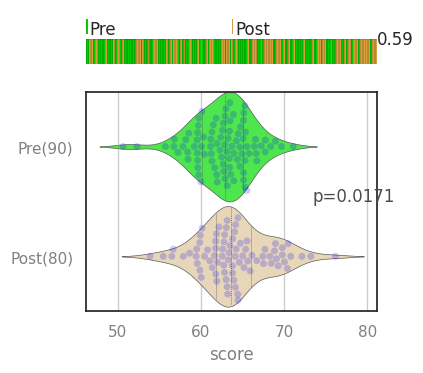

Chopard 2009, Human SOL and VL Muscles Post Bed Rest (n = 170)
GSE14798 http://hegemon.ucsd.edu/Tools/explore.php?key=polyps&id=M61
80 [44, 36] GSE14798 http://hegemon.ucsd.edu/Tools/explore.php?key=polyps&id=M61 M61
[81]


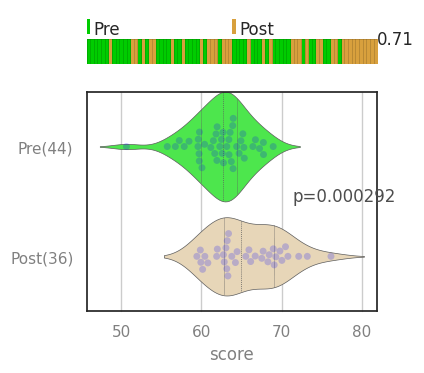

Chopard 2009, Human SOL and VL Muscles Post Bed Rest (n = 170)
GSE14798 http://hegemon.ucsd.edu/Tools/explore.php?key=polyps&id=M61
90 [46, 44] GSE14798 http://hegemon.ucsd.edu/Tools/explore.php?key=polyps&id=M61 M61
[81]


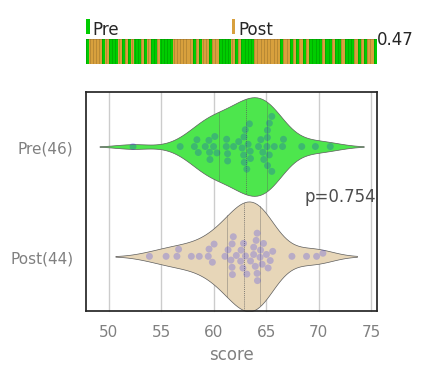

In [73]:
run=True
if run:
    saveName1='Figs/Bed_Rest/GSE14798_Chopard_2009_HomoSapiens/GSE14798_Chopard_2009_HomoSapiens_'
    runLst=[(1,'PrePostBedRest.pdf')]
    for tn,saveName in runLst:
        saveName=saveName1+saveName
        ana = IMMAnalysis()
        ana.getChopard2009(tn=tn,simpleNames=True)
        fig = processDataHnorm(ana,save=False,saveName=saveName,show=True,do2=False,do3=False)
        
    saveName1='Figs/Bed_Rest/GSE14901_Abadi_2009_HomoSapiens/GSE14901_Abadi_2009_HomoSapiens_'
    runLst=[(1,'PreCast2Days14Days.pdf')]
    for tn,saveName in runLst:
        saveName=saveName1+saveName
        ana = IMMAnalysis()
        ana.getAbadi2009(tn=tn,simpleNames=True)
        fig = processDataHnorm(ana,save=False,saveName=saveName,show=True,do1=False,do3=False)

<a id="fig4"></a>
# Figure 4
- [Get Pvals](#pvals)
- [Dot Plots](#dots)

[Return](#TOC)

<a id="pvals"></a>
## Get Pvals
- [Get Pvals](#pvals)

[Return](#fig4)

[1743, 1243, 14, 1, 864, 779, 394, 111, 2, 21, 2, 3, 594, 1727, 1, 933, 165, 977, 21, 3]
[111, 394, 779]
[-3, -2, -1]
Reich 2010, Human Sedentary Unloading Reloading (n = 21)
GSE21496 http://hegemon.ucsd.edu/Tools/explore.php?key=polyps&id=M63
21 [7, 14] GSE21496 http://hegemon.ucsd.edu/Tools/explore.php?key=polyps&id=M63 M63
[106]
Clarke 2018 Human Heritage Family Study (n = 82)
GSE117070 http://hegemon.ucsd.edu/Tools/explore.php?key=polyps&id=M7
82 [41, 41] GSE117070 http://hegemon.ucsd.edu/Tools/explore.php?key=polyps&id=M7 M7
[361, 351]
Neubauer 2013 Human Neutrophils (n = 64)
GSE43856 http://hegemon.ucsd.edu/Tools/explore.php?key=polyps&id=M15
16 [8, 8] GSE43856 http://hegemon.ucsd.edu/Tools/explore.php?key=polyps&id=M15 M15
[246, 244]
Romero 2016, Human Histamine-Blockade and Exercise (n = 48)
GSE71972 http://hegemon.ucsd.edu/Tools/explore.php?key=polyps&id=M78
16 [8, 8] GSE71972 http://hegemon.ucsd.edu/Tools/explore.php?key=polyps&id=M78 M78
[62]
Buttner 2007 Human Tour De Franc

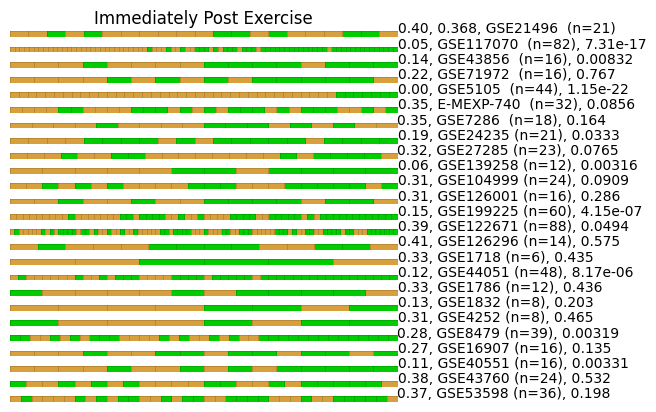

In [144]:
import bone
reload(bone)
genes, wt1, l1 = bone.getGeneGroups(debug=0)

order13 = [13]
wt1_13 = [-1]
order = [14, 3]
wt1 = [1, 2]
#order = [13, 14, 3]
#wt1 = [-1, 1, 2]


nx = [0, 1, 4, 5, 6, 8, 9, 10, 16, 17, 19, 20, 21, 25, 28]
genes, wt1, l1 = getMacGeneGroups([nx[i] for i in order], wt1, 0)

nx = [0, 1, 4, 5, 6, 8, 9, 10, 16, 17, 19, 20, 21, 25, 28]
genes13, wt1_13, l1_13 = getMacGeneGroups([nx[i] for i in order13], wt1_13, 0)

fig = plt.figure(figsize=(5,5), dpi=100)
n1 = 25
axlist = []
for i in range(n1):
    ax = plt.subplot2grid((n1, 1), (i, 0))
    axlist.extend([ax])

acolor = ["#00CC00", "#D8A03D","#EC008C",
          'cyan', "#B741DC", "#808285",
          'blue', 'black', 'green', 'red',
          'orange', 'brown', 'pink', 'purple']


ana = IMMAnalysis()
ana.getReich2010(2)
ana=orderDataDf1(ana,l1_13, wt1_13,urlbase='http://hegemon.ucsd.edu/~yovosko/Hegemon/explore.php?key=muscle')
params = {'spaceAnn': 40, 'tAnn': 5, 'widthAnn':5, 'acolor': acolor,
          'w': 5, 'h': 0.8, 'atypes': [],'cval': ana.cval, 'ax': axlist[0]}
ax = printTitleBar(ana,params)
res = ana.getMetrics(ana.cval[0])
pval=getPval(ana)
ax.text(len(ana.cval[0]), 4,res+', '+pval+', GSE21496  (n='+str(len(ana.cval[0]))+')')

ana = IMMAnalysis()
ana.getClarke2018(1)
ana=orderDataDf1(ana,l1, wt1,urlbase='http://hegemon.ucsd.edu/~yovosko/Hegemon/explore.php?key=muscle')
params = {'spaceAnn': 40, 'tAnn': 5, 'widthAnn':5, 'acolor': acolor,
          'w': 5, 'h': 0.8, 'atypes': [] ,'cval': ana.cval, 'ax': axlist[1]}
ax = printTitleBar(ana,params)
res = ana.getMetrics(ana.cval[0])
pval=getPval(ana)
ax.text(len(ana.cval[0]), 4,res+', GSE117070  (n='+str(len(ana.cval[0]))+'), '+pval)

ana = IMMAnalysis()
ana.getNeubauer2013(5)
ana=orderDataDf1(ana,l1, wt1,urlbase='http://hegemon.ucsd.edu/~yovosko/Hegemon/explore.php?key=muscle')
params = {'spaceAnn': 40, 'tAnn': 5, 'widthAnn':5, 'acolor': acolor,
          'w': 5, 'h': 0.8, 'atypes': [] ,'cval': ana.cval, 'ax': axlist[2]}
ax = printTitleBar(ana,params)
res = ana.getMetrics(ana.cval[0])
pval=getPval(ana)
ax.text(len(ana.cval[0]), 4,res+', GSE43856  (n='+str(len(ana.cval[0]))+'), '+pval)

ana = IMMAnalysis()
ana.getRomero2016(7)
ana=orderDataDf1(ana,l1_13, wt1_13,urlbase='http://hegemon.ucsd.edu/~yovosko/Hegemon/explore.php?key=muscle')
params = {'spaceAnn': 40, 'tAnn': 5, 'widthAnn':5, 'acolor': acolor,
          'w': 5, 'h': 0.8, 'atypes': [] ,'cval': ana.cval, 'ax': axlist[3]}
ax = printTitleBar(ana,params)
res = ana.getMetrics(ana.cval[0])
pval=getPval(ana)
ax.text(len(ana.cval[0]), 4, res+', GSE71972  (n='+str(len(ana.cval[0]))+'), '+pval)

ana = IMMAnalysis()
ana.getButtner2007(5)
ana=orderDataDf1(ana,l1, wt1,urlbase='http://hegemon.ucsd.edu/~yovosko/Hegemon/explore.php?key=muscle')
params = {'spaceAnn': 40, 'tAnn': 5, 'widthAnn':5, 'acolor': acolor,
          'w': 5, 'h': 0.8, 'atypes': [] ,'cval': ana.cval, 'ax': axlist[4]}
ax = printTitleBar(ana,params)
res = ana.getMetrics(ana.cval[0])
pval=getPval(ana)
ax.text(len(ana.cval[0]), 4, res+', GSE5105  (n='+str(len(ana.cval[0]))+'), '+pval)

ana = IMMAnalysis()
ana.getTarnopolsky2007(2)
ana=orderDataDf1(ana,l1, wt1,urlbase='http://hegemon.ucsd.edu/~yovosko/Hegemon/explore.php?key=muscle')
params = {'spaceAnn': 40, 'tAnn': 5, 'widthAnn':5, 'acolor': acolor,
          'w': 5, 'h': 0.8, 'atypes': [] ,'cval': ana.cval, 'ax': axlist[5]}
ax = printTitleBar(ana,params)
res = ana.getMetrics(ana.cval[0])
pval=getPval(ana)
ax.text(len(ana.cval[0]), 4, res+', E-MEXP-740  (n='+str(len(ana.cval[0]))+'), '+pval)

ana = IMMAnalysis()
ana.getKostek2007(4)
ana=orderDataDf1(ana,l1, wt1,urlbase='http://hegemon.ucsd.edu/~yovosko/Hegemon/explore.php?key=muscle')
params = {'spaceAnn': 40, 'tAnn': 5, 'widthAnn':5, 'acolor': acolor,
          'w': 5, 'h': 0.8, 'atypes': [] ,'cval': ana.cval, 'ax': axlist[6]}
ax = printTitleBar(ana,params)
res = ana.getMetrics(ana.cval[0])
pval=getPval(ana)
ax.text(len(ana.cval[0]), 4, res+', GSE7286  (n='+str(len(ana.cval[0]))+'), '+pval)

ana = IMMAnalysis()
ana.getLiu2010(7)
ana=orderDataDf1(ana,l1, wt1,urlbase='http://hegemon.ucsd.edu/~yovosko/Hegemon/explore.php?key=muscle')
params = {'spaceAnn': 40, 'tAnn': 5, 'widthAnn':5, 'acolor': acolor,
          'w': 5, 'h': 0.8, 'atypes': [] ,'cval': ana.cval, 'ax': axlist[7]}
ax = printTitleBar(ana,params)
res = ana.getMetrics(ana.cval[0])
pval=getPval(ana)
ax.text(len(ana.cval[0]), 4, res+', GSE24235 (n='+str(len(ana.cval[0]))+'), '+pval)

ana = IMMAnalysis()
ana.getRowlands2011(5)
ana=orderDataDf1(ana,l1, wt1,urlbase='http://hegemon.ucsd.edu/~yovosko/Hegemon/explore.php?key=muscle')
params = {'spaceAnn': 40, 'tAnn': 5, 'widthAnn':5, 'acolor': acolor,
          'w': 5, 'h': 0.8, 'atypes': [] ,'cval': ana.cval, 'ax': axlist[8]}
ax = printTitleBar(ana,params)
res = ana.getMetrics(ana.cval[0])
pval=getPval(ana)
ax.text(len(ana.cval[0]), 4, res+', GSE27285 (n='+str(len(ana.cval[0]))+'), '+pval)

ana = IMMAnalysis()
ana.getVega2020(2)
ana=orderDataDf1(ana,l1, wt1,urlbase='http://hegemon.ucsd.edu/~yovosko/Hegemon/explore.php?key=muscle')
params = {'spaceAnn': 40, 'tAnn': 5, 'widthAnn':5, 'acolor': acolor,
          'w': 5, 'h': 0.8, 'atypes': [] ,'cval': ana.cval, 'ax': axlist[9]}
ax = printTitleBar(ana,params)
res = ana.getMetrics(ana.cval[0])
pval=getPval(ana)
ax.text(len(ana.cval[0]), 4, res+', GSE139258 (n='+str(len(ana.cval[0]))+'), '+pval)

ana = IMMAnalysis()
ana.getRullman2018(1)
ana=orderDataDf1(ana,l1_13, wt1_13,urlbase='http://hegemon.ucsd.edu/~yovosko/Hegemon/explore.php?key=muscle')
params = {'spaceAnn': 40, 'tAnn': 5, 'widthAnn':5, 'acolor': acolor,
          'w': 5, 'h': 0.8, 'atypes': [] ,'cval': ana.cval, 'ax': axlist[10]}
ax = printTitleBar(ana,params)
res = ana.getMetrics(ana.cval[0])
pval=getPval(ana)
ax.text(len(ana.cval[0]), 4, res+', GSE104999 (n='+str(len(ana.cval[0]))+'), '+pval)

ana = IMMAnalysis()
ana.getKnudsen2020(1)
ana=orderDataDf1(ana,l1, wt1,urlbase='http://hegemon.ucsd.edu/~yovosko/Hegemon/explore.php?key=muscle')
params = {'spaceAnn': 40, 'tAnn': 5, 'widthAnn':5, 'acolor': acolor,
          'w': 5, 'h': 0.8, 'atypes': [] ,'cval': ana.cval, 'ax': axlist[11]}
ax = printTitleBar(ana,params)
res = ana.getMetrics(ana.cval[0])
pval=getPval(ana)
ax.text(len(ana.cval[0]), 4, res+', GSE126001 (n='+str(len(ana.cval[0]))+'), '+pval)

ana = IMMAnalysis()
ana.getMcLlvenna2022(1)
ana=orderDataDf1(ana,l1, wt1,urlbase='http://hegemon.ucsd.edu/~yovosko/Hegemon/explore.php?key=muscle')
params = {'spaceAnn': 40, 'tAnn': 5, 'widthAnn':5, 'acolor': acolor,
          'w': 5, 'h': 0.8, 'atypes': [] ,'cval': ana.cval, 'ax': axlist[12]}
ax = printTitleBar(ana,params)
res = ana.getMetrics(ana.cval[0])
pval=getPval(ana)
ax.text(len(ana.cval[0]), 4, res+', GSE199225 (n='+str(len(ana.cval[0]))+'), '+pval)

ana = IMMAnalysis()
ana.getSawada2019(1)
ana=orderDataDf1(ana,l1, wt1,urlbase='http://hegemon.ucsd.edu/~yovosko/Hegemon/explore.php?key=muscle')
params = {'spaceAnn': 40, 'tAnn': 5, 'widthAnn':5, 'acolor': acolor,
          'w': 5, 'h': 0.8, 'atypes': [] ,'cval': ana.cval, 'ax': axlist[13]}
ax = printTitleBar(ana,params)
res = ana.getMetrics(ana.cval[0])
pval=getPval(ana)
ax.text(len(ana.cval[0]), 4, res+', GSE122671 (n='+str(len(ana.cval[0]))+'), '+pval)

ana = IMMAnalysis()
ana.getRundqvist2019(4)
ana=orderDataDf1(ana,l1, wt1,urlbase='http://hegemon.ucsd.edu/~yovosko/Hegemon/explore.php?key=muscle')
params = {'spaceAnn': 40, 'tAnn': 5, 'widthAnn':5, 'acolor': acolor,
          'w': 5, 'h': 0.8, 'atypes': [] ,'cval': ana.cval, 'ax': axlist[14]}
ax = printTitleBar(ana,params)
res = ana.getMetrics(ana.cval[0])
pval=getPval(ana)
ax.text(len(ana.cval[0]), 4, res+', GSE126296 (n='+str(len(ana.cval[0]))+'), '+pval)

ana = IMMAnalysis()
ana.getTeranGarcia2005(1)
ana=orderDataDf1(ana,l1, wt1,urlbase='http://hegemon.ucsd.edu/~yovosko/Hegemon/explore.php?key=muscle')
params = {'spaceAnn': 40, 'tAnn': 5, 'widthAnn':5, 'acolor': acolor,
          'w': 5, 'h': 0.8, 'atypes': [] ,'cval': ana.cval, 'ax': axlist[15]}
ax = printTitleBar(ana,params)
res = ana.getMetrics(ana.cval[0])
pval=getPval(ana)
ax.text(len(ana.cval[0]), 4, res+', GSE1718 (n='+str(len(ana.cval[0]))+'), '+pval)

ana = IMMAnalysis()
ana.getMacNeil2010(6)
ana=orderDataDf1(ana,l1, wt1,urlbase='http://hegemon.ucsd.edu/~yovosko/Hegemon/explore.php?key=muscle')
params = {'spaceAnn': 40, 'tAnn': 5, 'widthAnn':5, 'acolor': acolor,
          'w': 5, 'h': 0.8, 'atypes': [] ,'cval': ana.cval, 'ax': axlist[16]}
ax = printTitleBar(ana,params)
res = ana.getMetrics(ana.cval[0])
pval=getPval(ana)
ax.text(len(ana.cval[0]), 4, res+', GSE44051 (n='+str(len(ana.cval[0]))+'), '+pval)

ana = IMMAnalysis()
ana.getRadomAizik2005(3)
ana=orderDataDf1(ana,l1, wt1,urlbase='http://hegemon.ucsd.edu/~yovosko/Hegemon/explore.php?key=muscle')
params = {'spaceAnn': 40, 'tAnn': 5, 'widthAnn':5, 'acolor': acolor,
          'w': 5, 'h': 0.8, 'atypes': [] ,'cval': ana.cval, 'ax': axlist[17]}
ax = printTitleBar(ana,params)
res = ana.getMetrics(ana.cval[0])
pval=getPval(ana)
ax.text(len(ana.cval[0]), 4, res+', GSE1786 (n='+str(len(ana.cval[0]))+'), '+pval)

ana = IMMAnalysis()
ana.getZambon2003(2)
ana=orderDataDf1(ana,l1, wt1,urlbase='http://hegemon.ucsd.edu/~yovosko/Hegemon/explore.php?key=muscle')
params = {'spaceAnn': 40, 'tAnn': 5, 'widthAnn':5, 'acolor': acolor,
          'w': 5, 'h': 0.8, 'atypes': [] ,'cval': ana.cval, 'ax': axlist[18]}
ax = printTitleBar(ana,params)
res = ana.getMetrics(ana.cval[0])
pval=getPval(ana)
ax.text(len(ana.cval[0]), 4, res+', GSE1832 (n='+str(len(ana.cval[0]))+'), '+pval)

ana = IMMAnalysis()
ana.getMahoney2005(2)
ana=orderDataDf1(ana,l1_13, wt1_13,urlbase='http://hegemon.ucsd.edu/~yovosko/Hegemon/explore.php?key=muscle')
params = {'spaceAnn': 40, 'tAnn': 5, 'widthAnn':5, 'acolor': acolor,
          'w': 5, 'h': 0.8, 'atypes': [] ,'cval': ana.cval, 'ax': axlist[19]}
ax = printTitleBar(ana,params)
res = ana.getMetrics(ana.cval[0])
pval=getPval(ana)
ax.text(len(ana.cval[0]), 4, res+', GSE4252 (n='+str(len(ana.cval[0]))+'), '+pval)

ana = IMMAnalysis()
ana.getMelov2007(2)
ana=orderDataDf1(ana,l1, wt1,urlbase='http://hegemon.ucsd.edu/~yovosko/Hegemon/explore.php?key=muscle')
params = {'spaceAnn': 40, 'tAnn': 5, 'widthAnn':5, 'acolor': acolor,
          'w': 5, 'h': 0.8, 'atypes': [] ,'cval': ana.cval, 'ax': axlist[20]}
ax = printTitleBar(ana,params)
res = ana.getMetrics(ana.cval[0])
pval=getPval(ana)
ax.text(len(ana.cval[0]), 4, res+', GSE8479 (n='+str(len(ana.cval[0]))+'), '+pval)

ana = IMMAnalysis()
ana.getPollanen2010(2)
ana=orderDataDf1(ana,l1, wt1,urlbase='http://hegemon.ucsd.edu/~yovosko/Hegemon/explore.php?key=muscle')
params = {'spaceAnn': 40, 'tAnn': 5, 'widthAnn':5, 'acolor': acolor,
          'w': 5, 'h': 0.8, 'atypes': [] ,'cval': ana.cval, 'ax': axlist[21]}
ax = printTitleBar(ana,params)
res = ana.getMetrics(ana.cval[0])
pval=getPval(ana)
ax.text(len(ana.cval[0]), 4, res+', GSE16907 (n='+str(len(ana.cval[0]))+'), '+pval)

ana = IMMAnalysis()
ana.getEngeli2012(1)
ana=orderDataDf1(ana,l1, wt1,urlbase='http://hegemon.ucsd.edu/~yovosko/Hegemon/explore.php?key=muscle')
params = {'spaceAnn': 40, 'tAnn': 5, 'widthAnn':5, 'acolor': acolor,
          'w': 5, 'h': 0.8, 'atypes': [] ,'cval': ana.cval, 'ax': axlist[22]}
ax = printTitleBar(ana,params)
res = ana.getMetrics(ana.cval[0])
pval=getPval(ana)
ax.text(len(ana.cval[0]), 4, res+', GSE40551 (n='+str(len(ana.cval[0]))+'), '+pval)

ana = IMMAnalysis()
ana.getPoelkens2013(1)
ana=orderDataDf1(ana,l1, wt1,urlbase='http://hegemon.ucsd.edu/~yovosko/Hegemon/explore.php?key=muscle')
params = {'spaceAnn': 40, 'tAnn': 5, 'widthAnn':5, 'acolor': acolor,
          'w': 5, 'h': 0.8, 'atypes': [] ,'cval': ana.cval, 'ax': axlist[23]}
ax = printTitleBar(ana,params)
res = ana.getMetrics(ana.cval[0])
pval=getPval(ana)
ax.text(len(ana.cval[0]), 4, res+', GSE43760 (n='+str(len(ana.cval[0]))+'), '+pval)

ana = IMMAnalysis()
ana.getCatoire2014(1)
ana=orderDataDf1(ana,l1, wt1,urlbase='http://hegemon.ucsd.edu/~yovosko/Hegemon/explore.php?key=muscle')
params = {'spaceAnn': 40, 'tAnn': 5, 'widthAnn':5, 'acolor': acolor,
          'w': 5, 'h': 0.8, 'atypes': [] ,'cval': ana.cval, 'ax': axlist[24]}
ax = printTitleBar(ana,params)
res = ana.getMetrics(ana.cval[0])
pval=getPval(ana)
ax.text(len(ana.cval[0]), 4, res+', GSE53598 (n='+str(len(ana.cval[0]))+'), '+pval)

ax=axlist[0]
ax.set_title('Immediately Post Exercise')
plt.savefig('ImmediatePostExercisePattern1.png',bbox_inches="tight")

[1743, 1243, 14, 1, 864, 779, 394, 111, 2, 21, 2, 3, 594, 1727, 1, 933, 165, 977, 21, 3]
[111, 394, 779]
[-3, -2, -1]
Hittel 2005, Human STRRIDE Overweigght 9 months (n = 32)
GSE1295 http://hegemon.ucsd.edu/Tools/explore.php?key=polyps&id=M46
6 [3, 3] GSE1295 http://hegemon.ucsd.edu/Tools/explore.php?key=polyps&id=M46 M46
[255, 255]
Gordon 2014, Human 12 Week One Arm RT One Arm Not (n = 14)
GSE28998 http://hegemon.ucsd.edu/Tools/explore.php?key=polyps&id=M68
14 [7, 7] GSE28998 http://hegemon.ucsd.edu/Tools/explore.php?key=polyps&id=M68 M68
[361, 351]
Lammers 2013, Human Unilateral Lower Limb Suspension and Spinal Cord Injury (n = 14)
GSE33886 http://hegemon.ucsd.edu/Tools/explore.php?key=polyps&id=M64
6 [3, 3] GSE33886 http://hegemon.ucsd.edu/Tools/explore.php?key=polyps&id=M64 M64
[150, 163]
Rampersaud 2012 Human 12 Weeks Sedentary Women (n = 120)
GSE34788 http://hegemon.ucsd.edu/Tools/explore.php?key=polyps&id=MB11
60 [16, 44] GSE34788 http://hegemon.ucsd.edu/Tools/explore.php?key=po

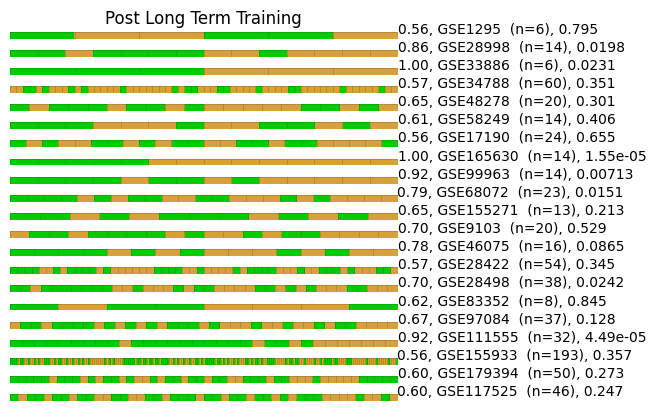

In [147]:
import bone
reload(bone)
genes, wt1, l1 = bone.getGeneGroups(debug=0)

order13 = [13]
wt1_13 = [-1]
order = [14, 3]
wt1 = [1, 2]
#order = [13, 14, 3]
#wt1 = [-1, 1, 2]


nx = [0, 1, 4, 5, 6, 8, 9, 10, 16, 17, 19, 20, 21, 25, 28]
genes, wt1, l1 = getMacGeneGroups([nx[i] for i in order], wt1, 0)

nx = [0, 1, 4, 5, 6, 8, 9, 10, 16, 17, 19, 20, 21, 25, 28]
genes13, wt1_13, l1_13 = getMacGeneGroups([nx[i] for i in order13], wt1_13, 0)

fig = plt.figure(figsize=(5,5), dpi=100)
n1 = 21
axlist = []
for i in range(n1):
    ax = plt.subplot2grid((n1, 1), (i, 0))
    axlist.extend([ax])

acolor = ["#00CC00", "#D8A03D","#EC008C",
          'cyan', "#B741DC", "#808285",
          'blue', 'black', 'green', 'red',
          'orange', 'brown', 'pink', 'purple']

ana = IMMAnalysis()
ana.getHittel2005(5)
ana=orderDataDf1(ana,l1, wt1,urlbase='http://hegemon.ucsd.edu/~yovosko/Hegemon/explore.php?key=muscle')
params = {'spaceAnn': 40, 'tAnn': 5, 'widthAnn':5, 'acolor': acolor,
          'w': 5, 'h': 0.8, 'atypes': [],'cval': ana.cval, 'ax': axlist[0]}
ax = printTitleBar(ana,params)
res = ana.getMetrics(ana.cval[0])
pval=getPval(ana)
ax.text(len(ana.cval[0]), 4, res+', GSE1295  (n='+str(len(ana.cval[0]))+'), '+pval)

ana = IMMAnalysis()
ana.getGordon2012(1)
ana=orderDataDf1(ana,l1, wt1,urlbase='http://hegemon.ucsd.edu/~yovosko/Hegemon/explore.php?key=muscle')
params = {'spaceAnn': 40, 'tAnn': 5, 'widthAnn':5, 'acolor': acolor,
          'w': 5, 'h': 0.8, 'atypes': [],'cval': ana.cval, 'ax': axlist[1]}
ax = printTitleBar(ana,params)
res = ana.getMetrics(ana.cval[0])
pval=getPval(ana)
ax.text(len(ana.cval[0]), 4, res+', GSE28998  (n='+str(len(ana.cval[0]))+'), '+pval)

ana = IMMAnalysis()
ana.getLammers2012(3)
ana=orderDataDf1(ana,l1, wt1,urlbase='http://hegemon.ucsd.edu/~yovosko/Hegemon/explore.php?key=muscle')
params = {'spaceAnn': 40, 'tAnn': 5, 'widthAnn':5, 'acolor': acolor,
          'w': 5, 'h': 0.8, 'atypes': [],'cval': ana.cval, 'ax': axlist[2]}
ax = printTitleBar(ana,params)
res = ana.getMetrics(ana.cval[0])
pval=getPval(ana)
ax.text(len(ana.cval[0]), 4, res+', GSE33886  (n='+str(len(ana.cval[0]))+'), '+pval)

ana = IMMAnalysis()
ana.getRampersaud2013(7)
ana=orderDataDf1(ana,l1, wt1,urlbase='http://hegemon.ucsd.edu/~yovosko/Hegemon/explore.php?key=muscle')
params = {'spaceAnn': 40, 'tAnn': 5, 'widthAnn':5, 'acolor': acolor,
          'w': 5, 'h': 0.8, 'atypes': [],'cval': ana.cval, 'ax': axlist[3]}
ax = printTitleBar(ana,params)
res = ana.getMetrics(ana.cval[0])
pval=getPval(ana)
ax.text(len(ana.cval[0]), 4, res+', GSE34788  (n='+str(len(ana.cval[0]))+'), '+pval)

ana = IMMAnalysis()
ana.getHuffman2014(17)
ana=orderDataDf1(ana,l1, wt1,urlbase='http://hegemon.ucsd.edu/~yovosko/Hegemon/explore.php?key=muscle')
params = {'spaceAnn': 40, 'tAnn': 5, 'widthAnn':5, 'acolor': acolor,
          'w': 5, 'h': 0.8, 'atypes': [],'cval': ana.cval, 'ax': axlist[4]}
ax = printTitleBar(ana,params)
res = ana.getMetrics(ana.cval[0])
pval=getPval(ana)
ax.text(len(ana.cval[0]), 4, res+', GSE48278  (n='+str(len(ana.cval[0]))+'), '+pval)

ana = IMMAnalysis()
ana.getRowlands2014(4)
ana=orderDataDf1(ana,l1, wt1,urlbase='http://hegemon.ucsd.edu/~yovosko/Hegemon/explore.php?key=muscle')
params = {'spaceAnn': 40, 'tAnn': 5, 'widthAnn':5, 'acolor': acolor,
          'w': 5, 'h': 0.8, 'atypes': [],'cval': ana.cval, 'ax': axlist[5]}
ax = printTitleBar(ana,params)
res = ana.getMetrics(ana.cval[0])
pval=getPval(ana)
ax.text(len(ana.cval[0]), 4, res+', GSE58249  (n='+str(len(ana.cval[0]))+'), '+pval)

ana = IMMAnalysis()
ana.getKivela2010(1)
ana=orderDataDf1(ana,l1, wt1,urlbase='http://hegemon.ucsd.edu/~yovosko/Hegemon/explore.php?key=muscle')
params = {'spaceAnn': 40, 'tAnn': 5, 'widthAnn':5, 'acolor': acolor,
          'w': 5, 'h': 0.8, 'atypes': [],'cval': ana.cval, 'ax': axlist[6]}
ax = printTitleBar(ana,params)
res = ana.getMetrics(ana.cval[0])
pval=getPval(ana)
ax.text(len(ana.cval[0]), 4, res+', GSE17190  (n='+str(len(ana.cval[0]))+'), '+pval)

ana = IMMAnalysis()
ana.getDeSanctis2021(1)
ana=orderDataDf1(ana,l1_13, wt1_13,urlbase='http://hegemon.ucsd.edu/~yovosko/Hegemon/explore.php?key=muscle')
params = {'spaceAnn': 40, 'tAnn': 5, 'widthAnn':5, 'acolor': acolor,
          'w': 5, 'h': 0.8, 'atypes': [],'cval': ana.cval, 'ax': axlist[7]}
ax = printTitleBar(ana,params)
res = ana.getMetrics(ana.cval[0])
pval=getPval(ana)
ax.text(len(ana.cval[0]), 4, res+', GSE165630  (n='+str(len(ana.cval[0]))+'), '+pval)

ana = IMMAnalysis()
ana.getLaker2017(3)
ana=orderDataDf1(ana,l1, wt1,urlbase='http://hegemon.ucsd.edu/~yovosko/Hegemon/explore.php?key=muscle')
params = {'spaceAnn': 40, 'tAnn': 5, 'widthAnn':5, 'acolor': acolor,
          'w': 5, 'h': 0.8, 'atypes': [],'cval': ana.cval, 'ax': axlist[8]}
ax = printTitleBar(ana,params)
res = ana.getMetrics(ana.cval[0])
pval=getPval(ana)
ax.text(len(ana.cval[0]), 4, res+', GSE99963  (n='+str(len(ana.cval[0]))+'), '+pval)

ana = IMMAnalysis()
ana.getLiu2017(1)
ana=orderDataDf1(ana,l1, wt1,urlbase='http://hegemon.ucsd.edu/~yovosko/Hegemon/explore.php?key=muscle')
params = {'spaceAnn': 40, 'tAnn': 5, 'widthAnn':5, 'acolor': acolor,
          'w': 5, 'h': 0.8, 'atypes': [],'cval': ana.cval, 'ax': axlist[9]}
ax = printTitleBar(ana,params)
res = ana.getMetrics(ana.cval[0])
pval=getPval(ana)
ax.text(len(ana.cval[0]), 4, res+', GSE68072  (n='+str(len(ana.cval[0]))+'), '+pval)

ana = IMMAnalysis()
ana.getKhakehi2020(1)
ana=orderDataDf1(ana,l1, wt1,urlbase='http://hegemon.ucsd.edu/~yovosko/Hegemon/explore.php?key=muscle')
params = {'spaceAnn': 40, 'tAnn': 5, 'widthAnn':5, 'acolor': acolor,
          'w': 5, 'h': 0.8, 'atypes': [],'cval': ana.cval, 'ax': axlist[10]}
ax = printTitleBar(ana,params)
res = ana.getMetrics(ana.cval[0])
pval=getPval(ana)
ax.text(len(ana.cval[0]), 4, res+', GSE155271  (n='+str(len(ana.cval[0]))+'), '+pval)

ana = IMMAnalysis()
ana.getLanza2008(3)
ana=orderDataDf1(ana,l1, wt1,urlbase='http://hegemon.ucsd.edu/~yovosko/Hegemon/explore.php?key=muscle')
params = {'spaceAnn': 40, 'tAnn': 5, 'widthAnn':5, 'acolor': acolor,
          'w': 5, 'h': 0.8, 'atypes': [],'cval': ana.cval, 'ax': axlist[11]}
ax = printTitleBar(ana,params)
res = ana.getMetrics(ana.cval[0])
pval=getPval(ana)
ax.text(len(ana.cval[0]), 4, res+', GSE9103  (n='+str(len(ana.cval[0]))+'), '+pval)

ana = IMMAnalysis()
ana.getTonevitsky2013(5)
ana=orderDataDf1(ana,l1, wt1,urlbase='http://hegemon.ucsd.edu/~yovosko/Hegemon/explore.php?key=muscle')
params = {'spaceAnn': 40, 'tAnn': 5, 'widthAnn':5, 'acolor': acolor,
          'w': 5, 'h': 0.8, 'atypes': [],'cval': ana.cval, 'ax': axlist[12]}
ax = printTitleBar(ana,params)
res = ana.getMetrics(ana.cval[0])
pval=getPval(ana)
ax.text(len(ana.cval[0]), 4, res+', GSE46075  (n='+str(len(ana.cval[0]))+'), '+pval)

ana = IMMAnalysis()
ana.getRaue2012(20)
ana=orderDataDf1(ana,l1, wt1,urlbase='http://hegemon.ucsd.edu/~yovosko/Hegemon/explore.php?key=muscle')
params = {'spaceAnn': 40, 'tAnn': 5, 'widthAnn':5, 'acolor': acolor,
          'w': 5, 'h': 0.8, 'atypes': [],'cval': ana.cval, 'ax': axlist[13]}
ax = printTitleBar(ana,params)
res = ana.getMetrics(ana.cval[0])
pval=getPval(ana)
ax.text(len(ana.cval[0]), 4, res+', GSE28422  (n='+str(len(ana.cval[0]))+'), '+pval)

ana = IMMAnalysis()
ana.getSakharov2012(3)
ana=orderDataDf1(ana,l1, wt1,urlbase='http://hegemon.ucsd.edu/~yovosko/Hegemon/explore.php?key=muscle')
params = {'spaceAnn': 40, 'tAnn': 5, 'widthAnn':5, 'acolor': acolor,
          'w': 5, 'h': 0.8, 'atypes': [],'cval': ana.cval, 'ax': axlist[14]}
ax = printTitleBar(ana,params)
res = ana.getMetrics(ana.cval[0])
pval=getPval(ana)
ax.text(len(ana.cval[0]), 4, res+', GSE28498  (n='+str(len(ana.cval[0]))+'), '+pval)

ana = IMMAnalysis()
ana.getBarberio2016(6)
ana=orderDataDf1(ana,l1, wt1,urlbase='http://hegemon.ucsd.edu/~yovosko/Hegemon/explore.php?key=muscle')
params = {'spaceAnn': 40, 'tAnn': 5, 'widthAnn':5, 'acolor': acolor,
          'w': 5, 'h': 0.8, 'atypes': [],'cval': ana.cval, 'ax': axlist[15]}
ax = printTitleBar(ana,params)
res = ana.getMetrics(ana.cval[0])
pval=getPval(ana)
ax.text(len(ana.cval[0]), 4, res+', GSE83352  (n='+str(len(ana.cval[0]))+'), '+pval)

ana = IMMAnalysis()
ana.getRobinson2017(7)
ana=orderDataDf1(ana,l1, wt1,urlbase='http://hegemon.ucsd.edu/~yovosko/Hegemon/explore.php?key=muscle')
params = {'spaceAnn': 40, 'tAnn': 5, 'widthAnn':5, 'acolor': acolor,
          'w': 5, 'h': 0.8, 'atypes': [],'cval': ana.cval, 'ax': axlist[16]}
ax = printTitleBar(ana,params)
res = ana.getMetrics(ana.cval[0])
pval=getPval(ana)
ax.text(len(ana.cval[0]), 4, res+', GSE97084  (n='+str(len(ana.cval[0]))+'), '+pval)

ana = IMMAnalysis()
ana.getSilva2018(2)
ana=orderDataDf1(ana,l1, wt1,urlbase='http://hegemon.ucsd.edu/~yovosko/Hegemon/explore.php?key=muscle')
params = {'spaceAnn': 40, 'tAnn': 5, 'widthAnn':5, 'acolor': acolor,
          'w': 5, 'h': 0.8, 'atypes': [],'cval': ana.cval, 'ax': axlist[17]}
ax = printTitleBar(ana,params)
res = ana.getMetrics(ana.cval[0])
pval=getPval(ana)
ax.text(len(ana.cval[0]), 4, res+', GSE111555  (n='+str(len(ana.cval[0]))+'), '+pval)

ana = IMMAnalysis()
ana.getTimmons2020(4,mn=2)
ana=orderDataDf1(ana,l1, wt1,urlbase='http://hegemon.ucsd.edu/~yovosko/Hegemon/explore.php?key=muscle')
params = {'spaceAnn': 40, 'tAnn': 5, 'widthAnn':5, 'acolor': acolor,
          'w': 5, 'h': 0.8, 'atypes': [],'cval': ana.cval, 'ax': axlist[18]}
ax = printTitleBar(ana,params)
res = ana.getMetrics(ana.cval[0])
pval=getPval(ana)
ax.text(len(ana.cval[0]), 4, res+', GSE155933  (n='+str(len(ana.cval[0]))+'), '+pval)

ana = IMMAnalysis()
ana.getVanDenHoek2021(2)
ana=orderDataDf1(ana,l1, wt1,urlbase='http://hegemon.ucsd.edu/~yovosko/Hegemon/explore.php?key=muscle')
params = {'spaceAnn': 40, 'tAnn': 5, 'widthAnn':5, 'acolor': acolor,
          'w': 5, 'h': 0.8, 'atypes': [],'cval': ana.cval, 'ax': axlist[19]}
ax = printTitleBar(ana,params)
res = ana.getMetrics(ana.cval[0])
pval=getPval(ana)
ax.text(len(ana.cval[0]), 4, res+', GSE179394  (n='+str(len(ana.cval[0]))+'), '+pval)

ana = IMMAnalysis()
ana.getHangelbroek2016(8)
ana=orderDataDf1(ana,l1, wt1,urlbase='http://hegemon.ucsd.edu/~yovosko/Hegemon/explore.php?key=muscle')
params = {'spaceAnn': 40, 'tAnn': 5, 'widthAnn':5, 'acolor': acolor,
          'w': 5, 'h': 0.8, 'atypes': [],'cval': ana.cval, 'ax': axlist[20]}
ax = printTitleBar(ana,params)
res = ana.getMetrics(ana.cval[0])
pval=getPval(ana)
ax.text(len(ana.cval[0]), 4, res+', GSE117525  (n='+str(len(ana.cval[0]))+'), '+pval)

ax=axlist[0]
ax.set_title('Post Long Term Training')
plt.savefig('LongTermExercisePattern2.png',bbox_inches="tight")

In [19]:
import bone
reload(bone)
genes, wt1, l1 = bone.getGeneGroups(debug=0)

order13 = [13]
wt1_13 = [-1]
order = [14, 3]
wt1 = [1, 2]
#order = [13, 14, 3]
#wt1 = [-1, 1, 2]


nx = [0, 1, 4, 5, 6, 8, 9, 10, 16, 17, 19, 20, 21, 25, 28]
genes, wt1, l1 = getMacGeneGroups([nx[i] for i in order], wt1, 0)

nx = [0, 1, 4, 5, 6, 8, 9, 10, 16, 17, 19, 20, 21, 25, 28]
genes13, wt1_13, l1_13 = getMacGeneGroups([nx[i] for i in order13], wt1_13, 0)


dataLst=[]
ana = IMMAnalysis()
ana.getReich2010(2)
ana=orderDataDf1(ana,l1_13, wt1_13,urlbase='http://hegemon.ucsd.edu/~yovosko/Hegemon/explore.php?key=muscle')
res = ana.getMetrics(ana.cval[0])
pval=getPval(ana)
dataLst.append((len(ana.cval[0]),res,'GSE21496',pval))

ana = IMMAnalysis()
ana.getClarke2018(1)
ana=orderDataDf1(ana,l1, wt1,urlbase='http://hegemon.ucsd.edu/~yovosko/Hegemon/explore.php?key=muscle')
res = ana.getMetrics(ana.cval[0])
pval=getPval(ana)
dataLst.append((len(ana.cval[0]),res,'GSE117070',pval))

ana = IMMAnalysis()
ana.getNeubauer2013(5)
ana=orderDataDf1(ana,l1, wt1,urlbase='http://hegemon.ucsd.edu/~yovosko/Hegemon/explore.php?key=muscle')
res = ana.getMetrics(ana.cval[0])
pval=getPval(ana)
dataLst.append((len(ana.cval[0]),res,'GSE43856',pval))

ana = IMMAnalysis()
ana.getRomero2016(7)
ana=orderDataDf1(ana,l1_13, wt1_13,urlbase='http://hegemon.ucsd.edu/~yovosko/Hegemon/explore.php?key=muscle')
res = ana.getMetrics(ana.cval[0])
pval=getPval(ana)
dataLst.append((len(ana.cval[0]), res,'GSE71972',pval))

ana = IMMAnalysis()
ana.getButtner2007(5)
ana=orderDataDf1(ana,l1, wt1,urlbase='http://hegemon.ucsd.edu/~yovosko/Hegemon/explore.php?key=muscle')
res = ana.getMetrics(ana.cval[0])
pval=getPval(ana)
dataLst.append((len(ana.cval[0]), res,'GSE5105',pval))

ana = IMMAnalysis()
ana.getTarnopolsky2007(2)
ana=orderDataDf1(ana,l1, wt1,urlbase='http://hegemon.ucsd.edu/~yovosko/Hegemon/explore.php?key=muscle')
res = ana.getMetrics(ana.cval[0])
pval=getPval(ana)
dataLst.append((len(ana.cval[0]), res,'E-MEXP-740',pval))

ana = IMMAnalysis()
ana.getKostek2007(4)
ana=orderDataDf1(ana,l1, wt1,urlbase='http://hegemon.ucsd.edu/~yovosko/Hegemon/explore.php?key=muscle')
res = ana.getMetrics(ana.cval[0])
pval=getPval(ana)
dataLst.append((len(ana.cval[0]), res,'GSE7286',pval))

ana = IMMAnalysis()
ana.getLiu2010(7)
ana=orderDataDf1(ana,l1, wt1,urlbase='http://hegemon.ucsd.edu/~yovosko/Hegemon/explore.php?key=muscle')
res = ana.getMetrics(ana.cval[0])
pval=getPval(ana)
dataLst.append((len(ana.cval[0]), res,'GSE24235',pval))

ana = IMMAnalysis()
ana.getRowlands2011(5)
ana=orderDataDf1(ana,l1, wt1,urlbase='http://hegemon.ucsd.edu/~yovosko/Hegemon/explore.php?key=muscle')
res = ana.getMetrics(ana.cval[0])
pval=getPval(ana)
dataLst.append((len(ana.cval[0]), res,'GSE27285',pval))

ana = IMMAnalysis()
ana.getVega2020(2)
ana=orderDataDf1(ana,l1, wt1,urlbase='http://hegemon.ucsd.edu/~yovosko/Hegemon/explore.php?key=muscle')
res = ana.getMetrics(ana.cval[0])
pval=getPval(ana)
dataLst.append((len(ana.cval[0]), res,'GSE139258',pval))

ana = IMMAnalysis()
ana.getRullman2018(1)
ana=orderDataDf1(ana,l1_13, wt1_13,urlbase='http://hegemon.ucsd.edu/~yovosko/Hegemon/explore.php?key=muscle')
res = ana.getMetrics(ana.cval[0])
pval=getPval(ana)
dataLst.append((len(ana.cval[0]), res,'GSE104999',pval))

ana = IMMAnalysis()
ana.getKnudsen2020(1)
ana=orderDataDf1(ana,l1, wt1,urlbase='http://hegemon.ucsd.edu/~yovosko/Hegemon/explore.php?key=muscle')
res = ana.getMetrics(ana.cval[0])
pval=getPval(ana)
dataLst.append((len(ana.cval[0]), res,'GSE126001',pval))

ana = IMMAnalysis()
ana.getMcLlvenna2022(1)
ana=orderDataDf1(ana,l1, wt1,urlbase='http://hegemon.ucsd.edu/~yovosko/Hegemon/explore.php?key=muscle')
res = ana.getMetrics(ana.cval[0])
pval=getPval(ana)
dataLst.append((len(ana.cval[0]), res,'GSE199225',pval))

ana = IMMAnalysis()
ana.getSawada2019(1)
ana=orderDataDf1(ana,l1, wt1,urlbase='http://hegemon.ucsd.edu/~yovosko/Hegemon/explore.php?key=muscle')
res = ana.getMetrics(ana.cval[0])
pval=getPval(ana)
dataLst.append((len(ana.cval[0]), res,'GSE122671',pval))

ana = IMMAnalysis()
ana.getRundqvist2019(4)
ana=orderDataDf1(ana,l1, wt1,urlbase='http://hegemon.ucsd.edu/~yovosko/Hegemon/explore.php?key=muscle')
res = ana.getMetrics(ana.cval[0])
pval=getPval(ana)
dataLst.append((len(ana.cval[0]), res,'GSE126296',pval))

ana = IMMAnalysis()
ana.getTeranGarcia2005(1)
ana=orderDataDf1(ana,l1, wt1,urlbase='http://hegemon.ucsd.edu/~yovosko/Hegemon/explore.php?key=muscle')
res = ana.getMetrics(ana.cval[0])
pval=getPval(ana)
dataLst.append((len(ana.cval[0]), res,'GSE1718',pval))

ana = IMMAnalysis()
ana.getMacNeil2010(6)
ana=orderDataDf1(ana,l1, wt1,urlbase='http://hegemon.ucsd.edu/~yovosko/Hegemon/explore.php?key=muscle')
res = ana.getMetrics(ana.cval[0])
pval=getPval(ana)
dataLst.append((len(ana.cval[0]), res,'GSE44051',pval))

ana = IMMAnalysis()
ana.getRadomAizik2005(3)
ana=orderDataDf1(ana,l1, wt1,urlbase='http://hegemon.ucsd.edu/~yovosko/Hegemon/explore.php?key=muscle')
res = ana.getMetrics(ana.cval[0])
pval=getPval(ana)
dataLst.append((len(ana.cval[0]), res,'GSE1786',pval))

ana = IMMAnalysis()
ana.getZambon2003(2)
ana=orderDataDf1(ana,l1, wt1,urlbase='http://hegemon.ucsd.edu/~yovosko/Hegemon/explore.php?key=muscle')
res = ana.getMetrics(ana.cval[0])
pval=getPval(ana)
dataLst.append((len(ana.cval[0]), res,'GSE1832',pval))

ana = IMMAnalysis()
ana.getMahoney2005(2)
ana=orderDataDf1(ana,l1_13, wt1_13,urlbase='http://hegemon.ucsd.edu/~yovosko/Hegemon/explore.php?key=muscle')
res = ana.getMetrics(ana.cval[0])
pval=getPval(ana)
dataLst.append((len(ana.cval[0]), res,'GSE4252',pval))

ana = IMMAnalysis()
ana.getMelov2007(2)
ana=orderDataDf1(ana,l1, wt1,urlbase='http://hegemon.ucsd.edu/~yovosko/Hegemon/explore.php?key=muscle')
res = ana.getMetrics(ana.cval[0])
pval=getPval(ana)
dataLst.append((len(ana.cval[0]), res,'GSE8479',pval))

ana = IMMAnalysis()
ana.getPollanen2010(2)
ana=orderDataDf1(ana,l1, wt1,urlbase='http://hegemon.ucsd.edu/~yovosko/Hegemon/explore.php?key=muscle')
res = ana.getMetrics(ana.cval[0])
pval=getPval(ana)
dataLst.append((len(ana.cval[0]), res,'GSE16907',pval))

ana = IMMAnalysis()
ana.getEngeli2012(1)
ana=orderDataDf1(ana,l1, wt1,urlbase='http://hegemon.ucsd.edu/~yovosko/Hegemon/explore.php?key=muscle')
res = ana.getMetrics(ana.cval[0])
pval=getPval(ana)
dataLst.append((len(ana.cval[0]), res,'GSE40551',pval))

ana = IMMAnalysis()
ana.getPoelkens2013(1)
ana=orderDataDf1(ana,l1, wt1,urlbase='http://hegemon.ucsd.edu/~yovosko/Hegemon/explore.php?key=muscle')
res = ana.getMetrics(ana.cval[0])
pval=getPval(ana)
dataLst.append((len(ana.cval[0]), res,'GSE43760',pval))

ana = IMMAnalysis()
ana.getCatoire2014(1)
ana=orderDataDf1(ana,l1, wt1,urlbase='http://hegemon.ucsd.edu/~yovosko/Hegemon/explore.php?key=muscle')
res = ana.getMetrics(ana.cval[0])
pval=getPval(ana)
dataLst.append((len(ana.cval[0]), res,'GSE53598',pval))

[1743, 1243, 14, 1, 864, 779, 394, 111, 2, 21, 2, 3, 594, 1727, 1, 933, 165, 977, 21, 3]
[111, 394, 779]
[-3, -2, -1]
Reich 2010, Human Sedentary Unloading Reloading (n = 21)
GSE21496 http://hegemon.ucsd.edu/Tools/explore.php?key=polyps&id=M63
21 [7, 14] GSE21496 http://hegemon.ucsd.edu/Tools/explore.php?key=polyps&id=M63 M63


EmptyDataError: No columns to parse from file

In [32]:
import bone
reload(bone)
genes, wt1, l1 = bone.getGeneGroups(debug=0)

order13 = [13]
wt1_13 = [-1]
order = [14, 3]
wt1 = [1, 2]
#order = [13, 14, 3]
#wt1 = [-1, 1, 2]


nx = [0, 1, 4, 5, 6, 8, 9, 10, 16, 17, 19, 20, 21, 25, 28]
genes, wt1, l1 = getMacGeneGroups([nx[i] for i in order], wt1, 0)

nx = [0, 1, 4, 5, 6, 8, 9, 10, 16, 17, 19, 20, 21, 25, 28]
genes13, wt1_13, l1_13 = getMacGeneGroups([nx[i] for i in order13], wt1_13, 0)

dataLst2=[]

ana = IMMAnalysis()
ana.getHittel2005(5)
ana=orderDataDf1(ana,l1, wt1,urlbase='http://hegemon.ucsd.edu/~yovosko/Hegemon/explore.php?key=muscle')
res = ana.getMetrics(ana.cval[0])
pval=getPval(ana)
dataLst2.append((len(ana.cval[0]), res,'GSE1295',pval))

ana = IMMAnalysis()
ana.getGordon2012(1)
ana=orderDataDf1(ana,l1, wt1,urlbase='http://hegemon.ucsd.edu/~yovosko/Hegemon/explore.php?key=muscle')
res = ana.getMetrics(ana.cval[0])
pval=getPval(ana)
dataLst2.append((len(ana.cval[0]), res,'GSE28998',pval))

ana = IMMAnalysis()
ana.getLammers2012(3)
ana=orderDataDf1(ana,l1, wt1,urlbase='http://hegemon.ucsd.edu/~yovosko/Hegemon/explore.php?key=muscle')
res = ana.getMetrics(ana.cval[0])
pval=getPval(ana)
dataLst2.append((len(ana.cval[0]), res,'GSE33886',pval))

ana = IMMAnalysis()
ana.getRampersaud2013(7)
ana=orderDataDf1(ana,l1, wt1,urlbase='http://hegemon.ucsd.edu/~yovosko/Hegemon/explore.php?key=muscle')
res = ana.getMetrics(ana.cval[0])
pval=getPval(ana)
dataLst2.append((len(ana.cval[0]), res,'GSE34788',pval))

ana = IMMAnalysis()
ana.getHuffman2014(17)
ana=orderDataDf1(ana,l1, wt1,urlbase='http://hegemon.ucsd.edu/~yovosko/Hegemon/explore.php?key=muscle')
res = ana.getMetrics(ana.cval[0])
pval=getPval(ana)
dataLst2.append((len(ana.cval[0]), res,'GSE48278',pval))

ana = IMMAnalysis()
ana.getRowlands2014(4)
ana=orderDataDf1(ana,l1, wt1,urlbase='http://hegemon.ucsd.edu/~yovosko/Hegemon/explore.php?key=muscle')
res = ana.getMetrics(ana.cval[0])
pval=getPval(ana)
dataLst2.append((len(ana.cval[0]), res,'GSE58249',pval))

ana = IMMAnalysis()
ana.getKivela2010(1)
ana=orderDataDf1(ana,l1, wt1,urlbase='http://hegemon.ucsd.edu/~yovosko/Hegemon/explore.php?key=muscle')
res = ana.getMetrics(ana.cval[0])
pval=getPval(ana)
dataLst2.append((len(ana.cval[0]), res,'GSE17190',pval))

ana = IMMAnalysis()
ana.getDeSanctis2021(1)
ana=orderDataDf1(ana,l1_13, wt1_13,urlbase='http://hegemon.ucsd.edu/~yovosko/Hegemon/explore.php?key=muscle')
res = ana.getMetrics(ana.cval[0])
pval=getPval(ana)
dataLst2.append((len(ana.cval[0]), res,'GSE165630',pval))

ana = IMMAnalysis()
ana.getLaker2017(3)
ana=orderDataDf1(ana,l1, wt1,urlbase='http://hegemon.ucsd.edu/~yovosko/Hegemon/explore.php?key=muscle')
res = ana.getMetrics(ana.cval[0])
pval=getPval(ana)
dataLst2.append((len(ana.cval[0]), res,'GSE99963',pval))

ana = IMMAnalysis()
ana.getLiu2017(1)
ana=orderDataDf1(ana,l1, wt1,urlbase='http://hegemon.ucsd.edu/~yovosko/Hegemon/explore.php?key=muscle')
res = ana.getMetrics(ana.cval[0])
pval=getPval(ana)
dataLst2.append((len(ana.cval[0]), res,'GSE68072',pval))

ana = IMMAnalysis()
ana.getKhakehi2020(1)
ana=orderDataDf1(ana,l1, wt1,urlbase='http://hegemon.ucsd.edu/~yovosko/Hegemon/explore.php?key=muscle')
res = ana.getMetrics(ana.cval[0])
pval=getPval(ana)
dataLst2.append((len(ana.cval[0]), res,'GSE155271',pval))

ana = IMMAnalysis()
ana.getLanza2008(3)
ana=orderDataDf1(ana,l1, wt1,urlbase='http://hegemon.ucsd.edu/~yovosko/Hegemon/explore.php?key=muscle')
res = ana.getMetrics(ana.cval[0])
pval=getPval(ana)
dataLst2.append((len(ana.cval[0]), res,'GSE9103',pval))

ana = IMMAnalysis()
ana.getTonevitsky2013(5)
ana=orderDataDf1(ana,l1, wt1,urlbase='http://hegemon.ucsd.edu/~yovosko/Hegemon/explore.php?key=muscle')
res = ana.getMetrics(ana.cval[0])
pval=getPval(ana)
dataLst2.append((len(ana.cval[0]), res,'GSE46075',pval))

ana = IMMAnalysis()
ana.getRaue2012(20)
ana=orderDataDf1(ana,l1, wt1,urlbase='http://hegemon.ucsd.edu/~yovosko/Hegemon/explore.php?key=muscle')
res = ana.getMetrics(ana.cval[0])
pval=getPval(ana)
dataLst2.append((len(ana.cval[0]), res,'GSE28422',pval))

ana = IMMAnalysis()
ana.getSakharov2012(3)
ana=orderDataDf1(ana,l1, wt1,urlbase='http://hegemon.ucsd.edu/~yovosko/Hegemon/explore.php?key=muscle')
res = ana.getMetrics(ana.cval[0])
pval=getPval(ana)
dataLst2.append((len(ana.cval[0]), res,'GSE28498',pval))

ana = IMMAnalysis()
ana.getBarberio2016(6)
ana=orderDataDf1(ana,l1, wt1,urlbase='http://hegemon.ucsd.edu/~yovosko/Hegemon/explore.php?key=muscle')
res = ana.getMetrics(ana.cval[0])
pval=getPval(ana)
dataLst2.append((len(ana.cval[0]), res,'GSE83352',pval))

ana = IMMAnalysis()
ana.getRobinson2017(7)
ana=orderDataDf1(ana,l1, wt1,urlbase='http://hegemon.ucsd.edu/~yovosko/Hegemon/explore.php?key=muscle')
res = ana.getMetrics(ana.cval[0])
pval=getPval(ana)
dataLst2.append((len(ana.cval[0]), res,'GSE97084',pval))

ana = IMMAnalysis()
ana.getSilva2018(2)
ana=orderDataDf1(ana,l1, wt1,urlbase='http://hegemon.ucsd.edu/~yovosko/Hegemon/explore.php?key=muscle')
res = ana.getMetrics(ana.cval[0])
pval=getPval(ana)
dataLst2.append((len(ana.cval[0]), res,'GSE111555',pval))

ana = IMMAnalysis()
ana.getTimmons2020(4,mn=2)
ana=orderDataDf1(ana,l1, wt1,urlbase='http://hegemon.ucsd.edu/~yovosko/Hegemon/explore.php?key=muscle')
res = ana.getMetrics(ana.cval[0])
pval=getPval(ana)
dataLst2.append((len(ana.cval[0]), res,'GSE155933',pval))

ana = IMMAnalysis()
ana.getVanDenHoek2021(2)
ana=orderDataDf1(ana,l1, wt1,urlbase='http://hegemon.ucsd.edu/~yovosko/Hegemon/explore.php?key=muscle')
res = ana.getMetrics(ana.cval[0])
pval=getPval(ana)
dataLst2.append((len(ana.cval[0]), res,'GSE179394',pval))

ana = IMMAnalysis()
ana.getHangelbroek2016(8)
ana=orderDataDf1(ana,l1, wt1,urlbase='http://hegemon.ucsd.edu/~yovosko/Hegemon/explore.php?key=muscle')
res = ana.getMetrics(ana.cval[0])
pval=getPval(ana)
dataLst2.append((len(ana.cval[0]), res,'GSE117525',pval))

[1743, 1243, 14, 1, 864, 779, 394, 111, 2, 21, 2, 3, 594, 1727, 1, 933, 165, 977, 21, 3]
[111, 394, 779]
[-3, -2, -1]
Hittel 2005, Human STRRIDE Overweigght 9 months (n = 32)
GSE1295 http://hegemon.ucsd.edu/Tools/explore.php?key=polyps&id=M46
6 [3, 3] GSE1295 http://hegemon.ucsd.edu/Tools/explore.php?key=polyps&id=M46 M46
[255, 255]
Gordon 2014, Human 12 Week One Arm RT One Arm Not (n = 14)
GSE28998 http://hegemon.ucsd.edu/Tools/explore.php?key=polyps&id=M68
14 [7, 7] GSE28998 http://hegemon.ucsd.edu/Tools/explore.php?key=polyps&id=M68 M68
[361, 351]
Lammers 2013, Human Unilateral Lower Limb Suspension and Spinal Cord Injury (n = 14)
GSE33886 http://hegemon.ucsd.edu/Tools/explore.php?key=polyps&id=M64
6 [3, 3] GSE33886 http://hegemon.ucsd.edu/Tools/explore.php?key=polyps&id=M64 M64
[150, 163]
Rampersaud 2012 Human 12 Weeks Sedentary Women (n = 120)
GSE34788 http://hegemon.ucsd.edu/Tools/explore.php?key=polyps&id=MB11
60 [16, 44] GSE34788 http://hegemon.ucsd.edu/Tools/explore.php?key=po

In [31]:
df=pd.DataFrame(dataLst,columns=['Num Samples','ROC-AUC','Sample Name','Pval'])
df.index=df['Sample Name']
df.drop(columns=['Sample Name'],inplace=True)
df.to_csv('Pattern1_Data.txt',sep='\t')

In [33]:
df=pd.DataFrame(dataLst2,columns=['Num Samples','ROC-AUC','Sample Name','Pval'])
df.index=df['Sample Name']
df.drop(columns=['Sample Name'],inplace=True)
df.to_csv('Pattern2_Data.txt',sep='\t')

In [48]:
df=pd.DataFrame(pvals,columns=['SampleName','Pval'])
df.loc[22]

SampleName    GSE68585
Pval           0.49023
Name: 22, dtype: object

In [44]:
pvals=[]
ana = IMMAnalysis()
ana.getMiyamotoMikami2018(tn=1)
pval=getPval(ana)
pvals.append(('GSE109657',pval))

ana = IMMAnalysis()
ana.getMahmassani2019(tn=1)
pval=getPval(ana)
pvals.append(('GSE113165',pval))

ana = IMMAnalysis()
ana.getNarkar2008(tn=3)
pval=getPval(ana)
pvals.append(('GSE11803',pval))

ana = IMMAnalysis()
ana.getPopov2019(tn=1)
pval=getPval(ana)
pvals.append(('GSE120862',pval))

ana = IMMAnalysis()
ana.getChopard2009(tn=1)
pval=getPval(ana)
pvals.append(('GSE14798',pval))

ana = IMMAnalysis()
ana.getAbadi2009(tn=4)
pval=getPval(ana)
pvals.append(('GSE14901',pval))

ana = IMMAnalysis()
ana.getVanBooven2021(tn=4)
pval=getPval(ana)
pvals.append(('GSE168409',pval))

ana = IMMAnalysis()
ana.getYang2022(tn=2)
pval=getPval(ana)
pvals.append(('GSE183239',pval))

ana = IMMAnalysis()
ana.getMacNeil2010(tn=5)
pval=getPval(ana)
pvals.append(('GSE19062',pval))
        
ana = IMMAnalysis()
ana.getvanTienen2012(tn=2)
pval=getPval(ana)
pvals.append(('GSE19420',pval))

ana = IMMAnalysis()
ana.getLeskinen2010(tn=1)
pval=getPval(ana)
pvals.append(('GSE20319',pval))

ana = IMMAnalysis()
ana.getHyldahl2010(tn=1)
pval=getPval(ana)
pvals.append(('GSE23697',pval))

ana = IMMAnalysis()
ana.getAlibegovic2010(tn=2)
pval=getPval(ana)
pvals.append(('GSE24215',pval))

ana = IMMAnalysis()
ana.getTuran2011(tn=1)
pval=getPval(ana)
pvals.append(('GSE27536',pval))

ana = IMMAnalysis()
ana.getCrane2012(tn=1)
pval=getPval(ana)
pvals.append(('GSE33603',pval))

ana = IMMAnalysis()
ana.getCatoire2012(tn=1)
pval=getPval(ana)
pvals.append(('GSE41769',pval))

ana = IMMAnalysis()
ana.getMcLean2015(tn=2)
pval=getPval(ana)
pvals.append(('GSE43219',pval))

ana = IMMAnalysis()
ana.getRowlands2016(tn=1)
pval=getPval(ana)
pvals.append(('GSE44818',pval))

ana = IMMAnalysis()
ana.getPhillips2013(tn=1)
pval=getPval(ana)
pvals.append(('GSE47881',pval))

ana = IMMAnalysis()
ana.getMukherjee2013(tn=1)
pval=getPval(ana)
pvals.append(('GSE51216',pval))

ana = IMMAnalysis()
ana.getSchjerling2014(tn=1)
pval=getPval(ana)
pvals.append(('GSE59088',pval))

ana = IMMAnalysis()
ana.getHansen2015(tn=1)
pval=getPval(ana)
pvals.append(('GSE59363',pval))

ana = IMMAnalysis()
ana.getColetta2016(tn=1)
pval=getPval(ana)
pvals.append(('GSE68585',pval))

ana = IMMAnalysis()
ana.getBohm2016(tn=1)
pval=getPval(ana)
pvals.append(('GSE72462',pval))

ana = IMMAnalysis()
ana.getAbbasi2016(tn=14)
pval=getPval(ana)
pvals.append(('GSE83578',pval))

ana = IMMAnalysis()
ana.getPopov2018(tn=1)
pval=getPval(ana)
pvals.append(('GSE86931',pval))

ana = IMMAnalysis()
ana.getPattamaprapanont2017(tn=1)
pval=getPval(ana)
pvals.append(('GSE87748',pval))

ana = IMMAnalysis()
ana.getStepto2009(tn=3)
pval=getPval(ana)
pvals.append(('GSE9405',pval))

Miyamoto-Mikami 2018, Human HIIT Excercise (n = 22)
GSE109657 http://hegemon.ucsd.edu/Tools/explore.php?key=polyps&id=M65
22 [11, 11] GSE109657 http://hegemon.ucsd.edu/Tools/explore.php?key=polyps&id=M65 M65
[48]
[120, 132]
[48, 120, 132]
Mahmassani 2019, Human, 5 Days bed rest from Young and Old (n = 56)
GSE113165 http://hegemon.ucsd.edu/Tools/explore.php?key=polyps&id=M60
56 [30, 26] GSE113165 http://hegemon.ucsd.edu/Tools/explore.php?key=polyps&id=M60 M60
[48]
[113, 125]
[48, 113, 125]
Narkar 2008 Mice AMPK and PPARdelta anti drugs Set 1 (n = 12)
GSE11803 http://hegemon.ucsd.edu/Tools/explore.php?key=polyps&id=M21-0
6 [3, 3] GSE11803 http://hegemon.ucsd.edu/Tools/explore.php?key=polyps&id=M21-0 M21-0
[61]
[155, 166]
[61, 155, 166]
Popov 2019 Human One Leg Exercised (n = 84)
GSE120862 http://hegemon.ucsd.edu/Tools/explore.php?key=polyps&id=M5
84 [42, 42] GSE120862 http://hegemon.ucsd.edu/Tools/explore.php?key=polyps&id=M5 M5
[49]
[113, 125]
[49, 113, 125]
Chopard 2009, Human SOL and 